# B2Metric Case
## Ender Erkaya
### 07/20/2024

In [7]:
## Import
import pandas as pd
from pandas.plotting import autocorrelation_plot
import numpy as np
import matplotlib.pyplot as plt
import math
import copy
from scipy import stats

#### LOAD DATA

In [8]:
import os
main_data_path = r"C:\Users\erkay\B2Metric_Case\home-credit-default-risk"
dataset_path = os.path.join(main_data_path,"application_train.csv")
df = pd.read_csv(dataset_path)

In [9]:
pd.set_option('display.max_columns', None)
print(df.shape)
df[10:]

(307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
10          100014       0         Cash loans           F            N   
11          100015       0         Cash loans           F            N   
12          100016       0         Cash loans           F            N   
13          100017       0         Cash loans           M            Y   
14          100018       0         Cash loans           F            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
10                   Y             1        112500.000    652500.0   
11                   Y             0         38419.155    148365.0   
12                   Y             0         67500.000     80865.0   
13                   N             1        225000.000    918468.0   
14                   Y             0        189000.000    773680.5   
...                ...           ...               ...         ...   
307506               N             0        157500.000    254700.0   
307507               Y             0         72000.000    269550.0   
307508               Y             0        153000.000    677664.0   
307509               Y             0        171000.000    370107.0   
307510               N             0        157500.000    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
10          21177.0         652500.0   Unaccompanied               Working   
11          10678.5         135000.0        Children             Pensioner   
12           5881.5          67500.0   Unaccompanied               Working   
13          28966.5         697500.0   Unaccompanied               Working   
14          32778.0         679500.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
10                   Higher education            Married  House / apartment   
11      Secondary / secondary special            Married  House / apartment   
12      Secondary / secondary special            Married  House / apartment   
13      Secondary / secondary special            Married  House / apartment   
14      Secondary / secondary special            Married  House / apartment   
...                               ...                ...                ...   
307506  Secondary / secondary special          Separated       With parents   
307507  Secondary / secondary special              Widow  House / apartment   
307508               Higher education          Separated  House / apartment   
307509  Secondary / secondary special            Married  House / apartment   
307510               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
10                        0.022800      -10197           -679   
11                        0.015221      -20417         365243   
12                        0.031329      -13439          -2717   
13                        0.016612      -14086          -3028   
14                        0.010006      -14583           -203   
..

In [30]:
#credit_card_dataset_path      = os.path.join(main_data_path,"credit_card_balance.csv")
#bureau_dataset_path           = os.path.join(main_data_path,"bureau.csv")
#bureau_balance_dataset_path   = os.path.join(main_data_path,"bureau_balance.csv")
#pos_cash_dataset_path         = os.path.join(main_data_path,"POS_CASH_balance.csv")
#prev_app_dataset_path         = os.path.join(main_data_path,"previous_application.csv")
#installments_dataset_path     = os.path.join(main_data_path,"installments_payments.csv")

#df_credit_card_balance = pd.read_csv(credit_card_dataset_path)
#df_installments        = pd.read_csv(installments_dataset_path)
#df_bureau              = pd.read_csv(bureau_dataset_path)
#df_bureau_balance      = pd.read_csv(bureau_balance_dataset_path)
#df_pos_cash            = pd.read_csv(pos_cash_dataset_path)
#df_prev_app            = pd.read_csv(prev_app_dataset_path)

### JOIN PREPROCESSED OTHER DATASETS

#### JOIN AGGREGATED BUREAU DATASET FEATURES

In [10]:
#read preprocessed aggregated bureau dataset
df_bureau_unique_aggregated = pd.read_csv("bureau_unique_preprocessed.csv")

In [11]:
df_bureau_unique_aggregated.shape

(305811, 17)

In [12]:
#join aggregated bureau dataset bu SK_ID
#EACH SK_ID ADD BUREAU FEATURE COLUMNS
df_joined_bureau = df.join(df_bureau_unique_aggregated.set_index('SK_ID_CURR'), on='SK_ID_CURR')
df_joined_bureau

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

#### JOIN AGGREGATED CREDIT CARD BALANCE DATASET FEATURES

In [13]:
#read preprocessed aggregated credit card balance data
df_credit_card_unique_aggregated = pd.read_csv("credit_card_unique_preprocessed.csv")

In [14]:
df_credit_card_unique_aggregated.shape

(103558, 22)

In [15]:
#join aggregated bureau dataset bu SK_ID
#FOR EACH SK_ID ADD CREDIT CARD FEATURE COLUMNS
df_joined_bureau_credit_card = df_joined_bureau.join(df_credit_card_unique_aggregated.set_index('SK_ID_CURR'), on='SK_ID_CURR')
df_joined_bureau_credit_card

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

#### JOIN AGGREGATED PREVIOUS APPLICATION DATASET FEATURES

In [16]:
#read preprocessed aggregated credit card balance data
df_prev_app_aggregated = pd.read_csv("previous_application_unique_preprocessed.csv")

In [17]:
df_prev_app_aggregated

SK_ID_CURR  PREV_APP_NUM_CONSUMER_LOANS  PREV_APP_NUM_CASH_LOANS  \
0           271877                            3                        0   
1           108129                            3                        2   
2           122040                            1                        2   
3           176158                            1                       22   
4           202054                            6                       18   
...            ...                          ...                      ...   
338852      239799                            1                        0   
338853      174832                            0                        1   
338854      253940                            0                        1   
338855      353284                            1                        0   
338856      191629                            0                        1   

        PREV_APP_NUM_REVOLVING_LOANS  PREV_APP_AMT_ANNUITY  \
0                                  0          27468.825000   
1                                  1          13039.485000   
2                                  1           9623.115000   
3                                  0          28022.556429   
4                                  1          21187.627941   
...                              ...                   ...   
338852                             0           4716.495000   
338853                             0          30439.305000   
338854                             0          26084.700000   
338855                             0          10301.940000   
338856                             0                   NaN   

        PREV_APP_AMT_APPLICATION  PREV_APP_AMT_CREDIT  \
0                  641848.500000        630571.500000   
1                  241830.900000        257522.250000   
2                   88920.000000         96928.500000   
3                  284438.807143        298538.357143   
4                  263290.764706        305973.000000   
...                          ...                  ...   
338852              46800.000000         46800.000000   
338853             243000.000000        289732.500000   
338854             135000.000000        135000.000000   
338855             101745.000000        112491.000000   
338856                       NaN                  NaN   

        PREV_APP_AMT_DOWN_PAYMENT  PREV_APP_AMT_GOODS_PRICE  \
0                       180000.00             641848.500000   
1                        24750.00             241830.900000   
2                         9571.50              88920.000000   
3                        10525.95             284438.807143   
4                         4153.50             263290.764706   
...                           ...                       ...   
338852                        NaN              46800.000000   
338853                        NaN             243000.000000   
338854                        NaN             135000.000000   
338855                        NaN             101745.000000   
338856                        NaN                       NaN   

       PREV_APP_WEEKDAY_APPR_PROCESS_START  PREV_APP_HOUR_APPR_PROCESS_START  \
0                                 SATURDAY                         15.666667   
1                                 THURSDAY                         10.500000   
2                                  TUESDAY                         10.750000   
3                                   MONDAY                          9.260870   
4                                 THURSDAY                         10.920000   
...                                    ...                               ...   
338852                              FRIDAY                          9.000000   
338853                              FRIDAY                         15.000000   
338854                             TUESDAY                         17.000000   
338855                              FRIDAY                         12.000000   
338856                      

In [18]:
#join AGGREGATED PREVIOUS APPLICATION DATA BY SK_ID
#FOR EACH SK_ID ADD PREVIOUS APPLICATION
df_joined_bureau_credit_card_prev_app = df_joined_bureau_credit_card.join(df_prev_app_aggregated.set_index('SK_ID_CURR'), on='SK_ID_CURR')
df_joined_bureau_credit_card_prev_app[:5]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

#### JOIN AGGREGATED BUREAU DATASET FEATURES

#### JOIN AGGREGATED BUREAU BALANCE DATASET FEATURES

#### JOIN AGGREGATED INSTALLMENTS FEATURES

# 1.PREPROCESSING THE DATA

* In this data, there are categorical columns, binary columns that needs preprocessing. We should preprocess binary columns as {0,1} such as columns "CODE_GENDER{M,F}" and "FLAG_OWN_CAR", "FLAG_OWN_REALTY"{Y,N}. 
* We need to turn categorical columns into numerical such as "NAME_FAMILY_STATUS":{Single/not married-->0,Married-->1,Civil marriage-->2}
* There are numerical values that need to be scaled. We need to normalize their values in order to get more insightful results for our machine learning models.
* There are Nan values that need to be handled.

There are 122 columns, we try to decide their real datatypes automatically in order to correctly preprocess them.

In [40]:
df_preprocessed   = copy.deepcopy(df_joined_bureau_credit_card_prev_app)

In [41]:
df_X_preprocessed = copy.deepcopy(df_preprocessed)
df_X_preprocessed = df_X_preprocessed.drop('TARGET', axis=1)
df_y_preprocessed = copy.deepcopy(df_preprocessed["TARGET"])

In [42]:
df_X_preprocessed[:5]

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100002         Cash loans           M            N               Y   
1      100003         Cash loans           F            N               N   
2      100004    Revolving loans           M            Y               Y   
3      100006         Cash loans           F            N               Y   
4      100007         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461           -637            -3648.0            -2120          NaN   
1      -16765          -1188            -1186.0             -291          NaN   
2      -19046           -225            -4260.0            -2531         26.0   
3      -19005          -3039            -9833.0            -2437          NaN   
4      -19932          -3038            -4311.0            -3458          NaN   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   
3           1               1                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0        Laborers              1.0                     2   
1           0      Core staff              2.0                     1   
2           0        Laborers              1.0                     2   
3           0        Laborers              2.0                     2   
4           0      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                         

#### CHANGE CATEGORICAL VALUES INTO INTEGERS

In [43]:
#Change Categorical Values into Integers/Boolean
for column in df_X_preprocessed.columns:
    temp = pd.api.types.infer_dtype(df_X_preprocessed[column])
    if temp == "string":
        df_X_preprocessed[column] = df_X_preprocessed[column].astype('category')
        df_X_preprocessed[column] = df_X_preprocessed[column].cat.codes

In [44]:
df_X_preprocessed[:5]

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100002                   0            1             0                1   
1      100003                   0            0             0                0   
2      100004                   1            1             1                1   
3      100006                   0            0             0                1   
4      100007                   0            1             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                6                 7                    4                   3   
1                1                 4                    1                   1   
2                6                 7                    4                   3   
3                6                 7                    4                   0   
4                6                 7                    4                   3   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  1                    0.018801       -9461           -637   
1                  1                    0.003541      -16765          -1188   
2                  1                    0.010032      -19046           -225   
3                  1                    0.008019      -19005          -3039   
4                  1                    0.028663      -19932          -3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0            -3648.0            -2120          NaN           1   
1            -1186.0             -291          NaN           1   
2            -4260.0            -2531         26.0           1   
3            -9833.0            -2437          NaN           1   
4            -4311.0            -3458          NaN           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                8              1.0                     2   
1                3              2.0                     1   
2                8              1.0                     2   
3                8              2.0                     2   
4                3              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                            2                           6   
1                            1                           1   
2                            2                           1   
3                            2                           6   
4                            2                           4   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                     

<AxesSubplot:>

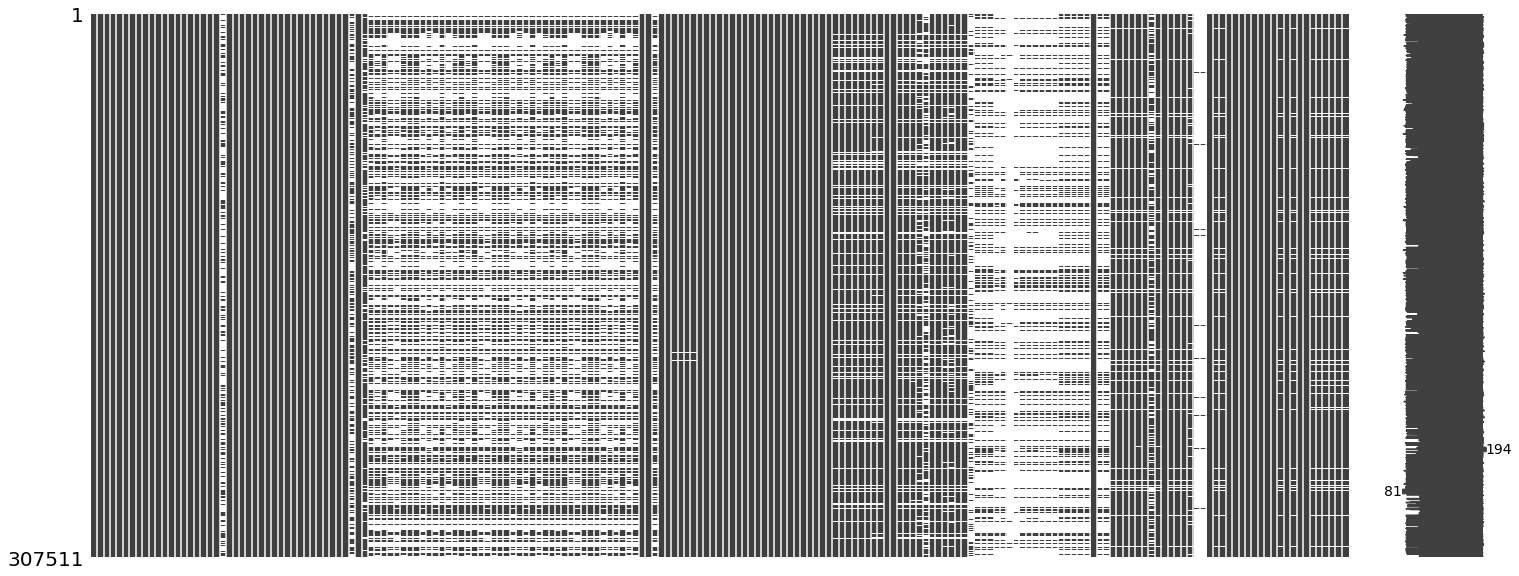

In [45]:
import missingno as msno
msno.matrix(df_X_preprocessed)

Now we need to handle Nan values, ie missing data. There are many strategies for handling Nan values because the reason behind nan values may differ. For this reason, I decided what should we do for nan values for each column or row separately.
* First, I decided to discard the rows that has nan values more than 100.(decided from histogram of #nan values in each row)
* For missing "own_car_age" values, I decided to fill them with 100. The reason of missing values is mainly due to not owning a car. Since, not owning car resembles owning a scrap, a very old car in case of its value.
* For Apartments and building information, columns [43:85], I replaced Nan values with the average value of each column.
* For EXT_SOURCE_1,2,3 columns, I decided to fill them with the mean of existing score values, ie if for a row EXT_SOURCE_2 AND EXT_SOURCE_3 is exist while EXT_SOURCE_1 IS NOT, I replace EXT_SOURCE_1 = (EXT_SOURCE_2 + EXT_SOURCE_3) / 2

0         24
1         25
2         67
3         78
4         69
          ..
307506    45
307507    45
307508    27
307509    54
307510    38
Length: 307511, dtype: int64
(22597,)


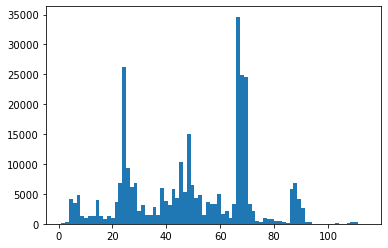

In [46]:
row_nan_count = df_X_preprocessed.isna().sum(axis=1)
print(row_nan_count)
plt.hist(row_nan_count,80)
temp = np.array(np.where(row_nan_count>80)).reshape(-1,)
print(temp.shape)

In [47]:
df_X_preprocessed[:40]

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0       100002                   0            1             0   
1       100003                   0            0             0   
2       100004                   1            1             1   
3       100006                   0            0             0   
4       100007                   0            1             0   
5       100008                   0            1             0   
6       100009                   0            0             1   
7       100010                   0            1             1   
8       100011                   0            0             0   
9       100012                   1            1             0   
10      100014                   0            0             0   
11      100015                   0            0             0   
12      100016                   0            0             0   
13      100017                   0            1             1   
14      100018                   0            0             0   
15      100019                   0            1             1   
16      100020                   0            1             0   
17      100021                   1            0             0   
18      100022                   1            0             0   
19      100023                   0            0             0   
20      100024                   1            1             1   
21      100025                   0            0             1   
22      100026                   0            0             0   
23      100027                   0            0             0   
24      100029                   0            1             1   
25      100030                   0            0             0   
26      100031                   0            0             0   
27      100032                   0            1             0   
28      100033                   0            1             1   
29      100034                   1            1             0   
30      100035                   0            0             0   
31      100036                   0            0             0   
32      100037                   0            0             0   
33      100039                   0            1             1   
34      100040                   0            0             0   
35      100041                   0            0             0   
36      100043                   0            0             0   
37      100044                   0            1             0   
38      100045                   0            0             0   
39      100046                   1            1             1   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 1             0        202500.000    406597.5      24700.5   
1                 0             0        270000.000   1293502.5      35698.5   
2                 1             0         67500.000    135000.0       6750.0   
3                 1             0        135000.000    312682.5      29686.5   
4                 1             0        121500.000    513000.0      21865.5   
5                 1             0         99000.000    490495.5      27517.5   
6                 1             1        171000.000   1560726.0      41301.0   
7                 1             0        360000.000   1530000.0      42075.0   
8                 1             0        112500.000   1019610.0      33826.5   
9                 1             0        135000.000    405000.0      20250.0   
10                1             1        112500.000    652500.0      21177.0   
11                1             0         38419.155    148365.0      10678.5   
12                1             0         67500.000     80865.0       5881.5   
13                0             1        225000.000    918468.0      28966.5   
14                1             0        189000.000    773680.5      32778.0   
15                1             0        157500.000    299

#### FIND ROWS THAT ARE MORE FULL FROM Y=1 ROWS

1         25
2         67
3         78
4         69
5         68
          ..
307505    26
307506    45
307507    45
307508    27
307510    38
Length: 282686, dtype: int64
[    39     47     61 ... 282655 282671 282674]
Int64Index([    43,     51,     65,     70,     71,     98,    111,    119,
               124,    129,
            ...
            274069, 274070, 274071, 274090, 274092, 274096, 274108, 274112,
            274118, 274130],
           dtype='int64', length=22455)


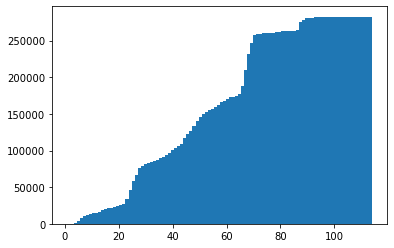

In [48]:
row_nan_count = df_X_preprocessed[df_preprocessed["TARGET"]==0].isna().sum(axis=1)
print(row_nan_count)
plt.hist(row_nan_count,100,cumulative=True)
temp_index = np.array(np.where(row_nan_count<22)).reshape(-1,)
print(temp_index)
take_negative_index = row_nan_count.index[temp_index[0:22455]]
print(take_negative_index)
take_negative_IDS   = df_X_preprocessed.loc[take_negative_index,"SK_ID_CURR"]

In [49]:
print(row_nan_count[39])
print(take_negative_index)

27
Int64Index([    43,     51,     65,     70,     71,     98,    111,    119,
               124,    129,
            ...
            274069, 274070, 274071, 274090, 274092, 274096, 274108, 274112,
            274118, 274130],
           dtype='int64', length=22455)


In [50]:
print(take_negative_index)

Int64Index([    43,     51,     65,     70,     71,     98,    111,    119,
               124,    129,
            ...
            274069, 274070, 274071, 274090, 274092, 274096, 274108, 274112,
            274118, 274130],
           dtype='int64', length=22455)


(array([  48., 1447., 5100., 3873., 1799., 1104., 2737., 2780., 1195.,
        2372.]),
 array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.]),
 <BarContainer object of 10 artists>)

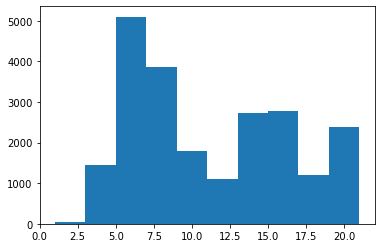

In [51]:
row_nan_count2 = df_X_preprocessed.iloc[take_negative_index].isna().sum(axis=1)
plt.hist(row_nan_count2)

#### DROP ROWS THAT HAVE NAN VALUES MORE THAN 100

In [52]:
nan_threshold = 80
### Delete Rows that has many missing values(more than 100)
row_nan_count = df_X_preprocessed.isna().sum(axis=1)
temp = np.array(np.where(row_nan_count>nan_threshold)).reshape(-1,)
df_X_preprocessed2 = copy.deepcopy(df_X_preprocessed).drop(temp)
df_y_preprocessed2 = copy.deepcopy(df_y_preprocessed).drop(temp)

In [53]:
#df_x_preprocessed2 = df_x_preprocessed2.reset_index(drop=True)

#### SET OWN_CAR_AGE NAN AS 100.

In [54]:
### Fill Nans in the OWN CAR AGE AS 100
df_X_preprocessed2["OWN_CAR_AGE"] = df_X_preprocessed2["OWN_CAR_AGE"].fillna(100)
df_X_preprocessed2[:5]

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100002                   0            1             0                1   
1      100003                   0            0             0                0   
2      100004                   1            1             1                1   
3      100006                   0            0             0                1   
4      100007                   0            1             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                6                 7                    4                   3   
1                1                 4                    1                   1   
2                6                 7                    4                   3   
3                6                 7                    4                   0   
4                6                 7                    4                   3   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  1                    0.018801       -9461           -637   
1                  1                    0.003541      -16765          -1188   
2                  1                    0.010032      -19046           -225   
3                  1                    0.008019      -19005          -3039   
4                  1                    0.028663      -19932          -3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0            -3648.0            -2120        100.0           1   
1            -1186.0             -291        100.0           1   
2            -4260.0            -2531         26.0           1   
3            -9833.0            -2437        100.0           1   
4            -4311.0            -3458        100.0           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                8              1.0                     2   
1                3              2.0                     1   
2                8              1.0                     2   
3                8              2.0                     2   
4                3              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                            2                           6   
1                            1                           1   
2                            2                           1   
3                            2                           6   
4                            2                           4   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                     

#### FILL APARTMENT INFORMATION COLUMNS WITH MEAN OF COLUMNS

In [55]:
print(df_X_preprocessed2.columns[43:85])
print(df_X_preprocessed2.columns[95:121])

Index(['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI'],
      dtype='object')
Index(['FLAG_DOCUM

In [56]:
## FILL APARTMENT INFORMATION COLUMNS WITH MEAN OF COLUMNS
apartment_columns = df_X_preprocessed2.columns[43:85]
for column in apartment_columns: 
    mean_ext = df_X_preprocessed2.loc[:, column].mean()
    df_X_preprocessed2[column] = df_X_preprocessed2[column].fillna(mean_ext)
df_X_preprocessed2

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0           100002                   0            1             0   
1           100003                   0            0             0   
2           100004                   1            1             1   
3           100006                   0            0             0   
4           100007                   0            1             0   
...            ...                 ...          ...           ...   
307506      456251                   0            1             0   
307507      456252                   0            0             0   
307508      456253                   0            0             0   
307509      456254                   0            0             0   
307510      456255                   0            0             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                     1             0          202500.0    406597.5   
1                     0             0          270000.0   1293502.5   
2                     1             0           67500.0    135000.0   
3                     1             0          135000.0    312682.5   
4                     1             0          121500.0    513000.0   
...                 ...           ...               ...         ...   
307506                0             0          157500.0    254700.0   
307507                1             0           72000.0    269550.0   
307508                1             0          153000.0    677664.0   
307509                1             0          171000.0    370107.0   
307510                0             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
0           24700.5         351000.0                6                 7   
1           35698.5        1129500.0                1                 4   
2            6750.0         135000.0                6                 7   
3           29686.5         297000.0                6                 7   
4           21865.5         513000.0                6                 7   
...             ...              ...              ...               ...   
307506      27558.0         225000.0                6                 7   
307507      12001.5         225000.0                6                 3   
307508      29979.0         585000.0                6                 7   
307509      20205.0         319500.0                6                 1   
307510      49117.5         675000.0                6                 1   

        NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0                         4                   3                  1   
1                         1                   1                  1   
2                         4                   3                  1   
3                         4                   0                  1   
4                         4                   3                  1   
...                     ...                 ...                ...   
307506                    4                   2                  5   
307507                    4                   5                  1   
307508                    1                   2                  1   
307509                    4                   1                  1   
307510                    1                   1                  1   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                         0.018801       -9461           -637   
1                         0.003541      -16765          -1188   
2                         0.010032      -19046           -225   
3                         0.008019      -19005          -3039   
4                         0.028663      -19932          -3038   
...                            ...         ...            ...   
307506                    0.032561       -9327           -236   
307507                    0.025164      -20775         365243   

In [57]:
### RESET INDEX
df_X_preprocessed3 = df_X_preprocessed2.reset_index(drop=True)
df_y_preprocessed3 = df_y_preprocessed2.reset_index(drop=True)

In [58]:
#df_X_preprocessed2 = df_X_preprocessed2.drop(columns = "index")
#df_y_preprocessed2 = df_y_preprocessed2.drop(columns = "index")

#### FILL EXT SOURCE COLUMNS AS THE MEAN OF OTHER EXTERNAL SOURCES FOR EACH ROW

In [59]:
def fill_ext_source(dfx,mx):
    return mx[dfx.index]
#df_x_preprocessed2[ext_columns[0]].apply(lambda x: fill_ext_source(x, mx = temp))

In [60]:
ext_columns = ["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]
tempx = df_X_preprocessed3.loc[:, ext_columns].mean(axis=1)
df_ext = copy.deepcopy(df_X_preprocessed3[ext_columns])
for i in range(df_ext.shape[0]):
    if i%10000==0:
        print(i)
    if math.isnan(tempx[i]):
        df_ext.loc[i] = 0.5# mean of external sources
    else:
        df_ext.loc[i] = df_ext.loc[i].fillna(tempx[i])

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000


In [61]:
df_X_preprocessed3[ext_columns] = df_ext

#### FOR FLAG COLUMNS, SET NAN AS 0.

In [62]:
df_X_preprocessed3[df_X_preprocessed3.columns[95:121]] = df_X_preprocessed3[df_X_preprocessed3.columns[95:121]].fillna(0)

In [63]:
column_nan_count3 = df_X_preprocessed3.isna().sum(axis=0)
print(column_nan_count3[:50])

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                255
NAME_TYPE_SUITE                  0
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
DAYS_ID_PUBLISH                  0
OWN_CAR_AGE                      0
FLAG_MOBIL                       0
FLAG_EMP_PHONE                   0
FLAG_WORK_PHONE                  0
FLAG_CONT_MOBILE                 0
FLAG_PHONE                       0
FLAG_EMAIL                       0
OCCUPATION_TYPE                  0
CNT_FAM_MEMBERS     

#### "MAKE AMT ANNUITY", "AMT GOODS PRICE" COLUMNS AS MEAN OF COLUMNS

In [64]:
# "MAKE AMT ANNUITY", "AMT GOODS PRICE" COLUMNS AS MEAN OF COLUMNS
for column in ["AMT_ANNUITY","AMT_GOODS_PRICE"]:
    mean_ext = df_X_preprocessed3.loc[:, column].mean()
    df_X_preprocessed3[column] = df_X_preprocessed3[column].fillna(mean_ext)

#### MAKE "COUNT FAM MEMBERS" NANS AS 1

In [65]:
#MAKE "COUNT FAM MEMBERS" 1
df_X_preprocessed3["CNT_FAM_MEMBERS"] = df_X_preprocessed3["CNT_FAM_MEMBERS"].fillna(1)

#### MAKE TOTALARE_MODE AND SOCIAL CIRCLE FEATURES AS MEAN OF EACH COLUMN

In [66]:
df_X_preprocessed3["TOTALAREA_MODE"] = df_X_preprocessed3["TOTALAREA_MODE"].fillna(df_X_preprocessed3["TOTALAREA_MODE"].mean())
df_X_preprocessed3["OBS_30_CNT_SOCIAL_CIRCLE"] = df_X_preprocessed3["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(df_X_preprocessed3["OBS_30_CNT_SOCIAL_CIRCLE"].mean())
df_X_preprocessed3["DEF_30_CNT_SOCIAL_CIRCLE"] = df_X_preprocessed3["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(df_X_preprocessed3["DEF_30_CNT_SOCIAL_CIRCLE"].mean())
df_X_preprocessed3["OBS_60_CNT_SOCIAL_CIRCLE"] = df_X_preprocessed3["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(df_X_preprocessed3["OBS_60_CNT_SOCIAL_CIRCLE"].mean())
df_X_preprocessed3["DEF_60_CNT_SOCIAL_CIRCLE"] = df_X_preprocessed3["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(df_X_preprocessed3["DEF_60_CNT_SOCIAL_CIRCLE"].mean())
df_X_preprocessed3["DAYS_LAST_PHONE_CHANGE"] = df_X_preprocessed3["DAYS_LAST_PHONE_CHANGE"].fillna(df_X_preprocessed3["DAYS_LAST_PHONE_CHANGE"].mean())

In [67]:
column_nan_count3 = df_X_preprocessed3.isna().sum(axis=0)
print(column_nan_count3[121:150])

BUREAU_CREDIT_ACTIVE               26732
BUREAU_CREDIT_CLOSED               26732
BUREAU_IT_CURRENCY                     0
BUREAU_IT_TYPE                         0
BUREAU_CREDIT                      26732
BUREAU_IT_DAY_OVERDUE              26732
BUREAU_CREDIT_ENDDATE              28926
BUREAU_ENDDATE_FACT                59005
BUREAU_CREDIT_MAX_OVERDUE         104191
BUREAU_CREDIT_PROLONG              26732
BUREAU_CREDIT_SUM                  26733
BUREAU_CREDIT_SUM_DEBT             33874
BUREAU_CREDIT_SUM_LIMIT            47210
BUREAU_CREDIT_SUM_OVERDUE          26732
BUREAU_CREDIT_UPDATE               26732
BUREAU_ANNUITY                    206135
CCB_MONTHS_BALANCE                198067
CCB_AMT_BALANCE                   198067
CCB_AMT_CREDIT_LIMIT_ACTUAL       198067
CCB_AMT_DRAWINGS_ATM_CURRENT      233656
CCB_AMT_DRAWINGS_CURRENT          225311
CCB_AMT_DRAWINGS_OTHER_CURRENT    279238
CCB_AMT_DRAWINGS_POS_CURRENT      250722
CCB_AMT_INST_MIN_REGULARITY       225672
CCB_AMT_PAYMENT_

In [68]:
df_X_preprocessed3[-10:]

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
284904      456245                   0            0             0   
284905      456246                   0            0             0   
284906      456247                   0            0             0   
284907      456248                   0            0             0   
284908      456249                   0            0             0   
284909      456251                   0            1             0   
284910      456252                   0            0             0   
284911      456253                   0            0             0   
284912      456254                   0            0             0   
284913      456255                   0            0             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
284904                1             3           81000.0    269550.0   
284905                1             1           94500.0    225000.0   
284906                1             0          112500.0    345510.0   
284907                1             0          153000.0    331920.0   
284908                1             0          112500.0    225000.0   
284909                0             0          157500.0    254700.0   
284910                1             0           72000.0    269550.0   
284911                1             0          153000.0    677664.0   
284912                1             0          171000.0    370107.0   
284913                0             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
284904      11871.0         225000.0                6                 1   
284905      10620.0         225000.0                6                 7   
284906      17770.5         247500.0                6                 1   
284907      16096.5         225000.0                6                 7   
284908      22050.0         225000.0                6                 3   
284909      27558.0         225000.0                6                 7   
284910      12001.5         225000.0                6                 3   
284911      29979.0         585000.0                6                 7   
284912      20205.0         319500.0                6                 1   
284913      49117.5         675000.0                6                 1   

        NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
284904                    4                   1                  1   
284905                    4                   1                  1   
284906                    1                   3                  1   
284907                    4                   2                  1   
284908                    4                   3                  1   
284909                    4                   2                  5   
284910                    4                   5                  1   
284911                    1                   2                  1   
284912                    4                   1                  1   
284913                    1                   1                  1   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
284904                    0.009175      -12961          -1046   
284905                    0.010966      -16063          -8736   
284906                    0.022800      -11870           -399   
284907                    0.022625      -16705          -7258   
284908                    0.022800      -24384         365243   
284909                    0.032561       -9327           -236   
284910                    0.025164      -20775         365243   
284911                    0.005002      -14966          -7921   
284912                    0.005313      -11961          -4786   
284913                    0.046220      -16856          -1262   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
284904            -1398.0            -3780        100.0           1   
284905     

#### MAKE BUREAU COLUMNS THAT DOES NOT EXIST, NAN AS ZERO

In [69]:
bureau_zero_columns = range(121,137)
df_X_preprocessed3[df_X_preprocessed3.columns[bureau_zero_columns]] = df_X_preprocessed3[df_X_preprocessed3.columns[bureau_zero_columns]].fillna(0)

#### MAKE CREDIT CARD BALANCE COLUMNS THAT DOES NOT EXIST, NAN AS ZERO

In [70]:
ccb_zero_columns = range(137,158)
df_X_preprocessed3[df_X_preprocessed3.columns[ccb_zero_columns]] = df_X_preprocessed3[df_X_preprocessed3.columns[ccb_zero_columns]].fillna(0)

In [71]:
column_nan_count3 = df_X_preprocessed3.isna().sum(axis=0)
print(column_nan_count3[159:195])

PREV_APP_NUM_CASH_LOANS                   9789
PREV_APP_NUM_REVOLVING_LOANS              9789
PREV_APP_AMT_ANNUITY                     10159
PREV_APP_AMT_APPLICATION                 10758
PREV_APP_AMT_CREDIT                       9971
PREV_APP_AMT_DOWN_PAYMENT                97910
PREV_APP_AMT_GOODS_PRICE                 10758
PREV_APP_WEEKDAY_APPR_PROCESS_START          0
PREV_APP_HOUR_APPR_PROCESS_START          9789
PREV_APP_FLAG_LAST_APPL_PER_CONTRACT      9789
PREV_APP_NFLAG_LAST_APPL_IN_DAY           9789
PREV_APP_RATE_DOWN_PAYMENT               26451
PREV_APP_RATE_INTEREST_PRIMARY          280499
PREV_APP_RATE_INTEREST_PRIVILEGED       280499
PREV_APP_NAME_CASH_LOAN_PURPOSE              0
PREV_APP_NAME_CONTRACT_STATUS             9789
PREV_APP_DAYS_DECISION                    9789
PREV_APP_NAME_PAYMENT_TYPE                   0
PREV_APP_CODE_REJECT_REASON                  0
PREV_APP_NAME_TYPE_SUITE                     0
PREV_APP_NAME_CLIENT_TYPE                    0
PREV_APP_NAME

#### WE DROP COLUMNS RATE_INTEREST_PRIMARY AND RATE_INTEREST_PRIVILIGED SINCE THEY HAVE TOO MANY NANS

In [72]:
df_X_preprocessed3 = df_X_preprocessed3.drop(columns=['PREV_APP_RATE_INTEREST_PRIMARY', 'PREV_APP_RATE_INTEREST_PRIVILEGED'])

In [73]:
column_nan_count3 = df_X_preprocessed3.isna().sum(axis=0)
print(column_nan_count3[159:193])

PREV_APP_NUM_CASH_LOANS                  9789
PREV_APP_NUM_REVOLVING_LOANS             9789
PREV_APP_AMT_ANNUITY                    10159
PREV_APP_AMT_APPLICATION                10758
PREV_APP_AMT_CREDIT                      9971
PREV_APP_AMT_DOWN_PAYMENT               97910
PREV_APP_AMT_GOODS_PRICE                10758
PREV_APP_WEEKDAY_APPR_PROCESS_START         0
PREV_APP_HOUR_APPR_PROCESS_START         9789
PREV_APP_FLAG_LAST_APPL_PER_CONTRACT     9789
PREV_APP_NFLAG_LAST_APPL_IN_DAY          9789
PREV_APP_RATE_DOWN_PAYMENT              26451
PREV_APP_NAME_CASH_LOAN_PURPOSE             0
PREV_APP_NAME_CONTRACT_STATUS            9789
PREV_APP_DAYS_DECISION                   9789
PREV_APP_NAME_PAYMENT_TYPE                  0
PREV_APP_CODE_REJECT_REASON                 0
PREV_APP_NAME_TYPE_SUITE                    0
PREV_APP_NAME_CLIENT_TYPE                   0
PREV_APP_NAME_GOODS_CATEGORY                0
PREV_APP_NAME_PORTFOLIO                     0
PREV_APP_NAME_PRODUCT_TYPE        

#### MAKE SOME(NOT EXIST AMOUNTS) PREVIOUS APP COLUMNS AS ZERO

In [74]:
##### "PREV_APP_NAME_CONTRACT_STATUS"

In [75]:
prev_app_zero_columns = list(range(158,166))+list(range(167,171))+list(range(185,193))
print(prev_app_zero_columns)

[158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169, 170, 185, 186, 187, 188, 189, 190, 191, 192]


In [76]:
df_X_preprocessed3[df_X_preprocessed3.columns[prev_app_zero_columns]] = df_X_preprocessed3[df_X_preprocessed3.columns[prev_app_zero_columns]].fillna(0)

In [77]:
column_nan_count3 = df_X_preprocessed3.isna().sum(axis=0)
print(column_nan_count3[159:193])

PREV_APP_NUM_CASH_LOANS                     0
PREV_APP_NUM_REVOLVING_LOANS                0
PREV_APP_AMT_ANNUITY                        0
PREV_APP_AMT_APPLICATION                    0
PREV_APP_AMT_CREDIT                         0
PREV_APP_AMT_DOWN_PAYMENT                   0
PREV_APP_AMT_GOODS_PRICE                    0
PREV_APP_WEEKDAY_APPR_PROCESS_START         0
PREV_APP_HOUR_APPR_PROCESS_START            0
PREV_APP_FLAG_LAST_APPL_PER_CONTRACT        0
PREV_APP_NFLAG_LAST_APPL_IN_DAY             0
PREV_APP_RATE_DOWN_PAYMENT                  0
PREV_APP_NAME_CASH_LOAN_PURPOSE             0
PREV_APP_NAME_CONTRACT_STATUS            9789
PREV_APP_DAYS_DECISION                   9789
PREV_APP_NAME_PAYMENT_TYPE                  0
PREV_APP_CODE_REJECT_REASON                 0
PREV_APP_NAME_TYPE_SUITE                    0
PREV_APP_NAME_CLIENT_TYPE                   0
PREV_APP_NAME_GOODS_CATEGORY                0
PREV_APP_NAME_PORTFOLIO                     0
PREV_APP_NAME_PRODUCT_TYPE        

#### FILL NANS IN PREV_APP_NAME_CONTRACT_STATUS WITH MEAN OF THE COLUMN

In [78]:
print((df_X_preprocessed3["PREV_APP_NAME_CONTRACT_STATUS"]==0.2).sum())
print(df_X_preprocessed3["PREV_APP_NAME_CONTRACT_STATUS"].value_counts())
print((df_X_preprocessed3["PREV_APP_DAYS_DECISION"]==0).sum())
print(df_X_preprocessed3["PREV_APP_DAYS_DECISION"].value_counts())

8473
0.000000    168619
0.333333     15375
0.500000     13951
0.250000     11748
0.200000      8473
             ...  
0.864407         1
0.191176         1
0.585366         1
0.806452         1
0.457143         1
Name: PREV_APP_NAME_CONTRACT_STATUS, Length: 360, dtype: int64
0
-308.000000     142
-350.000000     134
-327.000000     133
-301.000000     132
-355.000000     130
               ... 
-827.692308       1
-1274.642857      1
-183.444444       1
-1580.714286      1
-1004.833333      1
Name: PREV_APP_DAYS_DECISION, Length: 59249, dtype: int64


In [79]:
df_X_preprocessed3["PREV_APP_NAME_CONTRACT_STATUS"] = df_X_preprocessed3["PREV_APP_NAME_CONTRACT_STATUS"].fillna(df_X_preprocessed3["PREV_APP_NAME_CONTRACT_STATUS"].mean())
df_X_preprocessed3["PREV_APP_DAYS_DECISION"] = df_X_preprocessed3["PREV_APP_DAYS_DECISION"].fillna(df_X_preprocessed3["PREV_APP_DAYS_DECISION"].mean())

In [80]:
column_nan_count3 = df_X_preprocessed3.isna().sum(axis=0)
print(column_nan_count3[159:193])

PREV_APP_NUM_CASH_LOANS                     0
PREV_APP_NUM_REVOLVING_LOANS                0
PREV_APP_AMT_ANNUITY                        0
PREV_APP_AMT_APPLICATION                    0
PREV_APP_AMT_CREDIT                         0
PREV_APP_AMT_DOWN_PAYMENT                   0
PREV_APP_AMT_GOODS_PRICE                    0
PREV_APP_WEEKDAY_APPR_PROCESS_START         0
PREV_APP_HOUR_APPR_PROCESS_START            0
PREV_APP_FLAG_LAST_APPL_PER_CONTRACT        0
PREV_APP_NFLAG_LAST_APPL_IN_DAY             0
PREV_APP_RATE_DOWN_PAYMENT                  0
PREV_APP_NAME_CASH_LOAN_PURPOSE             0
PREV_APP_NAME_CONTRACT_STATUS               0
PREV_APP_DAYS_DECISION                      0
PREV_APP_NAME_PAYMENT_TYPE                  0
PREV_APP_CODE_REJECT_REASON                 0
PREV_APP_NAME_TYPE_SUITE                    0
PREV_APP_NAME_CLIENT_TYPE                   0
PREV_APP_NAME_GOODS_CATEGORY                0
PREV_APP_NAME_PORTFOLIO                     0
PREV_APP_NAME_PRODUCT_TYPE        

#### MAKE NANS OF PREV_APP_SELLERPLACE_ARE AS -1(MODE OF COLUMN)

In [81]:
print((df_X_preprocessed3["PREV_APP_SELLERPLACE_AREA"]==0).sum())
print(df_X_preprocessed3["PREV_APP_SELLERPLACE_AREA"].value_counts())

1197
-1.000000       12893
 50.000000       3122
 20.000000       2788
 30.000000       2726
 100.000000      2628
                ...  
 913.142857         1
 618.333333         1
 195.714286         1
 827.111111         1
 1859.600000        1
Name: PREV_APP_SELLERPLACE_AREA, Length: 38892, dtype: int64


In [82]:
df_X_preprocessed3["PREV_APP_SELLERPLACE_AREA"] = df_X_preprocessed3["PREV_APP_SELLERPLACE_AREA"].fillna(-1)

In [83]:
print((df_X_preprocessed3["PREV_APP_CNT_PAYMENT"]==0).sum())
print(df_X_preprocessed3["PREV_APP_CNT_PAYMENT"].value_counts())

2067
12.000000    32970
6.000000     21339
10.000000    17855
24.000000    10955
18.000000    10239
             ...  
38.133333        1
49.733333        1
4.909091         1
28.055556        1
5.700000         1
Name: PREV_APP_CNT_PAYMENT, Length: 2810, dtype: int64


In [84]:
df_X_preprocessed3["PREV_APP_CNT_PAYMENT"] = df_X_preprocessed3["PREV_APP_CNT_PAYMENT"].fillna(df_X_preprocessed3["PREV_APP_CNT_PAYMENT"].mean())

In [85]:
column_nan_count3 = df_X_preprocessed3.isna().sum(axis=0)
print(column_nan_count3[159:193])

0.0


In [86]:
#df_X_preprocessed3.to_csv('Xdata_preprocessed.csv', index=False)
#df_y_preprocessed3.to_csv('ydata.csv', index=False)  

### Normalization

In [87]:
# Import Required Modules.
from sklearn import preprocessing

In [88]:
# Feature Scaling for input features.
scaler   = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(df_X_preprocessed3.to_numpy())
df_X_scaled = pd.DataFrame(X_scaled, columns=df_X_preprocessed3.columns)

In [89]:
df_X_scaled = df_X_scaled.drop(columns = "SK_ID_CURR")

In [90]:
df_y = copy.deepcopy(df_y_preprocessed3)

# 2. VALIDATION STRATEGY

In [91]:
print(df_y_preprocessed3.value_counts())

0    262459
1     22455
Name: TARGET, dtype: int64


### Since there are 262K zeros and 22K ones. #Positive/#negative class ratio is about 0.1. Hence, we should appropriately adjust and not miss this ratio while K-fold validation. Therefore, we should use Stratified Kfold

In [92]:
from sklearn.model_selection import StratifiedKFold

In [93]:
num_splits = 5
# Create StratifiedKFold object.
skf5 = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=1)
skf4 = StratifiedKFold(n_splits=4, shuffle=True, random_state=1)
skf3 = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
skf2 = StratifiedKFold(n_splits=2, shuffle=True, random_state=1)

# 3. TRAINING THE MODELS

### Function Definitions

In [94]:
def accuracy_score(ytrue,ypred):
    ypred = ypred.reshape(ytrue.shape)
    num_true = (ytrue == ypred).sum()
    accuracy_rate  = num_true/ytrue.shape[0]
    
    detection_sum = 0
    true_negative  = 0
    
    for i in range(len(ytrue)): 
        if ytrue[i]==ypred[i]==1:
           detection_sum += 1
        if ytrue[i]==ypred[i]==0:
           true_negative += 1
        
    detection_rate       = detection_sum / ((ytrue==1).sum())
    true_negative_ratio  = true_negative / ((ytrue==0).sum())
    precision            = detection_sum / ((ypred==1).sum())
    
    ### COMPARISON OF Performance Metrics of Model, Train/Test Results
    fig = plt.figure(figsize = (8, 4))

    metric_names = ['Accuracy','Detection Ratio','True Negative Ratio','Precision'] 
    metrics      = [accuracy_rate,detection_rate,true_negative_ratio,precision]

    plt.bar(metric_names, metrics) 
    plt.grid(linestyle = "-.")
    plt.xlabel("Metrics") 
    plt.ylabel("Performance") 
    #plt.title("Cat Boost Validation on All Imbalanced Data, Trained In Balanced Dataset") 
    plt.show() 

    return(accuracy_rate,detection_rate,true_negative_ratio,precision)

In [95]:
def accuracy_score_without_plot(y_real,y_pred):
    y_pred = y_pred.reshape(y_real.shape)
    num_true = (y_real == y_pred).sum()
    accuracy_rate  = num_true/y_real.shape[0]
    
    detection_sum  = 0
    true_negative  = 0
    false_negative = 0
    false_positive = 0
    
    for i in range(y_real.shape[0]): 
        if y_real[i]==y_pred[i]==1:
           detection_sum += 1
        if y_real[i]==y_pred[i]==0:
           true_negative += 1
        if (y_real[i]==1)&(y_pred[i]==0):
           false_negative += 1
        if (y_real[i]==0)&(y_pred[i]==1):
           false_positive += 1
        
    detection_rate      = detection_sum / (detection_sum + false_negative)
    true_negative_rate  = true_negative / (true_negative + false_positive)
    precision           = detection_sum / (detection_sum + false_positive)
    F1_score            = 2 * ((precision * detection_rate) / (precision + detection_rate))
    false_positive_rate = false_positive / (false_positive + true_negative)
    #print("false pos:",false_positive)
    #print("true pos:",detection_sum)
    #print("true negative:",true_negative)
    #print("false negative:",false_negative)
    return(accuracy_rate,detection_rate,true_negative_rate,false_positive_rate,precision,F1_score)

In [96]:
def calculate_sample_weights(y,coef):
    sample_weights = coef * y * (y.shape[0]/((y==1).sum()))
    sample_weights[sample_weights==0] = 1
    return sample_weights

In [97]:
def plot(metrics,label):
    ### COMPARISON OF Performance Metrics of Model, Train/Test Results
    fig = plt.figure(figsize = (12, 4))

    metric_names = ['Accuracy','Detection Rate','True Negative','False Positive Rate','Precision','F1 Score'] 

    plt.bar(metric_names, metrics) 
    plt.grid(linestyle = "-.")
    plt.xlabel("Metrics") 
    plt.ylabel("Performance") 
    plt.title(label)
    plt.show() 

## 3.1 RIDGE CLASSIFIER

In [98]:
# Import Required Modules.
from statistics import mean, stdev
from sklearn import linear_model
from sklearn import datasets
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Ridge

In [99]:
X_scaled = df_X_scaled.to_numpy()
y = df_y.to_numpy()

In [100]:
# -1,1 transformation of y
y_minus = 2*y-1

In [101]:
print(X_scaled.shape)
print(y)

(284914, 192)
[1 0 0 ... 0 1 0]


### 3.1.1 RIDGE CLASSIFIER IMBALANCED DATA WITHOUT SAMPLE WEIGHTS

In [102]:
# Set Parameters
alpha = 1e-6

Fold: 0
Number of train correct: 209967


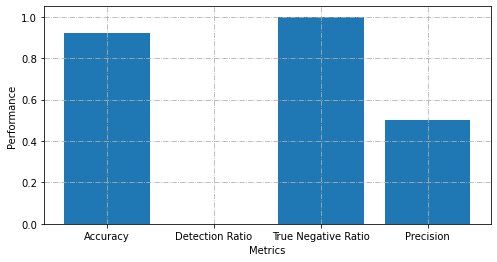

Number test correct: 52492


C:\Users\erkay\AppData\Local\Temp\ipykernel_18640\1844349814.py:17: RuntimeWarning: invalid value encountered in long_scalars
  precision            = detection_sum / ((ypred==1).sum())


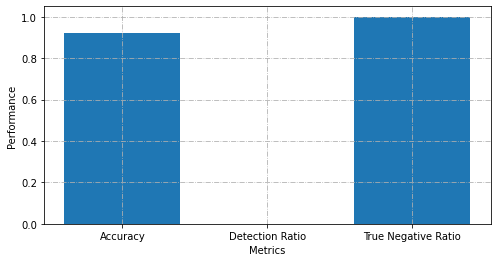

Fold: 1
Number of train correct: 209967


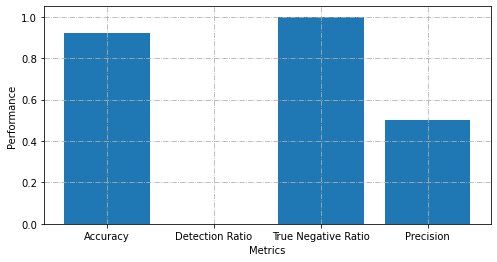

Number test correct: 52492


C:\Users\erkay\AppData\Local\Temp\ipykernel_18640\1844349814.py:17: RuntimeWarning: invalid value encountered in long_scalars
  precision            = detection_sum / ((ypred==1).sum())


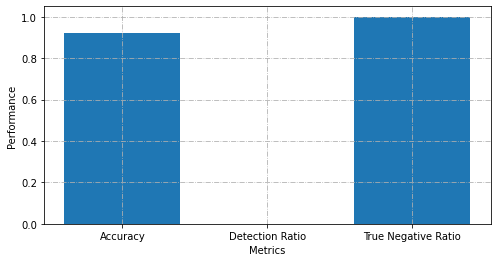

Fold: 2
Number of train correct: 209968


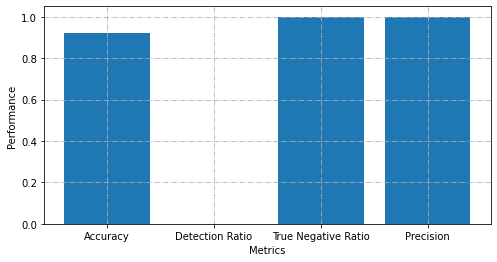

Number test correct: 52490


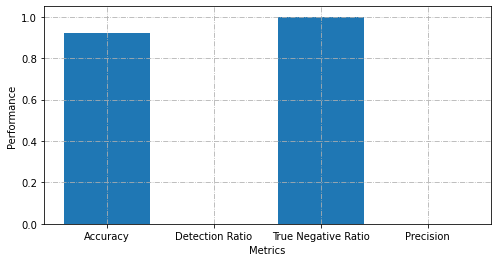

Fold: 3
Number of train correct: 209967


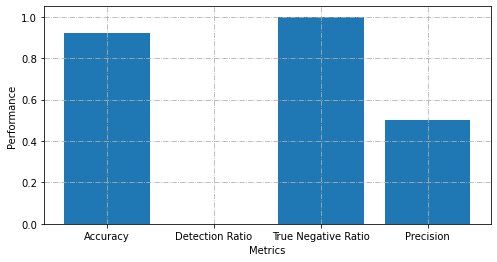

Number test correct: 52492


C:\Users\erkay\AppData\Local\Temp\ipykernel_18640\1844349814.py:17: RuntimeWarning: invalid value encountered in long_scalars
  precision            = detection_sum / ((ypred==1).sum())


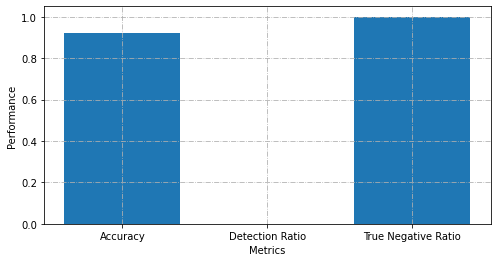

Fold: 4
Number of train correct: 209967


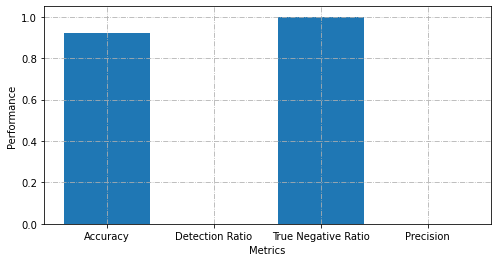

Number test correct: 52490


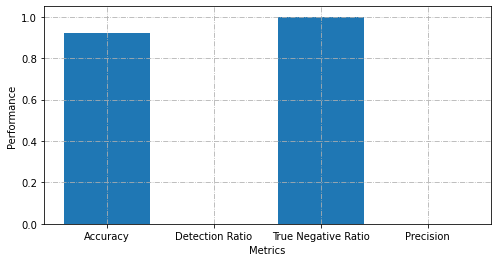

In [103]:
# Create  classifier object.
#sk_ridge_classifier = linear_model.RidgeClassifier(alpha=alpha)
sk_ridge = linear_model.Ridge(alpha=alpha)

train_accuracy_ridge  = []
test_accuracy_ridge   = []
train_detection_ridge = []
test_detection_ridge  = []
train_precision_ridge = []
test_precision_ridge  = []
train_true_negative_ridge = []
test_true_negative_ridge  = []

temp_index = 0
for train_index, test_index in skf5.split(X_scaled, y):
    print("Fold:", temp_index)
    x_train_fold, x_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    y_train_fold_coded, y_test_fold_coded = y_minus[train_index], y_minus[test_index]
    
    #sk_ridge_classifier.fit(x_train_fold, y_train_fold)
    #train_accuracy_stratified_ridge_class.append(sk_ridge_classifier.score(x_train_fold, y_train_fold))
    #test_accuracy_stratified_ridge_class.append(sk_ridge_classifier.score(x_test_fold, y_test_fold))

    sk_ridge.fit(x_train_fold, y_train_fold_coded)
    y_train_predict   = sk_ridge.predict(x_train_fold)>0
    num_correct_train = (y_train_predict == y_train_fold).sum()
    accuracy_train    = num_correct_train/y_train_fold.shape[0]
    print("Number of train correct:",num_correct_train)
    train_accuracy,train_detection,train_true_negative,train_precision = accuracy_score(y_train_fold,y_train_predict)
    
    y_test_predict    = sk_ridge.predict(x_test_fold)>0
    num_correct_test  = (y_test_predict == y_test_fold).sum()
    accuracy_test     = num_correct_test/y_test_fold.shape[0]
    print("Number test correct:",num_correct_test)
    test_accuracy,test_detection,test_true_negative,test_precision = accuracy_score(y_test_fold,y_test_predict)

    train_accuracy_ridge.append(train_accuracy)
    test_accuracy_ridge.append(test_accuracy)
    train_detection_ridge.append(train_detection)
    test_detection_ridge.append(test_detection)
    train_precision_ridge.append(train_precision)
    test_precision_ridge.append(test_precision)
    train_true_negative_ridge.append(train_true_negative)
    test_true_negative_ridge.append(test_true_negative)
    
    temp_index = temp_index + 1

In [104]:
print(train_accuracy_ridge)
print(test_accuracy_ridge)
print(train_detection_ridge)
print(test_detection_ridge)
print(train_true_negative_ridge)
print(test_true_negative_ridge)
print(train_precision_ridge)
print(test_precision_ridge)

[0.9211866749147768, 0.9211866749147768, 0.9211910622074224, 0.9211866749147768, 0.921182633416984]
[0.9211870206903814, 0.9211870206903814, 0.9211519225032027, 0.9211870206903814, 0.9211680881681935]
[5.5666889334224006e-05, 5.5666889334224006e-05, 5.5666889334224006e-05, 5.5666889334224006e-05, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]
[0.9999952373468212, 0.9999952373468212, 1.0, 0.9999952373468212, 0.9999952373695039]
[1.0, 1.0, 0.9999618989560314, 1.0, 0.9999809491150864]
[0.5, 0.5, 1.0, 0.5, 0.0]
[nan, nan, 0.0, nan, 0.0]


#### For this imbalanced dataset, detection accuracy is zero,ie true positive ratio ~= 0. This means that linear model ridge regressor/classifier is not learning. This may due to huge imbalance in the dataset. Training imbalanced data results no detection ratio. For this reason, I will try this model on a balanced dataset

### 3.1.2 RIDGE CLASSIFIER TRAINED ON BALANCED DATA

In [105]:
original_IDS = df_X_preprocessed3["SK_ID_CURR"]
X_balanced = scaler.fit_transform(df_X_preprocessed3.to_numpy())
df_X_balanced = pd.DataFrame(X_balanced, columns=df_X_preprocessed3.columns)
df_X_balanced["SK_ID_CURR"] = original_IDS

In [106]:
df_X_balanced

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0           100002                 0.0          0.5           0.0   
1           100003                 0.0          0.0           0.0   
2           100004                 1.0          0.5           1.0   
3           100006                 0.0          0.0           0.0   
4           100007                 0.0          0.5           0.0   
...            ...                 ...          ...           ...   
284909      456251                 0.0          0.5           0.0   
284910      456252                 0.0          0.0           0.0   
284911      456253                 0.0          0.0           0.0   
284912      456254                 0.0          0.0           0.0   
284913      456255                 0.0          0.0           0.0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                   1.0           0.0          0.001512    0.090287   
1                   0.0           0.0          0.002089    0.311736   
2                   1.0           0.0          0.000358    0.022472   
3                   1.0           0.0          0.000935    0.066837   
4                   1.0           0.0          0.000819    0.116854   
...                 ...           ...               ...         ...   
284909              0.0           0.0          0.001127    0.052360   
284910              1.0           0.0          0.000396    0.056067   
284911              1.0           0.0          0.001089    0.157969   
284912              1.0           0.0          0.001243    0.081175   
284913              0.0           0.0          0.001127    0.157303   

        AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
0          0.090032         0.077441         1.000000          1.000000   
1          0.132924         0.271605         0.285714          0.571429   
2          0.020025         0.023569         1.000000          1.000000   
3          0.109477         0.063973         1.000000          1.000000   
4          0.078975         0.117845         1.000000          1.000000   
...             ...              ...              ...               ...   
284909     0.101176         0.046016         1.000000          1.000000   
284910     0.040505         0.046016         1.000000          0.428571   
284911     0.110618         0.135802         1.000000          1.000000   
284912     0.072499         0.069585         1.000000          0.142857   
284913     0.185258         0.158249         1.000000          0.142857   

        NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0                      1.00                 0.6                0.2   
1                      0.25                 0.2                0.2   
2                      1.00                 0.6                0.2   
3                      1.00                 0.0                0.2   
4                      1.00                 0.6                0.2   
...                     ...                 ...                ...   
284909                 1.00                 0.4                1.0   
284910                 1.00                 1.0                0.2   
284911                 0.25                 0.4                0.2   
284912                 1.00                 0.2                0.2   
284913                 0.25                 0.2                0.2   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                         0.256321    0.888839       0.045086   
1                         0.045016    0.477114       0.043648   
2                         0.134897    0.348534       0.046161   
3                         0.107023    0.350846       0.038817   
4                         0.392880    0.298591       0.038820   
...                            ...         ...            ...   
284909                    0.446855    0.896392       0.046133   
284910                    0.344429    0.251071       1.000000   

In [107]:
print(df_X_balanced.shape)
print(df_y.shape)

(284914, 193)
(284914,)


In [108]:
df_y = pd.DataFrame(df_y)
df_y

TARGET
0            1
1            0
2            0
3            0
4            0
...        ...
284909       0
284910       0
284911       0
284912       1
284913       0

[284914 rows x 1 columns]

In [109]:
df_y_balanced = copy.deepcopy(df_y)
#df.index[df['BoolCol'] == True].tolist()

temp_index = df_X_balanced.index[(df_X_balanced["SK_ID_CURR"].isin(take_negative_IDS)==False)&(df_y["TARGET"]==0)].tolist()
df_y_balanced = df_y_balanced.drop(index=temp_index)
df_X_balanced = df_X_balanced.drop(index=temp_index)

In [110]:
print(df_y_balanced.shape)

(44910, 1)


In [111]:
print(df_X_balanced.shape)
print(df_y_balanced.shape)
df_y_balanced.value_counts()

(44910, 193)
(44910, 1)


TARGET
0         22455
1         22455
dtype: int64

In [112]:
df_X_balanced = df_X_balanced.drop(columns="SK_ID_CURR")
df_X_balanced

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                      0.0          0.5           0.0              1.0   
25                     0.0          0.0           0.0              1.0   
39                     0.0          0.5           0.0              1.0   
41                     0.0          0.0           0.0              0.0   
42                     0.0          0.0           0.0              1.0   
...                    ...          ...           ...              ...   
284854                 0.0          0.5           0.0              0.0   
284880                 0.0          0.0           0.0              0.0   
284886                 0.0          0.5           0.0              1.0   
284892                 0.0          0.0           0.0              1.0   
284912                 0.0          0.0           0.0              1.0   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0           0.000000          0.001512    0.090287     0.090032   
25          0.000000          0.000742    0.233456     0.099298   
39          0.000000          0.001512    0.286787     0.130309   
41          0.000000          0.000935    0.060892     0.057108   
42          0.000000          0.000704    0.175101     0.161285   
...              ...               ...         ...          ...   
284854      0.052632          0.001550    0.101124     0.121411   
284880      0.052632          0.001012    0.314157     0.176255   
284886      0.000000          0.001704    0.062921     0.071604   
284892      0.000000          0.001704    0.118921     0.083749   
284912      0.000000          0.001243    0.081175     0.072499   

        AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
0              0.077441         1.000000          1.000000   
25             0.164983         1.000000          1.000000   
39             0.203143         1.000000          0.142857   
41             0.049383         1.000000          1.000000   
42             0.158249         1.000000          0.428571   
...                 ...              ...               ...   
284854         0.102132         1.000000          1.000000   
284880         0.270483         1.000000          1.000000   
284886         0.063973         0.285714          1.000000   
284892         0.102132         1.000000          0.142857   
284912         0.069585         1.000000          0.142857   

        NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0                      1.00                 0.6                0.2   
25                     1.00                 1.0                0.2   
39                     1.00                 0.2                0.2   
41                     1.00                 0.0                0.2   
42                     0.25                 0.6                0.2   
...                     ...                 ...                ...   
284854                 1.00                 0.2                0.2   
284880                 0.25                 0.0                0.2   
284886                 1.00                 0.2                0.2   
284892                 1.00                 0.0                0.2   
284912                 1.00                 0.2                0.2   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                         0.256321    0.888839       0.045086   
25                        0.245631    0.366685       0.039890   
39                        0.344429    0.436697       0.043455   
41                        0.097136    0.667700       0.037361   
42                        0.147830    0.094758       1.000000   
...                            ...         ...            ...   
284854                    0.276330    0.863078       0.038794   
284880                    0.097483    0.665896       0.040472   
284886                    0.114722    0.258455       0.038535   
284892                    0.196267    0.493687       0.046002   
284912       

In [113]:
X_balanced = df_X_balanced.to_numpy()
y_balanced = df_y_balanced.to_numpy()
y_balanced_minus = 2*y_balanced-1

In [114]:
# Create  classifier object.
#sk_ridge_classifier = linear_model.RidgeClassifier(alpha=alpha)
alpha = 1e-1
sk_ridge = linear_model.Ridge(alpha=alpha)

train_accuracy_ridge_balanced   = []
test_accuracy_ridge_balanced    = []
train_detection_ridge_balanced  = []
test_detection_ridge_balanced   = []
train_true_negative_ridge_balanced = []
test_true_negative_ridge_balanced  = []
train_precision_ridge_balanced  = []
test_precision_ridge_balanced   = []
train_F1_ridge_balanced  = []
test_F1_ridge_balanced   = []
train_false_positive_ridge_balanced  = []
test_false_positive_ridge_balanced   = []

temp_index = 1
for train_index, test_index in skf5.split(X_balanced, y_balanced):
    print("Fold:", temp_index)
    x_train_fold_balanced, x_test_fold_balanced = X_balanced[train_index], X_balanced[test_index]
    y_train_fold_balanced, y_test_fold_balanced = y_balanced[train_index], y_balanced[test_index]
    y_train_fold_balanced_coded, y_test_fold_balanced_coded = y_balanced_minus[train_index], y_balanced_minus[test_index]
    
    #Train
    sk_ridge.fit(x_train_fold_balanced, y_train_fold_balanced_coded)
    
    #Predictions
    y_train_predict_balanced = (sk_ridge.predict(x_train_fold_balanced)>0)
    train_accuracy_balanced,train_detection_balanced,train_true_negative_balanced,train_false_positive_balanced,train_precision_balanced,train_F1_balanced = accuracy_score_without_plot(y_train_fold_balanced,y_train_predict_balanced)

    y_test_predict_balanced  = (sk_ridge.predict(x_test_fold_balanced)>0)
    test_accuracy_balanced,test_detection_balanced,test_true_negative_balanced,test_false_positive_balanced,test_precision_balanced,test_F1_balanced= accuracy_score_without_plot(y_test_fold_balanced,y_test_predict_balanced)

    train_accuracy_ridge_balanced.append(train_accuracy_balanced)
    test_accuracy_ridge_balanced.append(test_accuracy_balanced)
    train_detection_ridge_balanced.append(train_detection_balanced)
    test_detection_ridge_balanced.append(test_detection_balanced)
    train_precision_ridge_balanced.append(train_precision_balanced)
    test_precision_ridge_balanced.append(test_precision_balanced)
    train_true_negative_ridge_balanced.append(train_true_negative_balanced)
    test_true_negative_ridge_balanced.append(test_true_negative_balanced)
    train_F1_ridge_balanced.append(train_F1_balanced)
    test_F1_ridge_balanced.append(test_F1_balanced)
    train_false_positive_ridge_balanced.append(train_false_positive_balanced)
    test_false_positive_ridge_balanced.append(test_false_positive_balanced)
    
    temp_index = temp_index + 1
    
mean_test_accuracy_ridge_balanced = np.mean(test_accuracy_ridge_balanced)
mean_test_detection_ridge_balanced = np.mean(test_detection_ridge_balanced)
mean_test_precision_ridge_balanced = np.mean(test_precision_ridge_balanced)
mean_test_true_negative_ridge_balanced = np.mean(test_true_negative_ridge_balanced)
mean_test_F1_ridge_balanced = np.mean(test_F1_ridge_balanced)
mean_test_false_positive_ridge_balanced = np.mean(test_false_positive_ridge_balanced)

ridge_balanced_metrics = [mean_test_accuracy_ridge_balanced,mean_test_detection_ridge_balanced,mean_test_true_negative_ridge_balanced,mean_test_false_positive_ridge_balanced,mean_test_precision_ridge_balanced,mean_test_F1_ridge_balanced]

Fold: 1
Fold: 2
Fold: 3
Fold: 4
Fold: 5


In [115]:
print(y_test_fold_balanced.shape)
print(y_test_predict_balanced.shape)

(8982, 1)
(8982, 1)


In [116]:
print(train_accuracy_ridge_balanced)
print(test_accuracy_ridge_balanced)

[0.9251558672901359, 0.9259630371854821, 0.9253785348474727, 0.9277443776441773, 0.9265197060788243]
[0.9288577154308617, 0.9270763749721666, 0.9280783789801826, 0.920730349588065, 0.9228456913827655]


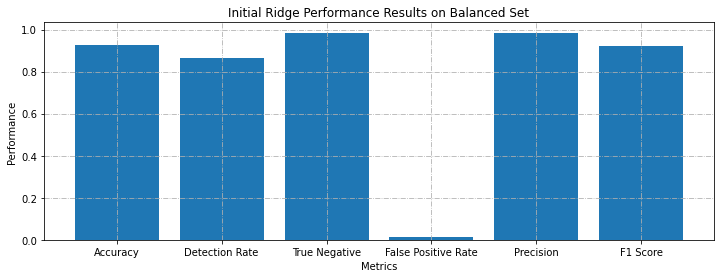

In [117]:
plot(ridge_balanced_metrics,"Initial Ridge Performance Results on Balanced Set")

#### CHECK PERFORMANCE ON UNSEEN DATA, IE ALL DATA

In [118]:
original_IDS = df_X_preprocessed3["SK_ID_CURR"]
X_val = scaler.fit_transform(df_X_preprocessed3.to_numpy())
df_X_val = pd.DataFrame(X_val, columns=df_X_preprocessed3.columns)
df_X_val = df_X_val.drop(columns = "SK_ID_CURR")

In [119]:
df_y_val = copy.deepcopy(df_y_preprocessed3)

In [120]:
X_val = df_X_val.to_numpy()
y_val = df_y_val.to_numpy()
y_val_minus = 2*y_val-1

In [121]:
y_val_predict = (sk_ridge.predict(X_val)>0)
ridge_all_data_balanced_metrics = accuracy_score_without_plot(y_val,y_val_predict)

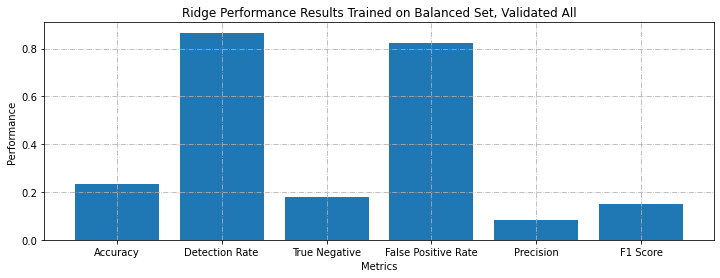

In [122]:
plot(ridge_all_data_balanced_metrics,"Ridge Performance Results Trained on Balanced Set, Validated All")

### Model trained on balanced dataset does not predict well and generalize to all data which creates huge FPR(False Positive Rate). Hence, it is not a good model.

### 3.1.3 RIDGE CLASSIFIER WITH SAMPLE WEIGHTS

In [123]:
# Set Parameters
alpha = 1e-4
coef  = 0.9

In [124]:
# Create  classifier object.
#sk_ridge_classifier = linear_model.RidgeClassifier(alpha=alpha)
sk_ridge = linear_model.Ridge(alpha=alpha)

train_accuracy_ridge  = []
test_accuracy_ridge   = []
train_detection_ridge = []
test_detection_ridge  = []
train_precision_ridge = []
test_precision_ridge  = []
train_true_negative_ridge = []
test_true_negative_ridge  = []
train_F1_ridge = []
test_F1_ridge  = []
train_false_positive_ridge = []
test_false_positive_ridge  = []

temp_index = 0
for train_index, test_index in skf5.split(X_scaled, y):
    print("Fold:", temp_index)
    x_train_fold, x_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    y_train_fold_coded, y_test_fold_coded = y_minus[train_index], y_minus[test_index]

    #Train
    sk_ridge.fit(x_train_fold, y_train_fold_coded,sample_weight=calculate_sample_weights(y_train_fold,coef))
    
    #Predictions
    y_train_predict = sk_ridge.predict(x_train_fold)>0
    train_accuracy,train_detection,train_true_negative,train_false_positive,train_precision,train_F1 = accuracy_score_without_plot(y_train_fold,y_train_predict)
    
    y_test_predict  = sk_ridge.predict(x_test_fold)>0
    test_accuracy,test_detection,test_true_negative,test_false_positive,test_precision,test_F1 = accuracy_score_without_plot(y_test_fold,y_test_predict)

    train_accuracy_ridge.append(train_accuracy)
    test_accuracy_ridge.append(test_accuracy)
    train_detection_ridge.append(train_detection)
    test_detection_ridge.append(test_detection)
    train_precision_ridge.append(train_precision)
    test_precision_ridge.append(test_precision)
    train_true_negative_ridge.append(train_true_negative)
    test_true_negative_ridge.append(test_true_negative)
    train_F1_ridge.append(train_F1)
    test_F1_ridge.append(test_F1)
    train_false_positive_ridge.append(train_false_positive)
    test_false_positive_ridge.append(test_false_positive)
    
    temp_index = temp_index + 1
    
mean_test_accuracy_ridge = np.mean(test_accuracy_ridge)
mean_test_detection_ridge = np.mean(test_detection_ridge)
mean_test_precision_ridge = np.mean(test_precision_ridge)
mean_test_true_negative_ridge = np.mean(test_true_negative_ridge)
mean_test_F1_ridge = np.mean(test_F1_ridge)
mean_test_false_positive_ridge = np.mean(test_false_positive_ridge)

ridge_metrics = [mean_test_accuracy_ridge,mean_test_detection_ridge,mean_test_true_negative_ridge,mean_test_false_positive_ridge,mean_test_precision_ridge,mean_test_F1_ridge]

Fold: 0
Fold: 1
Fold: 2
Fold: 3
Fold: 4


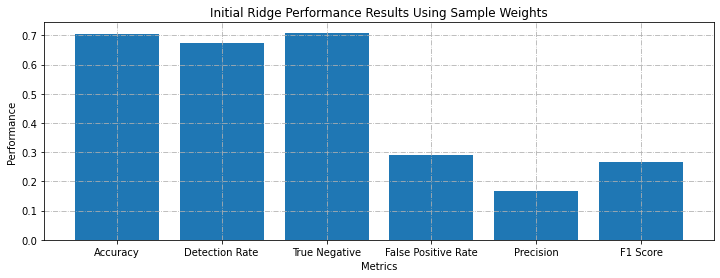

In [125]:
plot(ridge_metrics,"Initial Ridge Performance Results Using Sample Weights")

### Now we have a model which has high detection rate(0.7) and relatively low false positive rate(0.3). This model generalizes better than others.

## CAT BOOST CLASSIFIER

In [126]:
#Model Parameters
max_depth = 10
learning_rate = 1e-2
max_iter = 100
cat_features = 11
verbose = 10
l2_leaf_reg = 1e-4
loss_function = 'Logloss'

In [127]:
#Catboost Uygulaması
from catboost import CatBoostClassifier
from time import time

In [128]:
# First Train of a CAT Model
max_iter  = 200
verbose   = 50
cat_model = CatBoostClassifier(iterations=max_iter, learning_rate=learning_rate, depth=max_depth, loss_function=loss_function, verbose=verbose)
cat_model.fit(x_train_fold_balanced, y_train_fold_balanced)
cat_acc = accuracy_score_without_plot(y_test_fold_balanced, cat_model.predict(x_test_fold_balanced))

0:	learn: 0.6754542	total: 427ms	remaining: 1m 25s
50:	learn: 0.2941851	total: 15.9s	remaining: 46.3s
100:	learn: 0.2150604	total: 39.3s	remaining: 38.5s
150:	learn: 0.1877321	total: 1m 3s	remaining: 20.5s
199:	learn: 0.1732706	total: 1m 28s	remaining: 0us


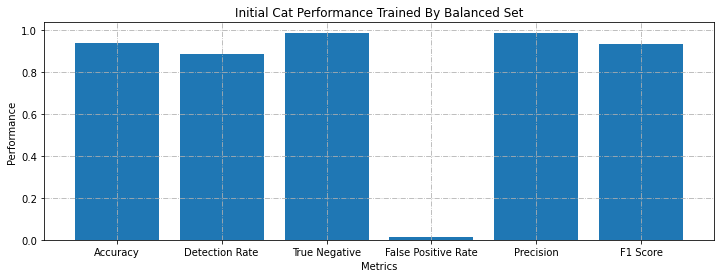

In [129]:
plot(cat_acc,"Initial Cat Performance Trained By Balanced Set")

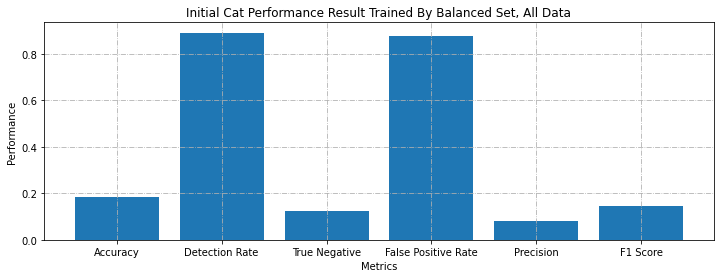

In [130]:
cat_acc_val = accuracy_score_without_plot(y_val, cat_model.predict(X_val))
plot(cat_acc_val,"Initial Cat Performance Result Trained By Balanced Set, All Data")

#### Traininig CAT Boost Algorithm on a balanced dataset results high performance metrics in test data, which is balanced. To validate in imbalanced dataset, performances are validated using all data which is imbalanced. It is observed that performances is not generalized. The algorithm tends to predict as 1. On the contrary to imbalanced training, detection ratio is high but precision, accuracy and true negative ratio is very low(false positive ratio is very high) similar to the case ridge model trained on balanced dataset.

### CAT CLASSIFIER STRATIFIED KFOLD TRAINED IN IMBALANCED SET ADDED SAMPLE WEIGHTS

In [131]:
#Model Settings
max_depth = 9
learning_rate = 3e-2
max_iter = 200
cat_features = 11
verbose = 20
l2_leaf_reg = 1e-4
sample_coef = 1
loss_function = 'Logloss'

In [132]:
# CREATE CAT CLASSIFIER
#
max_iter  = 250
verbose   = 20

cat_model = CatBoostClassifier(iterations=max_iter, learning_rate=learning_rate, depth=max_depth, loss_function=loss_function, verbose=verbose)

train_accuracy_cat  = []
test_accuracy_cat   = []
train_detection_cat = []
test_detection_cat  = []
train_precision_cat = []
test_precision_cat  = []
train_true_negative_cat = []
test_true_negative_cat  = []
train_F1_cat = []
test_F1_cat  = []
train_false_positive_cat = []
test_false_positive_cat  = []

temp_index = 1
for train_index, test_index in skf5.split(X_scaled, y):
    print("Fold:", temp_index)
    x_train_fold, x_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    #Train Model
    cat_model.fit(x_train_fold, y_train_fold,sample_weight=calculate_sample_weights(y_train_fold,sample_coef))
    
    #Predictions
    y_train_predict = cat_model.predict(x_train_fold)
    train_accuracy,train_detection,train_true_negative,train_false_positive,train_precision,train_F1 = accuracy_score_without_plot(y_train_fold,y_train_predict)
    
    y_test_predict  = cat_model.predict(x_test_fold)
    test_accuracy,test_detection,test_true_negative,test_false_positive,test_precision,test_F1 = accuracy_score_without_plot(y_test_fold,y_test_predict)

    train_accuracy_cat.append(train_accuracy)
    test_accuracy_cat.append(test_accuracy)
    train_detection_cat.append(train_detection)
    test_detection_cat.append(test_detection)
    train_precision_cat.append(train_precision)
    test_precision_cat.append(test_precision)
    train_true_negative_cat.append(train_true_negative)
    test_true_negative_cat.append(test_true_negative)
    train_F1_cat.append(train_F1)
    test_F1_cat.append(test_F1)
    train_false_positive_cat.append(train_false_positive)
    test_false_positive_cat.append(test_false_positive)
    
    temp_index = temp_index + 1
    
mean_test_accuracy_cat = np.mean(test_accuracy_cat)
mean_test_detection_cat = np.mean(test_detection_cat)
mean_test_precision_cat = np.mean(test_precision_cat)
mean_test_true_negative_cat = np.mean(test_true_negative_cat)
mean_test_F1_cat = np.mean(test_F1_cat)
mean_test_false_positive_cat = np.mean(test_false_positive_cat)

cat_metrics = [mean_test_accuracy_cat,mean_test_detection_cat,mean_test_true_negative_cat,mean_test_false_positive_cat,mean_test_precision_cat,mean_test_F1_cat]

Fold: 1
0:	learn: 0.6888492	total: 204ms	remaining: 50.7s
20:	learn: 0.6306572	total: 4.33s	remaining: 47.2s
40:	learn: 0.6048790	total: 11.2s	remaining: 57.2s
60:	learn: 0.5903638	total: 19.1s	remaining: 59.2s
80:	learn: 0.5799577	total: 26.8s	remaining: 56s
100:	learn: 0.5723409	total: 33.8s	remaining: 49.9s
120:	learn: 0.5658781	total: 40.7s	remaining: 43.4s
140:	learn: 0.5607069	total: 47.4s	remaining: 36.6s
160:	learn: 0.5553122	total: 54.1s	remaining: 29.9s
180:	learn: 0.5508169	total: 1m	remaining: 23.2s
200:	learn: 0.5465567	total: 1m 7s	remaining: 16.4s
220:	learn: 0.5424330	total: 1m 13s	remaining: 9.69s
240:	learn: 0.5385218	total: 1m 20s	remaining: 3s
249:	learn: 0.5369614	total: 1m 23s	remaining: 0us
Fold: 2
0:	learn: 0.6886845	total: 277ms	remaining: 1m 9s
20:	learn: 0.6314981	total: 4.41s	remaining: 48.1s
40:	learn: 0.6071245	total: 10.5s	remaining: 53.6s
60:	learn: 0.5931303	total: 18.2s	remaining: 56.5s
80:	learn: 0.5825120	total: 25.7s	remaining: 53.6s
100:	learn: 0.5

In [133]:
#mean_test_accuracy_cat  = np.mean(test_accuracy_cat)
#mean_test_detection_cat = np.mean(test_detection_cat)
#mean_test_precision_cat = np.mean(test_precision_cat)
#mean_test_true_negative_cat = np.mean(test_true_negative_cat)
#mean_test_F1_cat = np.mean(test_F1_cat)
#mean_test_false_positive_cat = np.mean(test_false_positive_cat)
#cat_metrics = [mean_test_accuracy_cat,mean_test_detection_cat,mean_test_true_negative_cat,mean_test_false_positive_cat,mean_test_precision_cat,mean_test_F1_cat]

In [134]:
print(mean_test_accuracy_cat)
print(mean_test_detection_cat)
print(mean_test_true_negative_cat)
print(mean_test_false_positive_cat)
print(mean_test_precision_cat)
print(mean_test_F1_cat)

0.7020504504220234
0.688087285682476
0.7032450911964612
0.2967549088035388
0.1655384883200885
0.26687095826406126


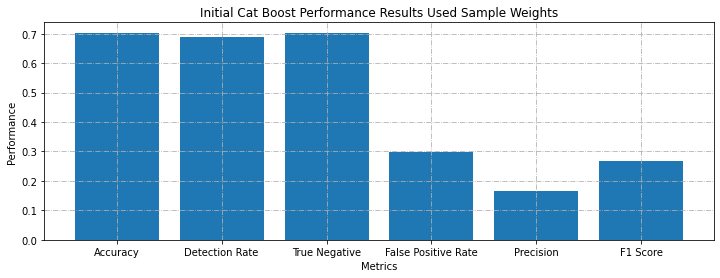

In [135]:
plot(cat_metrics,"Initial Cat Boost Performance Results Used Sample Weights")

# 4. FEATURE SELECTION BY LOFO IMPORTANCE

In [136]:
from lofo import FLOFOImportance, LOFOImportance, Dataset, plot_importance

C:\Users\erkay\AppData\Roaming\Python\Python39\site-packages\lofo\lofo_importance.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [137]:
#SAVE KFOLDS
skf5_notshuffled = StratifiedKFold(n_splits=5, shuffle=False)
skf2_notshuffled = StratifiedKFold(n_splits=2, shuffle=False)
skf3_notshuffled = StratifiedKFold(n_splits=3, shuffle=False)
skf4_notshuffled = StratifiedKFold(n_splits=4, shuffle=False)

In [138]:
sample_df = copy.deepcopy(df_X_scaled)
sample_df["TARGET"]=df_y
sample_df[:5]

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                 0.0          0.5           0.0              1.0   
1                 0.0          0.0           0.0              0.0   
2                 1.0          0.5           1.0              1.0   
3                 0.0          0.0           0.0              1.0   
4                 0.0          0.5           0.0              1.0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0           0.0          0.001512    0.090287     0.090032         0.077441   
1           0.0          0.002089    0.311736     0.132924         0.271605   
2           0.0          0.000358    0.022472     0.020025         0.023569   
3           0.0          0.000935    0.066837     0.109477         0.063973   
4           0.0          0.000819    0.116854     0.078975         0.117845   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0         1.000000          1.000000                 1.00                 0.6   
1         0.285714          0.571429                 0.25                 0.2   
2         1.000000          1.000000                 1.00                 0.6   
3         1.000000          1.000000                 1.00                 0.0   
4         1.000000          1.000000                 1.00                 0.6   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                0.2                    0.256321    0.888839       0.045086   
1                0.2                    0.045016    0.477114       0.043648   
2                0.2                    0.134897    0.348534       0.046161   
3                0.2                    0.107023    0.350846       0.038817   
4                0.2                    0.392880    0.298591       0.038820   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0           0.852140         0.705433         1.00         0.0   
1           0.951929         0.959566         1.00         0.0   
2           0.827335         0.648326         0.26         0.0   
3           0.601451         0.661387         1.00         0.0   
4           0.825268         0.519522         1.00         0.0   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0             1.0              0.0               1.0         1.0         0.0   
1             1.0              0.0               1.0         1.0         0.0   
2             1.0              1.0               1.0         1.0         0.0   
3             1.0              0.0               1.0         0.0         0.0   
4             1.0              0.0               1.0         0.0         0.0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0         0.500000         0.000000                   0.5   
1         0.222222         0.052632                   0.0   
2         0.500000         0.000000                   0.5   
3         0.500000         0.052632                   0.5   
4         0.222222         0.000000                   0.5   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                          0.5                    1.000000   
1                          0.0                    0.166667   
2                          0.5                    0.166667   
3                          0.5                    1.000000   
4                          0.5                    0.666667   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                 0.434783                         0.0   
1                 0.478261                         0.0   
2                 0.391304                         0.0   
3                 0.739130                         0.0   
4                 0.478261                         0.0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                         0.0                          0.0   
1                         0.0                          0.0  

In [139]:
#create lofo dataset
lofo_dataset   = Dataset(df=sample_df, target="TARGET", features=[col for col in sample_df.columns if col != "TARGET"])

## 4.1 LOFO IMPORTANCE BY CAT MODEL

### 4.1.1 CAT MODEL FLOFO

#### APPLY FLOFO

In [115]:
## APPLY FLOFO ON CAT MODEL
#cat_model_flofo = CatBoostClassifier(iterations=300, learning_rate=learning_rate, depth=max_depth, loss_function=loss_function, verbose=20)
#cat_model_flofo.fit(df_X_scaled, y, sample_weight = calculate_sample_weights(y,1))
#flofo_importance_cat = FLOFOImportance(cat_model_flofo, sample_df, [col for col in sample_df.columns if col != "TARGET"], "TARGET", scoring="roc_auc")
#importance_flofo_cat_df = flofo_importance_cat.get_importance() #save flofo of cat
#importance_flofo_cat_df.to_csv('feature_importance_flofo_cat.csv', index=False)

#### SKIP APPLY AND LOAD PRECALCULATED FLOFO

In [140]:
importance_flofo_cat_df = pd.read_csv("feature_importance_flofo_cat.csv")#read flofo of cat

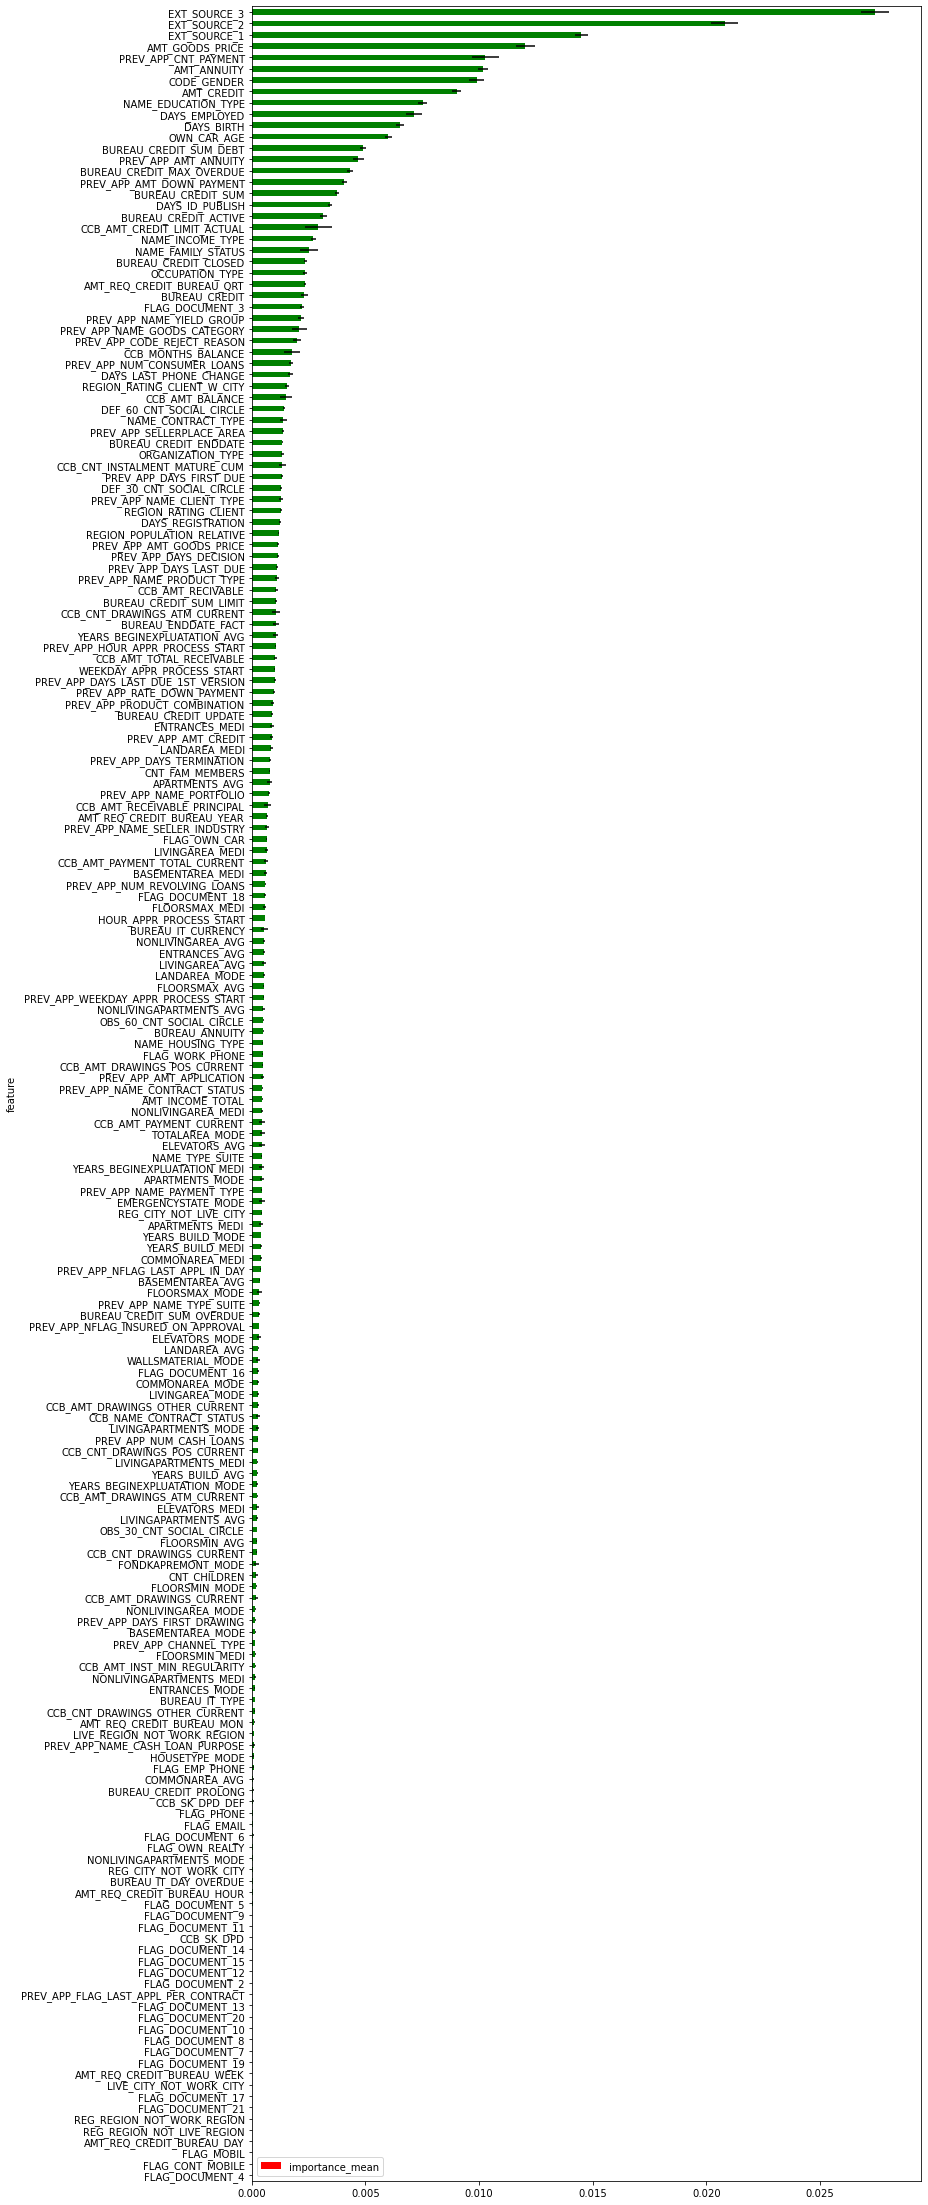

In [141]:
plot_importance(importance_flofo_cat_df, figsize=(12, 40))
plt.savefig('Feature_Importance_Flofo_Cat.png')

In [142]:
last100_elements_flofo_cat = importance_flofo_cat_df["feature"][-100:].tolist()
last50_elements_flofo_cat  = importance_flofo_cat_df["feature"][-100:].tolist()
best50_elements_flofo_cat  = importance_flofo_cat_df["feature"][:50].tolist()

### 4.1.2 CAT MODEL LOFO

#### APPLY LOFO ON CAT

In [119]:
## APPLY LOFO ON CAT MODEL
#cat_model_lofo = CatBoostClassifier(iterations=80, learning_rate=learning_rate, depth=max_depth, loss_function=loss_function, verbose=40)
#lofo_importance_cat = LOFOImportance(model = cat_model_lofo, dataset=lofo_dataset, cv = skf3, scoring="roc_auc")
#importance_lofo_cat_df = lofo_importance_cat.get_importance()
#importance_lofo_cat_df.to_csv('feature_importance_lofo_cat.csv', index=False) #save lofo of cat

#### SKIP APPLY AND LOAD PRECALCULATED LOFO

In [143]:
importance_lofo_cat_df = pd.read_csv("feature_importance_lofo_cat.csv")#read lofo of cat

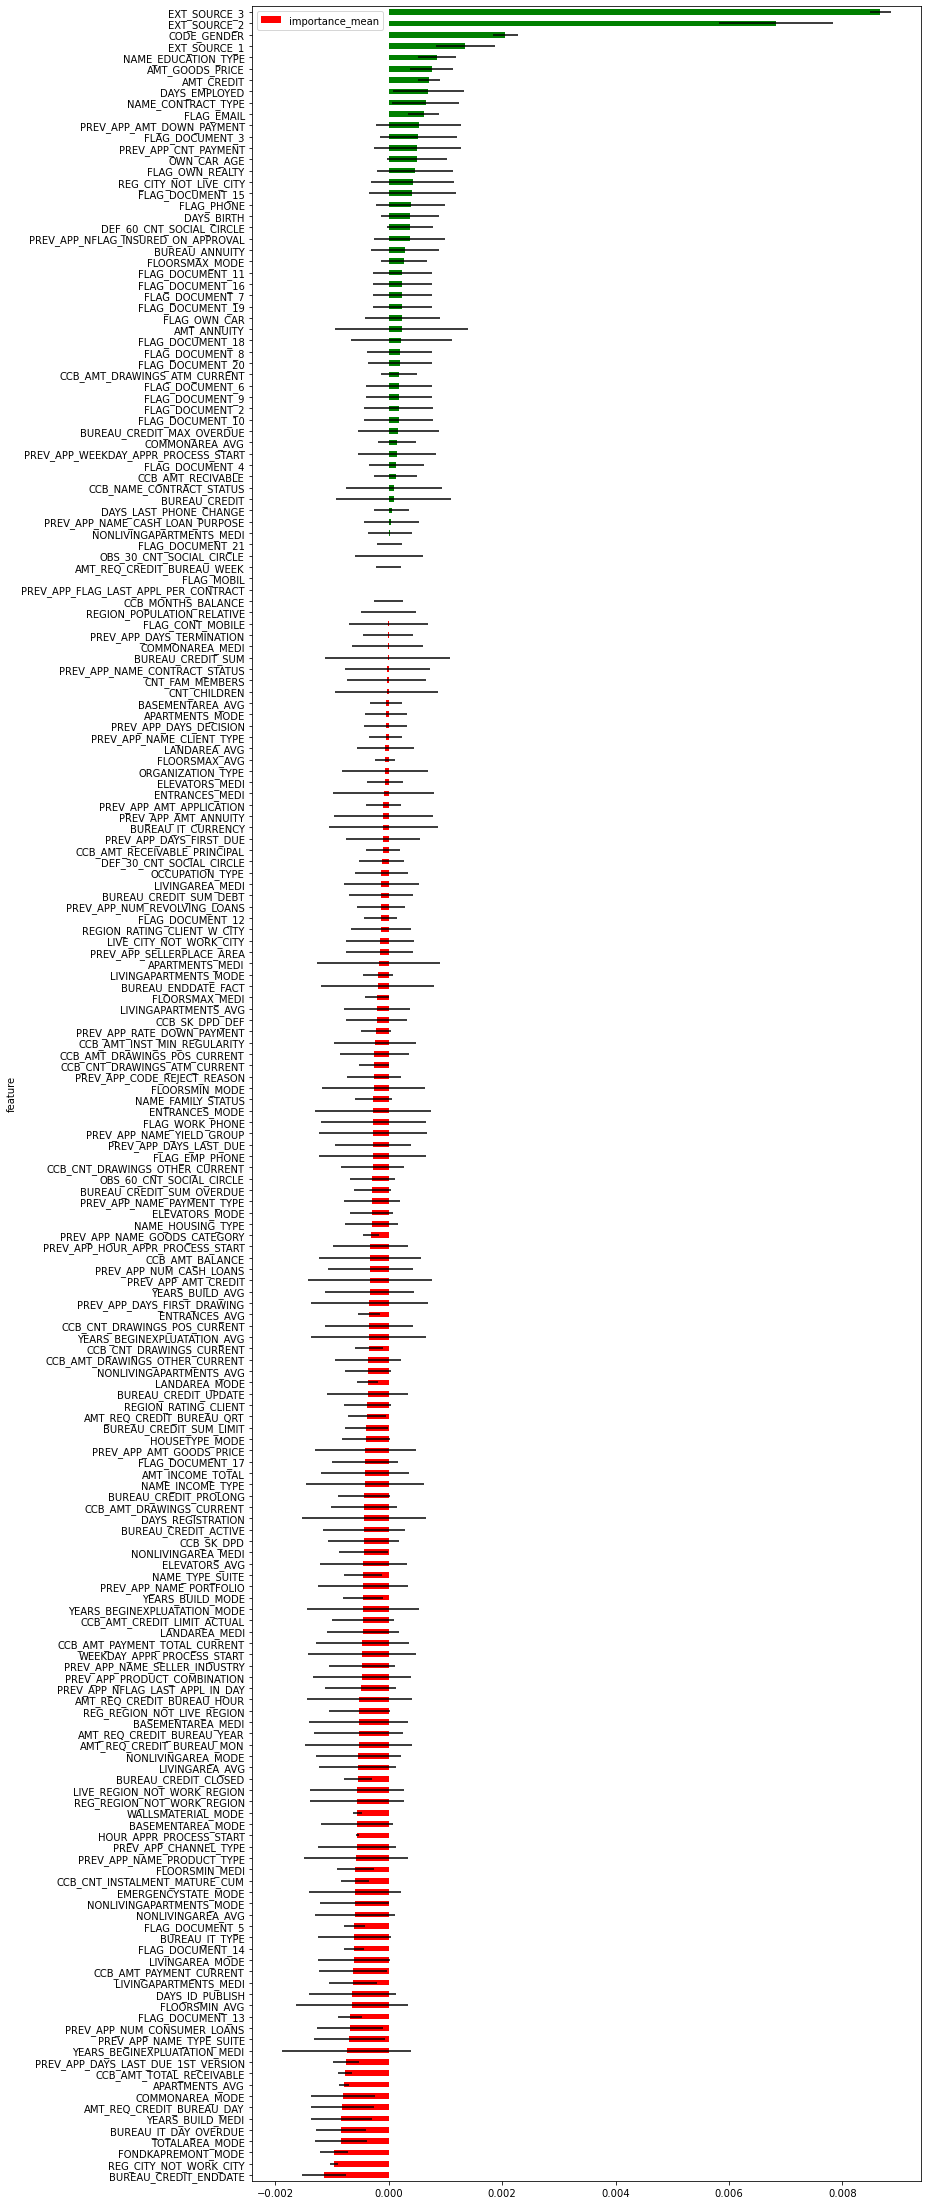

In [144]:
plot_importance(importance_lofo_cat_df, figsize=(12, 40))
plt.savefig('Feature_Importance_Lofo_Cat.png')

In [145]:
last100_elements_lofo_cat  = importance_lofo_cat_df["feature"][-100:].tolist()
negative_elements_lofo_cat = importance_lofo_cat_df[importance_lofo_cat_df["importance_mean"] < 0]["feature"].tolist()
positive_elements_lofo_cat = importance_lofo_cat_df[importance_lofo_cat_df["importance_mean"] > 0]["feature"].tolist()
best50_elements_lofo_cat   = importance_lofo_cat_df["feature"][:50].tolist()
print(len(last100_elements_lofo_cat))
print(len(negative_elements_lofo_cat))
print(len(positive_elements_lofo_cat))

100
140
50


## 4.2 LOFO IMPORTANCE BY RIDGE MODEL

#### APPLY LOFO ON RIDGE

In [146]:
## APPLY LOFO ON RIDGE MODEL
#sk_ridge_lofo = linear_model.Ridge(alpha=alpha).fit(X_scaled,y,sample_weight = calculate_sample_weights(y,sample_coef))
#lofo_importance_ridge = LOFOImportance(dataset=lofo_dataset, cv=skf3_notshuffled, model=sk_ridge_lofo , scoring="roc_auc")
#importance_df_ridge   = lofo_importance_ridge.get_importance()
#importance_df_ridge.to_csv('feature_importance_ridge.csv', index=False)  

#### SKIP APPLY AND LOAD PRECALCULATED LOFO ON RIDGE

In [147]:
importance_df_ridge = pd.read_csv("feature_importance_ridge.csv")#read lofo of cat

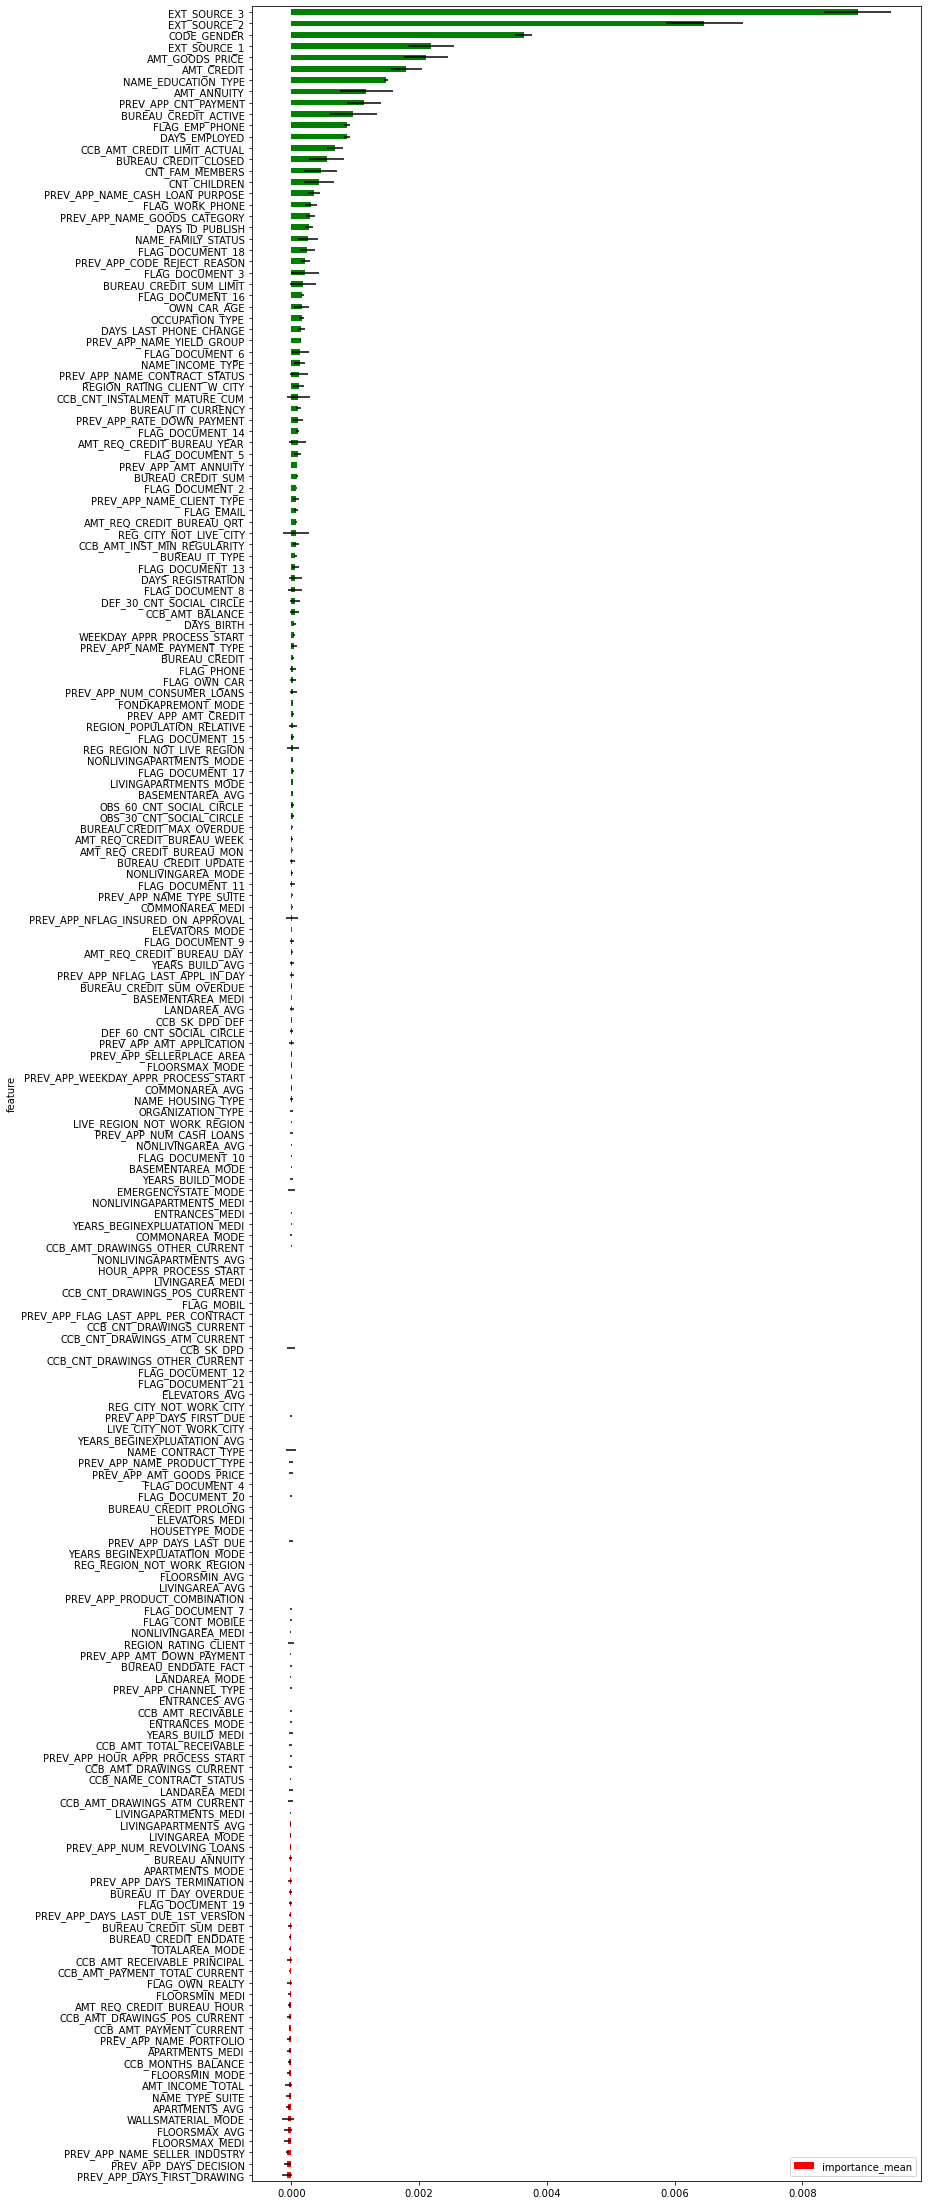

In [148]:
plot_importance(importance_df_ridge, figsize=(12, 40))
plt.savefig('Feature_Importance_Ridge.png')

In [149]:
negative_importance_features_ridge = importance_df_ridge[importance_df_ridge["importance_mean"] < 0]["feature"].tolist()
best50_elements_ridge   = importance_df_ridge["feature"][:50].tolist()
positive_elements_ridge = importance_df_ridge[importance_df_ridge["importance_mean"] > 0]["feature"].tolist()

In [151]:
last100_elements_ridge = importance_df_ridge["feature"][-100:].tolist()

## 4.3 Combine LOFO Results

In [152]:
drop_common_features = set(last100_elements_flofo_cat) & set(negative_elements_lofo_cat) & set(last100_elements_ridge)
print(len(drop_common_features))

44


In [153]:
best_elements1 = set(best50_elements_ridge) & set(best50_elements_flofo_cat) & set(best50_elements_lofo_cat)
best_elements2 = set(best50_elements_ridge) & set(best50_elements_lofo_cat)
print(len(best_elements1))
print(len(best_elements2))
print(len(positive_elements_ridge))

13
20
114


## 4.4 Train with Dropped Features

In [154]:
#df_X_scaled_dropped_common_features = df_X_scaled.drop(drop_common_features, axis=1)
df_X_scaled_dropped_common_features = df_X_scaled[best_elements2]

C:\Users\erkay\AppData\Local\Temp\ipykernel_18640\327597562.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_X_scaled_dropped_common_features = df_X_scaled[best_elements2]


In [155]:
X_scaled_dropped_common_features = df_X_scaled_dropped_common_features.to_numpy()

In [156]:
df_X_scaled_dropped_common_features[:5]

EXT_SOURCE_1  FLAG_EMAIL  FLAG_DOCUMENT_3  FLAG_DOCUMENT_18  \
0      0.086249         0.0              1.0               0.0   
1      0.323326         0.0              1.0               0.0   
2      0.667645         0.0              0.0               0.0   
3      0.675646         0.0              1.0               0.0   
4      0.335241         0.0              0.0               0.0   

   FLAG_DOCUMENT_2  FLAG_DOCUMENT_16  DAYS_EMPLOYED  DAYS_LAST_PHONE_CHANGE  \
0              0.0               0.0       0.045086                0.735788   
1              0.0               0.0       0.043648                0.807083   
2              0.0               0.0       0.046161                0.810112   
3              0.0               0.0       0.038817                0.856244   
4              0.0               0.0       0.038820                0.742311   

   AMT_GOODS_PRICE  EXT_SOURCE_3  PREV_APP_CNT_PAYMENT  OWN_CAR_AGE  \
0         0.077441      0.155546              0.333333         1.00   
1         0.271605      0.520925              0.138889         1.00   
2         0.023569      0.814239              0.055556         0.26   
3         0.063973      0.725930              0.319444         1.00   
4         0.117845      0.360191              0.287037         1.00   

   REG_CITY_NOT_LIVE_CITY  FLAG_DOCUMENT_6  EXT_SOURCE_2  NAME_EDUCATION_TYPE  \
0                     0.0              0.0      0.304563                 1.00   
1                     0.0              0.0      0.720723                 0.25   
2                     0.0              0.0      0.643891                 1.00   
3                     0.0              0.0      0.753381                 1.00   
4                     0.0              0.0      0.373815                 1.00   

   PREV_APP_NAME_CASH_LOAN_PURPOSE  AMT_ANNUITY  AMT_CREDIT  CODE_GENDER  
0                              1.0     0.090032    0.090287          0.5  
1                              1.0     0.132924    0.311736          0.0  
2                              1.0     0.020025    0.022472          0.5  
3                              1.0     0.109477    0.066837          0.0  
4                              1.0     0.078975    0.116854          0.5

In [158]:
#Model Settings
max_depth = 10
learning_rate = 4e-2
max_iter = 200
cat_features = 11
verbose = 20
l2_leaf_reg = 1e-3
sample_coef = 1
loss_function = 'Logloss'

In [159]:
# CREATE CAT CLASSIFIER
#
max_iter  = 250
verbose   = 20

cat_model = CatBoostClassifier(iterations=max_iter, learning_rate=learning_rate, depth=max_depth, loss_function=loss_function, verbose=verbose)

train_accuracy_cat  = []
test_accuracy_cat   = []
train_detection_cat = []
test_detection_cat  = []
train_precision_cat = []
test_precision_cat  = []
train_true_negative_cat = []
test_true_negative_cat  = []
train_F1_cat = []
test_F1_cat  = []
train_false_positive_cat = []
test_false_positive_cat  = []

temp_index = 1
for train_index, test_index in skf5.split(X_scaled_dropped_common_features, y):
    print("Fold:", temp_index)
    x_train_fold, x_test_fold = X_scaled_dropped_common_features[train_index], X_scaled_dropped_common_features[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    #Train Model
    cat_model.fit(x_train_fold, y_train_fold,sample_weight=calculate_sample_weights(y_train_fold,sample_coef))
    
    #Predictions
    y_train_predict = cat_model.predict(x_train_fold)
    train_accuracy,train_detection,train_true_negative,train_false_positive,train_precision,train_F1 = accuracy_score_without_plot(y_train_fold,y_train_predict)
    
    y_test_predict  = cat_model.predict(x_test_fold)
    test_accuracy,test_detection,test_true_negative,test_false_positive,test_precision,test_F1 = accuracy_score_without_plot(y_test_fold,y_test_predict)

    train_accuracy_cat.append(train_accuracy)
    test_accuracy_cat.append(test_accuracy)
    train_detection_cat.append(train_detection)
    test_detection_cat.append(test_detection)
    train_precision_cat.append(train_precision)
    test_precision_cat.append(test_precision)
    train_true_negative_cat.append(train_true_negative)
    test_true_negative_cat.append(test_true_negative)
    train_F1_cat.append(train_F1)
    test_F1_cat.append(test_F1)
    train_false_positive_cat.append(train_false_positive)
    test_false_positive_cat.append(test_false_positive)
    
    temp_index = temp_index + 1
    
mean_test_accuracy_cat = np.mean(test_accuracy_cat)
mean_test_detection_cat = np.mean(test_detection_cat)
mean_test_precision_cat = np.mean(test_precision_cat)
mean_test_true_negative_cat = np.mean(test_true_negative_cat)
mean_test_F1_cat = np.mean(test_F1_cat)
mean_test_false_positive_cat = np.mean(test_F1_cat)

cat_metrics_reduced = [mean_test_accuracy_cat,mean_test_detection_cat,mean_test_true_negative_cat,mean_test_false_positive_cat,mean_test_precision_cat,mean_test_F1_cat]

Fold: 1
0:	learn: 0.6863184	total: 131ms	remaining: 32.5s
20:	learn: 0.6159057	total: 1.89s	remaining: 20.6s
40:	learn: 0.5911671	total: 3.69s	remaining: 18.8s
60:	learn: 0.5787372	total: 5.55s	remaining: 17.2s
80:	learn: 0.5704011	total: 7.28s	remaining: 15.2s
100:	learn: 0.5629021	total: 9s	remaining: 13.3s
120:	learn: 0.5580352	total: 10.7s	remaining: 11.4s
140:	learn: 0.5526683	total: 12.4s	remaining: 9.59s
160:	learn: 0.5475115	total: 14.1s	remaining: 7.79s
180:	learn: 0.5426406	total: 15.8s	remaining: 6.02s
200:	learn: 0.5371329	total: 17.5s	remaining: 4.26s
220:	learn: 0.5323987	total: 20.1s	remaining: 2.63s
240:	learn: 0.5278596	total: 23.3s	remaining: 872ms
249:	learn: 0.5263330	total: 24.7s	remaining: 0us
Fold: 2
0:	learn: 0.6866204	total: 143ms	remaining: 35.7s
20:	learn: 0.6172205	total: 1.96s	remaining: 21.4s
40:	learn: 0.5925375	total: 4.62s	remaining: 23.6s
60:	learn: 0.5792579	total: 8.63s	remaining: 26.7s
80:	learn: 0.5708007	total: 12.3s	remaining: 25.6s
100:	learn: 0

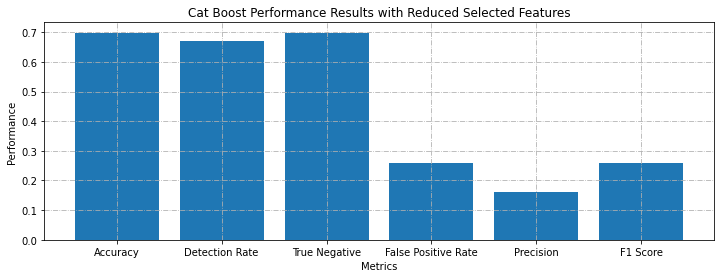

In [160]:
plot(cat_metrics_reduced,"Cat Boost Performance Results with Reduced Selected Features")

# 5. Hyperparameter Optimization

In [165]:
import optuna
import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection

In [ ]:
## TO LOAD LOFO IMPORTANCE
# LOAD THESE IF YOU SKIP SECTION 4
#importance_flofo_cat_df = pd.read_csv("feature_importance_flofo_cat.csv")#read flofo of cat
#importance_lofo_cat_df = pd.read_csv("feature_importance_lofo_cat.csv")#read lofo of cat
#importance_df_ridge = pd.read_csv("feature_importance_ridge.csv")#read lofo of cat

## 5.1 Ridge Classifier Hyperparameter Optimization

In [166]:
# Set Parameters
alpha = 1e-4
coef  = 1

In [167]:
class_weights = [1, 12.688]

In [168]:
def objective1_ridge(trial):

    #Suggest values for alpha(regularization parameter)
    alphax = trial.suggest_float('alphax', 1e-4, 1e1, log=True)
    
    #Suggest values for best k features
    best_k_features = trial.suggest_int('best_k_features', 100, 192, log=False)
    
    features       = importance_df_ridge["feature"][:best_k_features].tolist()    
    X_scaled_trial = copy.deepcopy(df_X_scaled[features]).to_numpy()
    classifier_obj = linear_model.Ridge(alpha = alphax)
    #print(classifier_obj)
    #print("num_columns:",X_scaled_trial.shape[1])
    
    #score = sklearn.model_selection.cross_val_score(classifier_obj, X_scaled, y, n_jobs=-1, cv=3, fit_params={'sample_weight': [class_weights[i] for i in y]})
    score = []
    temp_index = 0
    
    for train_index, test_index in skf4.split(X_scaled_trial, y):
        #print("Fold:", temp_index)
        x_train_fold, x_test_fold = X_scaled_trial[train_index], X_scaled_trial[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        y_train_fold_coded, y_test_fold_coded = y_minus[train_index], y_minus[test_index]

        #Train
        classifier_obj.fit(x_train_fold, y_train_fold_coded, sample_weight=calculate_sample_weights(y_train_fold,coef))
        
        #Predict
        y_test_predict = classifier_obj.predict(x_test_fold)>0
        test_metrics   = accuracy_score_without_plot(y_test_fold,y_test_predict)
        
        score.append(test_metrics[1]-test_metrics[3])#true pos ratio - false pos ratio
        temp_index = temp_index + 1
        
    accuracy = np.mean(score)
    return accuracy

In [169]:
if __name__ == "__main__":
    #optuna.logging.set_verbosity(optuna.logging.WARNING)
    optuna.logging.set_verbosity(optuna.logging.INFO)
    study1_ridge = optuna.create_study(direction="maximize")
    study1_ridge.optimize(objective1_ridge, n_trials=100)
    print(study1_ridge.best_trial)

[I 2024-07-26 21:00:34,615] A new study created in memory with name: no-name-4b98fd71-43a6-4112-9dc0-8cb963d52d7d
[I 2024-07-26 21:00:41,240] Trial 0 finished with value: 0.3835528408921094 and parameters: {'alphax': 2.6186753323799214, 'best_k_features': 102}. Best is trial 0 with value: 0.3835528408921094.
[I 2024-07-26 21:00:47,827] Trial 1 finished with value: 0.3832291869468066 and parameters: {'alphax': 0.0008298048099799679, 'best_k_features': 110}. Best is trial 0 with value: 0.3835528408921094.
[I 2024-07-26 21:00:54,969] Trial 2 finished with value: 0.38405879331011045 and parameters: {'alphax': 0.0007298525393159056, 'best_k_features': 130}. Best is trial 2 with value: 0.38405879331011045.
[I 2024-07-26 21:01:01,362] Trial 3 finished with value: 0.3833082799898766 and parameters: {'alphax': 0.4997559502438081, 'best_k_features': 102}. Best is trial 2 with value: 0.38405879331011045.
[W 2024-07-26 21:01:03,598] Trial 4 failed with parameters: {'alphax': 0.14440882453858556, '

KeyboardInterrupt: 

In [170]:
from optuna.visualization import plot_optimization_history
plot_optimization_history(study1_ridge)

In [171]:
print("Best parameters:",study1_ridge.best_params)

Best parameters: {'alphax': 0.0007298525393159056, 'best_k_features': 130}


In [172]:
optuna.visualization.plot_slice(study1_ridge)

### Clearly, from the experiment, best feature set is best 120 features, k=120. For fine tuning, we can continue to search among different alpha values.

In [276]:
def objective2_ridge(trial):

    #Suggest values for alpha(regularization parameter)
    alphax = trial.suggest_float('alphax', 1e-4, 1e1, log=True)
    
    #Suggest values for best k features
    best_k_features = 120
    
    features       = importance_df_ridge["feature"][:best_k_features].tolist()    
    X_scaled_trial = copy.deepcopy(df_X_scaled[features]).to_numpy()
    classifier_obj = linear_model.Ridge(alpha = alphax)
    #print(classifier_obj)
    #print("num_columns:",X_scaled_trial.shape[1])
    
    #score = sklearn.model_selection.cross_val_score(classifier_obj, X_scaled, y, n_jobs=-1, cv=3, fit_params={'sample_weight': [class_weights[i] for i in y]})
    score = []
    temp_index = 0
    
    for train_index, test_index in skf4.split(X_scaled_trial, y):
        #print("Fold:", temp_index)
        x_train_fold, x_test_fold = X_scaled_trial[train_index], X_scaled_trial[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        y_train_fold_coded, y_test_fold_coded = y_minus[train_index], y_minus[test_index]

        #Train
        classifier_obj.fit(x_train_fold, y_train_fold_coded, sample_weight=calculate_sample_weights(y_train_fold,coef))
        
        #Predict
        y_test_predict = classifier_obj.predict(x_test_fold)>0
        test_metrics   = accuracy_score_without_plot(y_test_fold,y_test_predict)
        
        score.append(test_metrics[1]-test_metrics[3])#true pos ratio - false pos ratio
        temp_index = temp_index + 1
        
    accuracy = np.mean(score)
    return accuracy

In [277]:
optuna.logging.set_verbosity(optuna.logging.INFO)
study2_ridge = optuna.create_study(direction="maximize")
study2_ridge.optimize(objective2_ridge, n_trials=20)
print(study2_ridge.best_trial)

[I 2024-07-25 23:59:16,208] A new study created in memory with name: no-name-4f4d2e2e-dab2-4ea7-b007-240b102de567
[I 2024-07-25 23:59:20,451] Trial 0 finished with value: 0.38359960705760476 and parameters: {'alphax': 0.005881821934813202}. Best is trial 0 with value: 0.38359960705760476.
[I 2024-07-25 23:59:24,561] Trial 1 finished with value: 0.3834900392548102 and parameters: {'alphax': 0.22581732669503127}. Best is trial 0 with value: 0.38359960705760476.
[I 2024-07-25 23:59:28,824] Trial 2 finished with value: 0.3835588859240219 and parameters: {'alphax': 0.00020300096202163583}. Best is trial 0 with value: 0.38359960705760476.
[I 2024-07-25 23:59:34,463] Trial 3 finished with value: 0.3836160215646238 and parameters: {'alphax': 0.08916630441230305}. Best is trial 3 with value: 0.3836160215646238.
[I 2024-07-25 23:59:40,001] Trial 4 finished with value: 0.3835664979669005 and parameters: {'alphax': 0.02062908514254734}. Best is trial 3 with value: 0.3836160215646238.
[I 2024-07-25

FrozenTrial(number=3, state=TrialState.COMPLETE, values=[0.3836160215646238], datetime_start=datetime.datetime(2024, 7, 25, 23, 59, 28, 824602), datetime_complete=datetime.datetime(2024, 7, 25, 23, 59, 34, 463048), params={'alphax': 0.08916630441230305}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'alphax': FloatDistribution(high=10.0, log=True, low=0.0001, step=None)}, trial_id=3, value=None)


In [278]:
print("Best parameters for Study 2 of Ridge Model is:",study2_ridge.best_params)

Best parameters for Study 2 of Ridge Model is: {'alphax': 0.08916630441230305}


In [279]:
optuna.visualization.plot_slice(study2_ridge)

#### The score function is less sensitive to $\alpha$, regularization coefficient parameter. We observe reduction in the score after $\alpha>0.1$, but otherwise score seems to not been affected by decreasing values.

In [284]:
## SET BEST RIDGE PARAMETERS
best_alpha = study2_ridge.best_params['alphax']
best_best_k_features_ridge = study1_ridge.best_params['best_k_features']

## 5.2 Cat Classifier Hyperparameter Optimization

In [236]:
#Model Default Settings
max_depth = 10
learning_rate = 4e-2
max_iter = 200
#cat_features = 11
verbose = 50
l2_leaf_reg = 1e-3
sample_coef = 1
loss_function = 'Logloss'

In [322]:
def objective1_cat(trial):

    #Suggest values for max depth
    max_depth = trial.suggest_categorical('max_depth', [5, 7, 9, 11, 12])
    
    #Suggest values for l2_leaf_reg
    #l2_leaf_reg = trial.suggest_categorical('l2_leaf_reg', [1e-3, 1e-2])
    l2_leaf_reg = 5e-3
    
    #Suggest values for learning rate
    #learning_rate = trial.suggest_float('learning_rate', 1e-2, 1e-1, log=True)
    learning_rate = 3e-2

    #Suggest values for best k features
    best_k_features = trial.suggest_int('best_k_features', 80, 192, log=False)
    
    features       = importance_lofo_cat_df["feature"][:best_k_features].tolist()    
    X_scaled_trial = copy.deepcopy(df_X_scaled[features]).to_numpy()
    classifier_obj = CatBoostClassifier(iterations=max_iter, learning_rate=learning_rate, depth=max_depth, loss_function=loss_function, verbose=verbose, l2_leaf_reg=l2_leaf_reg)

    print(classifier_obj)
    print("num_columns:",X_scaled_trial.shape[1])
    print("max_depth:",max_depth)
    print("l2_leaf_reg:",l2_leaf_reg)
    
    score = []
    temp_index = 0
    
    for train_index, test_index in skf3.split(X_scaled_trial, y):
        print("Fold:", temp_index)
        x_train_fold, x_test_fold = X_scaled_trial[train_index], X_scaled_trial[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]

        #Train
        classifier_obj.fit(x_train_fold, y_train_fold, sample_weight=calculate_sample_weights(y_train_fold,coef))
        
        #Predict
        y_test_predict = classifier_obj.predict(x_test_fold)
        test_metrics   = accuracy_score_without_plot(y_test_fold,y_test_predict)
        
        score.append(test_metrics[1]-test_metrics[3])#true pos ratio - false pos ratio
        temp_index = temp_index + 1
        
    accuracy = np.mean(score)
    print(score)
    return accuracy

In [301]:
study1_cat = optuna.create_study(direction="maximize")
study1_cat.optimize(objective1_cat, n_trials=50)

[I 2024-07-26 09:35:02,699] A new study created in memory with name: no-name-52b84362-9562-44b0-a596-9e0ddc85ed2c


num_columns: 119
max_depth: 9
l2_leaf_reg: 0.001
Fold: 0
0:	learn: 0.6868954	total: 131ms	remaining: 26s
50:	learn: 0.5788822	total: 5.9s	remaining: 17.2s
100:	learn: 0.5458503	total: 16.8s	remaining: 16.5s
150:	learn: 0.5243567	total: 27s	remaining: 8.75s
199:	learn: 0.5052922	total: 36.8s	remaining: 0us
Fold: 1
0:	learn: 0.6873610	total: 123ms	remaining: 24.5s
50:	learn: 0.5782718	total: 10.5s	remaining: 30.6s
100:	learn: 0.5456035	total: 20.6s	remaining: 20.2s
150:	learn: 0.5213093	total: 30.6s	remaining: 9.93s
199:	learn: 0.5017156	total: 40.6s	remaining: 0us
Fold: 2
0:	learn: 0.6868028	total: 131ms	remaining: 26s
50:	learn: 0.5766854	total: 10.4s	remaining: 30.5s
100:	learn: 0.5440083	total: 20.6s	remaining: 20.2s
150:	learn: 0.5198657	total: 30.7s	remaining: 9.95s
199:	learn: 0.5009174	total: 40.3s	remaining: 0us


[I 2024-07-26 09:37:27,237] Trial 0 finished with value: 0.36676394152368835 and parameters: {'max_depth': 9, 'l2_leaf_reg': 0.001, 'best_k_features': 119}. Best is trial 0 with value: 0.36676394152368835.


[0.36829997126245434, 0.36713693944824477, 0.36485491386036595]
num_columns: 86
max_depth: 9
l2_leaf_reg: 0.001
Fold: 0
0:	learn: 0.6867362	total: 115ms	remaining: 22.9s
50:	learn: 0.5778615	total: 8.14s	remaining: 23.8s
100:	learn: 0.5446541	total: 16.1s	remaining: 15.8s
150:	learn: 0.5210387	total: 24.2s	remaining: 7.85s
199:	learn: 0.5013989	total: 32.3s	remaining: 0us
Fold: 1
0:	learn: 0.6869078	total: 95.5ms	remaining: 19s
50:	learn: 0.5792122	total: 7.82s	remaining: 22.9s
100:	learn: 0.5463120	total: 15.9s	remaining: 15.6s
150:	learn: 0.5238238	total: 24s	remaining: 7.78s
199:	learn: 0.5044016	total: 31.8s	remaining: 0us
Fold: 2
0:	learn: 0.6864489	total: 97.9ms	remaining: 19.5s
50:	learn: 0.5768105	total: 7.89s	remaining: 23s
100:	learn: 0.5438246	total: 16.2s	remaining: 15.9s
150:	learn: 0.5204377	total: 24.2s	remaining: 7.86s
199:	learn: 0.5013424	total: 32s	remaining: 0us


[I 2024-07-26 09:39:23,395] Trial 1 finished with value: 0.3680302620628237 and parameters: {'max_depth': 9, 'l2_leaf_reg': 0.001, 'best_k_features': 86}. Best is trial 1 with value: 0.3680302620628237.


[0.36932453879071975, 0.37439512451966545, 0.3603711228780859]
num_columns: 87
max_depth: 7
l2_leaf_reg: 0.01
Fold: 0
0:	learn: 0.6872622	total: 56.9ms	remaining: 11.3s
50:	learn: 0.5989923	total: 4.73s	remaining: 13.8s
100:	learn: 0.5810708	total: 9.84s	remaining: 9.65s
150:	learn: 0.5700973	total: 15s	remaining: 4.86s
199:	learn: 0.5614886	total: 20.3s	remaining: 0us
Fold: 1
0:	learn: 0.6876068	total: 58.2ms	remaining: 11.6s
50:	learn: 0.5995118	total: 4.78s	remaining: 14s
100:	learn: 0.5811747	total: 11s	remaining: 10.8s
150:	learn: 0.5705571	total: 16.5s	remaining: 5.37s
199:	learn: 0.5621072	total: 22.4s	remaining: 0us
Fold: 2
0:	learn: 0.6875025	total: 99ms	remaining: 19.7s
50:	learn: 0.5973997	total: 6.69s	remaining: 19.6s
100:	learn: 0.5797026	total: 14s	remaining: 13.8s
150:	learn: 0.5690350	total: 19.2s	remaining: 6.22s
199:	learn: 0.5603922	total: 24.1s	remaining: 0us


[I 2024-07-26 09:40:52,754] Trial 2 finished with value: 0.38694378421123027 and parameters: {'max_depth': 7, 'l2_leaf_reg': 0.01, 'best_k_features': 87}. Best is trial 2 with value: 0.38694378421123027.


[0.3856381983393673, 0.3918457998226753, 0.3833473544716482]
num_columns: 94
max_depth: 7
l2_leaf_reg: 0.01
Fold: 0
0:	learn: 0.6874036	total: 70.2ms	remaining: 14s
50:	learn: 0.5990225	total: 5.41s	remaining: 15.8s
100:	learn: 0.5804345	total: 10.8s	remaining: 10.6s
150:	learn: 0.5700368	total: 16s	remaining: 5.19s
199:	learn: 0.5616799	total: 21.3s	remaining: 0us
Fold: 1
0:	learn: 0.6878020	total: 56.5ms	remaining: 11.2s
50:	learn: 0.6001428	total: 5.65s	remaining: 16.5s
100:	learn: 0.5815544	total: 11.5s	remaining: 11.3s
150:	learn: 0.5705644	total: 16.8s	remaining: 5.44s
199:	learn: 0.5625279	total: 21.8s	remaining: 0us
Fold: 2
0:	learn: 0.6876436	total: 59.5ms	remaining: 11.8s
50:	learn: 0.5976574	total: 5.07s	remaining: 14.8s
100:	learn: 0.5795030	total: 10.6s	remaining: 10.4s
150:	learn: 0.5687510	total: 15.8s	remaining: 5.13s
199:	learn: 0.5600483	total: 20.9s	remaining: 0us


[I 2024-07-26 09:42:19,054] Trial 3 finished with value: 0.38400605417294065 and parameters: {'max_depth': 7, 'l2_leaf_reg': 0.01, 'best_k_features': 94}. Best is trial 2 with value: 0.38694378421123027.


[0.3817860493429241, 0.3887366072473685, 0.38149550592852943]
num_columns: 152
max_depth: 7
l2_leaf_reg: 0.001
Fold: 0
0:	learn: 0.6876465	total: 86.2ms	remaining: 17.2s
50:	learn: 0.6001982	total: 7.5s	remaining: 21.9s
100:	learn: 0.5803531	total: 14.7s	remaining: 14.4s
150:	learn: 0.5688457	total: 21.8s	remaining: 7.06s
199:	learn: 0.5600603	total: 28.6s	remaining: 0us
Fold: 1
0:	learn: 0.6876596	total: 123ms	remaining: 24.6s
50:	learn: 0.6002984	total: 8.88s	remaining: 26s
100:	learn: 0.5803237	total: 16.2s	remaining: 15.9s
150:	learn: 0.5687336	total: 23.3s	remaining: 7.58s
199:	learn: 0.5596920	total: 30.1s	remaining: 0us
Fold: 2
0:	learn: 0.6877069	total: 84.5ms	remaining: 16.8s
50:	learn: 0.5978492	total: 7.51s	remaining: 21.9s
100:	learn: 0.5788515	total: 15.3s	remaining: 15s
150:	learn: 0.5673088	total: 22.4s	remaining: 7.28s
199:	learn: 0.5584211	total: 29.3s	remaining: 0us


[I 2024-07-26 09:44:23,905] Trial 4 finished with value: 0.3843011800464697 and parameters: {'max_depth': 7, 'l2_leaf_reg': 0.001, 'best_k_features': 152}. Best is trial 2 with value: 0.38694378421123027.


[0.38095416393918824, 0.3904217918497077, 0.38152758435051304]
num_columns: 176
max_depth: 9
l2_leaf_reg: 0.01
Fold: 0
0:	learn: 0.6866762	total: 202ms	remaining: 40.2s
50:	learn: 0.5799550	total: 14.5s	remaining: 42.3s
100:	learn: 0.5483826	total: 28.2s	remaining: 27.6s
150:	learn: 0.5263364	total: 41.4s	remaining: 13.4s
199:	learn: 0.5081475	total: 54.3s	remaining: 0us
Fold: 1
0:	learn: 0.6868202	total: 172ms	remaining: 34.2s
50:	learn: 0.5805587	total: 14.4s	remaining: 42s
100:	learn: 0.5477875	total: 30s	remaining: 29.4s
150:	learn: 0.5253811	total: 43.4s	remaining: 14.1s
199:	learn: 0.5067315	total: 56.9s	remaining: 0us
Fold: 2
0:	learn: 0.6869990	total: 160ms	remaining: 31.9s
50:	learn: 0.5786101	total: 14.6s	remaining: 42.6s
100:	learn: 0.5473758	total: 28.1s	remaining: 27.5s
150:	learn: 0.5231629	total: 41.8s	remaining: 13.6s
199:	learn: 0.5055514	total: 55.1s	remaining: 0us


[I 2024-07-26 09:47:49,592] Trial 5 finished with value: 0.3709734463083931 and parameters: {'max_depth': 9, 'l2_leaf_reg': 0.01, 'best_k_features': 176}. Best is trial 2 with value: 0.38694378421123027.


[0.37213727541572184, 0.3751859112230359, 0.36559715228642137]
num_columns: 126
max_depth: 9
l2_leaf_reg: 0.001
Fold: 0
0:	learn: 0.6871182	total: 122ms	remaining: 24.4s
50:	learn: 0.5770024	total: 11.8s	remaining: 34.6s
100:	learn: 0.5438583	total: 22.6s	remaining: 22.2s
150:	learn: 0.5212388	total: 33.2s	remaining: 10.8s
199:	learn: 0.5017531	total: 43.5s	remaining: 0us
Fold: 1
0:	learn: 0.6867963	total: 196ms	remaining: 38.9s
50:	learn: 0.5790938	total: 11.5s	remaining: 33.5s
100:	learn: 0.5458290	total: 22.7s	remaining: 22.2s
150:	learn: 0.5233741	total: 34.8s	remaining: 11.3s
199:	learn: 0.5045194	total: 46.1s	remaining: 0us
Fold: 2
0:	learn: 0.6868663	total: 128ms	remaining: 25.5s
50:	learn: 0.5778852	total: 10.9s	remaining: 31.8s


[W 2024-07-26 09:49:58,875] Trial 6 failed with parameters: {'max_depth': 9, 'l2_leaf_reg': 0.001, 'best_k_features': 126} because of the following error: KeyboardInterrupt('').
Traceback (most recent call last):
  File "C:\Users\erkay\AppData\Roaming\Python\Python39\site-packages\optuna\study\_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\erkay\AppData\Local\Temp\ipykernel_23680\261709928.py", line 30, in objective1_cat
    classifier_obj.fit(x_train_fold, y_train_fold, sample_weight=calculate_sample_weights(y_train_fold,coef))
  File "C:\Users\erkay\AppData\Roaming\Python\Python39\site-packages\catboost\core.py", line 5220, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\erkay\AppData\Roaming\Python\Python39\site-packages\catboost\core.py", line 2400, in _fit
    self._train(
  File "C:\Users\erkay\AppData\Roaming\Python\Python

KeyboardInterrupt: 

In [291]:
print("Best parameters for CAT:",study1_cat.best_params)

Best parameters for CAT: {'max_depth': 7, 'l2_leaf_reg': 0.01, 'best_k_features': 167}


In [292]:
plot_optimization_history(study1_cat)

In [293]:
optuna.visualization.plot_param_importances(study1_cat)

In [294]:
optuna.visualization.plot_slice(study1_cat)

### Max_depth is the strongest hyperparameter in performance optimization, ie highest correlation. Furthermore, not as strongest as max_depth parameter, best_k_features has tendency to produce better score towards 100. Therefore, We can design the second experiment such as reducing the search area towards best performances. 

In [336]:
def objective2_cat(trial):
    
    max_iter  = 250
    #Suggest values for max depth
    max_depth = trial.suggest_categorical('max_depth', [7, 8])
    
    #Suggest values for l2_leaf_reg
    #l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 1e-3, 1e-1, log=True)
    l2_leaf_reg = 1e-2
    
    #Suggest values for learning rate
    #learning_rate = trial.suggest_float('learning_rate', 1e-3, 1e-1, log=False)
    learning_rate = 3.5e-2
    
    #Suggest values for best k features
    best_k_features = trial.suggest_int('best_k_features', 80, 120, log=False)
    
    features       = importance_lofo_cat_df["feature"][:best_k_features].tolist()    
    X_scaled_trial = copy.deepcopy(df_X_scaled[features]).to_numpy()
    classifier_obj = CatBoostClassifier(iterations=max_iter, learning_rate=learning_rate, depth=max_depth, loss_function=loss_function, verbose=verbose, l2_leaf_reg=l2_leaf_reg)

    print(classifier_obj)
    print("num_columns:",X_scaled_trial.shape[1])
    print("max_depth:",max_depth)
    #print("l2_leaf_reg:",l2_leaf_reg)
    
    #score = sklearn.model_selection.cross_val_score(classifier_obj, X_scaled, y, n_jobs=-1, cv=3, fit_params={'sample_weight': [class_weights[i] for i in y]})
    score = []
    temp_index = 0
    
    for train_index, test_index in skf3.split(X_scaled_trial, y):
        print("Fold:", temp_index)
        x_train_fold, x_test_fold = X_scaled_trial[train_index], X_scaled_trial[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]

        #Train
        classifier_obj.fit(x_train_fold, y_train_fold, sample_weight=calculate_sample_weights(y_train_fold,coef))
        
        #Predict
        y_test_predict = classifier_obj.predict(x_test_fold)
        test_metrics   = accuracy_score_without_plot(y_test_fold,y_test_predict)
        
        score.append(test_metrics[1]-test_metrics[3])#true pos ratio - false pos ratio
        temp_index = temp_index + 1
        
    accuracy = np.mean(score)
    #print(score)
    return accuracy

In [337]:
study2_cat = optuna.create_study(direction="maximize")
study2_cat.optimize(objective2_cat, n_trials=20)

[I 2024-07-26 12:58:11,548] A new study created in memory with name: no-name-577586dc-227e-4823-a4a5-7b21ce2bc95e


num_columns: 87
max_depth: 7
Fold: 0
0:	learn: 0.6879828	total: 51.4ms	remaining: 12.8s
50:	learn: 0.6038322	total: 2.75s	remaining: 10.7s
100:	learn: 0.5844894	total: 5.52s	remaining: 8.14s
150:	learn: 0.5738498	total: 8.19s	remaining: 5.37s
200:	learn: 0.5659897	total: 13.8s	remaining: 3.35s
249:	learn: 0.5589660	total: 19.1s	remaining: 0us
Fold: 1
0:	learn: 0.6882861	total: 56.5ms	remaining: 14.1s
50:	learn: 0.6035293	total: 4.78s	remaining: 18.6s
100:	learn: 0.5848656	total: 9.89s	remaining: 14.6s
150:	learn: 0.5742071	total: 14.9s	remaining: 9.77s
200:	learn: 0.5662641	total: 19.8s	remaining: 4.82s
249:	learn: 0.5594693	total: 24.7s	remaining: 0us
Fold: 2
0:	learn: 0.6881913	total: 58.9ms	remaining: 14.7s
50:	learn: 0.6008977	total: 4.88s	remaining: 19s
100:	learn: 0.5825332	total: 9.95s	remaining: 14.7s
150:	learn: 0.5723577	total: 15s	remaining: 9.81s
200:	learn: 0.5641260	total: 19.8s	remaining: 4.83s
249:	learn: 0.5570541	total: 24.7s	remaining: 0us


[I 2024-07-26 12:59:38,398] Trial 0 finished with value: 0.3854729005934033 and parameters: {'max_depth': 7, 'best_k_features': 87}. Best is trial 0 with value: 0.3854729005934033.


num_columns: 117
max_depth: 7
Fold: 0
0:	learn: 0.6881685	total: 102ms	remaining: 25.5s
50:	learn: 0.6033002	total: 6.09s	remaining: 23.8s
100:	learn: 0.5837792	total: 12.2s	remaining: 18s
150:	learn: 0.5730818	total: 18.3s	remaining: 12s
200:	learn: 0.5651090	total: 24.1s	remaining: 5.88s
249:	learn: 0.5583085	total: 30.4s	remaining: 0us
Fold: 1
0:	learn: 0.6884306	total: 76.3ms	remaining: 19s
50:	learn: 0.6043545	total: 6.18s	remaining: 24.1s
100:	learn: 0.5847474	total: 12.4s	remaining: 18.3s
150:	learn: 0.5731406	total: 18.7s	remaining: 12.2s
200:	learn: 0.5649159	total: 24.4s	remaining: 5.95s
249:	learn: 0.5579131	total: 30.4s	remaining: 0us
Fold: 2
0:	learn: 0.6883184	total: 68.3ms	remaining: 17s
50:	learn: 0.6024226	total: 5.72s	remaining: 22.3s
100:	learn: 0.5831954	total: 11.9s	remaining: 17.5s
150:	learn: 0.5723722	total: 17.9s	remaining: 11.8s
200:	learn: 0.5643593	total: 23.7s	remaining: 5.79s
249:	learn: 0.5573575	total: 29.5s	remaining: 0us


[I 2024-07-26 13:01:36,249] Trial 1 finished with value: 0.3845481417922554 and parameters: {'max_depth': 7, 'best_k_features': 117}. Best is trial 0 with value: 0.3854729005934033.


num_columns: 84
max_depth: 8
Fold: 0
0:	learn: 0.6877066	total: 71.4ms	remaining: 17.8s
50:	learn: 0.5959831	total: 5.59s	remaining: 21.8s
100:	learn: 0.5729746	total: 11.7s	remaining: 17.3s
150:	learn: 0.5588077	total: 17.6s	remaining: 11.6s
200:	learn: 0.5467945	total: 23.6s	remaining: 5.76s
249:	learn: 0.5370533	total: 29.3s	remaining: 0us
Fold: 1
0:	learn: 0.6876975	total: 70.2ms	remaining: 17.5s
50:	learn: 0.5968585	total: 5.5s	remaining: 21.5s
100:	learn: 0.5735100	total: 11.9s	remaining: 17.6s
150:	learn: 0.5592300	total: 17.7s	remaining: 11.6s
200:	learn: 0.5472692	total: 23.6s	remaining: 5.74s
249:	learn: 0.5377354	total: 29.1s	remaining: 0us
Fold: 2
0:	learn: 0.6878845	total: 70.5ms	remaining: 17.5s
50:	learn: 0.5946466	total: 5.46s	remaining: 21.3s
100:	learn: 0.5716509	total: 11.6s	remaining: 17.1s
150:	learn: 0.5573415	total: 17.4s	remaining: 11.4s
200:	learn: 0.5453161	total: 23.3s	remaining: 5.67s
249:	learn: 0.5348706	total: 29.1s	remaining: 0us


[I 2024-07-26 13:03:22,584] Trial 2 finished with value: 0.382365794294786 and parameters: {'max_depth': 8, 'best_k_features': 84}. Best is trial 0 with value: 0.3854729005934033.


num_columns: 83
max_depth: 8
Fold: 0
0:	learn: 0.6883955	total: 65.2ms	remaining: 16.2s
50:	learn: 0.5967057	total: 5.42s	remaining: 21.2s
100:	learn: 0.5731225	total: 11.3s	remaining: 16.7s
150:	learn: 0.5588648	total: 17.2s	remaining: 11.3s
200:	learn: 0.5475111	total: 22.9s	remaining: 5.58s
249:	learn: 0.5376729	total: 28.7s	remaining: 0us
Fold: 1
0:	learn: 0.6878231	total: 71.7ms	remaining: 17.8s
50:	learn: 0.5968730	total: 6.02s	remaining: 23.5s
100:	learn: 0.5738964	total: 12.2s	remaining: 18s
150:	learn: 0.5599590	total: 18.4s	remaining: 12.1s
200:	learn: 0.5487767	total: 24.6s	remaining: 5.99s
249:	learn: 0.5387587	total: 30.5s	remaining: 0us
Fold: 2
0:	learn: 0.6875716	total: 117ms	remaining: 29.2s
50:	learn: 0.5941246	total: 6.36s	remaining: 24.8s
100:	learn: 0.5711358	total: 12.8s	remaining: 18.9s
150:	learn: 0.5565260	total: 19.5s	remaining: 12.8s
200:	learn: 0.5452963	total: 25.5s	remaining: 6.22s
249:	learn: 0.5354731	total: 31.4s	remaining: 0us


[I 2024-07-26 13:05:13,482] Trial 3 finished with value: 0.3840153666808766 and parameters: {'max_depth': 8, 'best_k_features': 83}. Best is trial 0 with value: 0.3854729005934033.


num_columns: 120
max_depth: 8
Fold: 0
0:	learn: 0.6881054	total: 95.9ms	remaining: 23.9s
50:	learn: 0.5965071	total: 7.19s	remaining: 28.1s
100:	learn: 0.5728712	total: 14.8s	remaining: 21.8s
150:	learn: 0.5584166	total: 22.2s	remaining: 14.5s
200:	learn: 0.5466643	total: 29.6s	remaining: 7.21s
249:	learn: 0.5366371	total: 36.7s	remaining: 0us
Fold: 1
0:	learn: 0.6883273	total: 82.3ms	remaining: 20.5s
50:	learn: 0.5971624	total: 7.34s	remaining: 28.6s
100:	learn: 0.5734396	total: 15.1s	remaining: 22.2s
150:	learn: 0.5593511	total: 22.5s	remaining: 14.7s
200:	learn: 0.5477828	total: 29.7s	remaining: 7.25s
249:	learn: 0.5379267	total: 36.9s	remaining: 0us
Fold: 2
0:	learn: 0.6880201	total: 93.2ms	remaining: 23.2s
50:	learn: 0.5959580	total: 7.4s	remaining: 28.9s
100:	learn: 0.5729911	total: 15.2s	remaining: 22.4s
150:	learn: 0.5581199	total: 22.9s	remaining: 15s
200:	learn: 0.5466276	total: 30.6s	remaining: 7.47s
249:	learn: 0.5368848	total: 37.8s	remaining: 0us


[I 2024-07-26 13:07:32,767] Trial 4 finished with value: 0.38373792661134765 and parameters: {'max_depth': 8, 'best_k_features': 120}. Best is trial 0 with value: 0.3854729005934033.


num_columns: 104
max_depth: 8
Fold: 0
0:	learn: 0.6881274	total: 79.7ms	remaining: 19.8s
50:	learn: 0.5961635	total: 6.51s	remaining: 25.4s
100:	learn: 0.5732973	total: 13.4s	remaining: 19.7s
150:	learn: 0.5588516	total: 20.1s	remaining: 13.2s
200:	learn: 0.5468032	total: 27s	remaining: 6.58s
249:	learn: 0.5367761	total: 33.4s	remaining: 0us
Fold: 1
0:	learn: 0.6882195	total: 81.8ms	remaining: 20.4s
50:	learn: 0.5972916	total: 6.51s	remaining: 25.4s
100:	learn: 0.5730667	total: 13.3s	remaining: 19.6s
150:	learn: 0.5586404	total: 20s	remaining: 13.1s
200:	learn: 0.5470364	total: 26.6s	remaining: 6.5s
249:	learn: 0.5362137	total: 33.2s	remaining: 0us
Fold: 2
0:	learn: 0.6878544	total: 78.9ms	remaining: 19.6s
50:	learn: 0.5951449	total: 6.54s	remaining: 25.5s
100:	learn: 0.5718928	total: 13.3s	remaining: 19.6s
150:	learn: 0.5566977	total: 20.1s	remaining: 13.2s
200:	learn: 0.5456225	total: 26.6s	remaining: 6.47s
249:	learn: 0.5355573	total: 32.9s	remaining: 0us


[I 2024-07-26 13:09:35,318] Trial 5 finished with value: 0.3823693095799387 and parameters: {'max_depth': 8, 'best_k_features': 104}. Best is trial 0 with value: 0.3854729005934033.


num_columns: 108
max_depth: 8
Fold: 0
0:	learn: 0.6885408	total: 74.4ms	remaining: 18.5s
50:	learn: 0.5974611	total: 6.6s	remaining: 25.8s
100:	learn: 0.5743765	total: 14.1s	remaining: 20.8s
150:	learn: 0.5599412	total: 21.2s	remaining: 13.9s
200:	learn: 0.5484834	total: 27.9s	remaining: 6.81s
249:	learn: 0.5379770	total: 34.5s	remaining: 0us
Fold: 1
0:	learn: 0.6882722	total: 77.2ms	remaining: 19.2s
50:	learn: 0.5973951	total: 6.46s	remaining: 25.2s
100:	learn: 0.5737079	total: 13.5s	remaining: 19.9s
150:	learn: 0.5593252	total: 20.3s	remaining: 13.3s
200:	learn: 0.5473487	total: 26.8s	remaining: 6.54s
249:	learn: 0.5374129	total: 33.4s	remaining: 0us
Fold: 2
0:	learn: 0.6877729	total: 84.6ms	remaining: 21.1s
50:	learn: 0.5955603	total: 6.57s	remaining: 25.6s
100:	learn: 0.5722602	total: 13.6s	remaining: 20.1s
150:	learn: 0.5581845	total: 20.3s	remaining: 13.3s
200:	learn: 0.5464067	total: 27s	remaining: 6.59s
249:	learn: 0.5363034	total: 33.5s	remaining: 0us


[I 2024-07-26 13:11:40,355] Trial 6 finished with value: 0.37995806821905015 and parameters: {'max_depth': 8, 'best_k_features': 108}. Best is trial 0 with value: 0.3854729005934033.


num_columns: 114
max_depth: 7
Fold: 0
0:	learn: 0.6879752	total: 65.5ms	remaining: 16.3s
50:	learn: 0.6036168	total: 5.68s	remaining: 22.2s
100:	learn: 0.5845647	total: 11.7s	remaining: 17.2s
150:	learn: 0.5734083	total: 17.6s	remaining: 11.5s
200:	learn: 0.5655871	total: 23.4s	remaining: 5.71s
249:	learn: 0.5589288	total: 28.8s	remaining: 0us
Fold: 1
0:	learn: 0.6882483	total: 65.4ms	remaining: 16.3s
50:	learn: 0.6035983	total: 5.37s	remaining: 21s
100:	learn: 0.5843793	total: 11.5s	remaining: 17s
150:	learn: 0.5737575	total: 17.3s	remaining: 11.3s
200:	learn: 0.5658560	total: 22.9s	remaining: 5.57s
249:	learn: 0.5590988	total: 28.3s	remaining: 0us
Fold: 2
0:	learn: 0.6881285	total: 65.3ms	remaining: 16.2s
50:	learn: 0.6024016	total: 5.68s	remaining: 22.2s
100:	learn: 0.5834156	total: 11.4s	remaining: 16.9s
150:	learn: 0.5722007	total: 17.2s	remaining: 11.3s
200:	learn: 0.5644608	total: 22.8s	remaining: 5.55s
249:	learn: 0.5577006	total: 28.2s	remaining: 0us


[I 2024-07-26 13:13:30,452] Trial 7 finished with value: 0.38354722891448895 and parameters: {'max_depth': 7, 'best_k_features': 114}. Best is trial 0 with value: 0.3854729005934033.


num_columns: 88
max_depth: 7
Fold: 0
0:	learn: 0.6881841	total: 56.7ms	remaining: 14.1s
50:	learn: 0.6031332	total: 4.51s	remaining: 17.6s
100:	learn: 0.5843756	total: 9.63s	remaining: 14.2s
150:	learn: 0.5733200	total: 14.6s	remaining: 9.6s
200:	learn: 0.5651855	total: 19.5s	remaining: 4.75s
249:	learn: 0.5583053	total: 24.3s	remaining: 0us
Fold: 1
0:	learn: 0.6885883	total: 58.5ms	remaining: 14.6s
50:	learn: 0.6038897	total: 4.45s	remaining: 17.4s
100:	learn: 0.5847123	total: 9.54s	remaining: 14.1s
150:	learn: 0.5742299	total: 14.6s	remaining: 9.57s
200:	learn: 0.5659818	total: 19.5s	remaining: 4.75s
249:	learn: 0.5592164	total: 24.3s	remaining: 0us
Fold: 2
0:	learn: 0.6883603	total: 62.8ms	remaining: 15.6s
50:	learn: 0.6015180	total: 4.52s	remaining: 17.6s
100:	learn: 0.5828080	total: 9.55s	remaining: 14.1s
150:	learn: 0.5721258	total: 14.6s	remaining: 9.56s
200:	learn: 0.5639398	total: 19.5s	remaining: 4.75s
249:	learn: 0.5573058	total: 24.3s	remaining: 0us


[I 2024-07-26 13:15:03,018] Trial 8 finished with value: 0.3868434405202255 and parameters: {'max_depth': 7, 'best_k_features': 88}. Best is trial 8 with value: 0.3868434405202255.


num_columns: 91
max_depth: 7
Fold: 0
0:	learn: 0.6883907	total: 56.4ms	remaining: 14s
50:	learn: 0.6029817	total: 4.72s	remaining: 18.4s
100:	learn: 0.5842367	total: 10s	remaining: 14.8s
150:	learn: 0.5736393	total: 15.1s	remaining: 9.92s
200:	learn: 0.5655126	total: 20.1s	remaining: 4.89s
249:	learn: 0.5587720	total: 24.9s	remaining: 0us
Fold: 1
0:	learn: 0.6886745	total: 55.4ms	remaining: 13.8s
50:	learn: 0.6038589	total: 4.56s	remaining: 17.8s
100:	learn: 0.5850077	total: 9.83s	remaining: 14.5s
150:	learn: 0.5743652	total: 14.9s	remaining: 9.75s
200:	learn: 0.5661322	total: 19.8s	remaining: 4.82s
249:	learn: 0.5591018	total: 24.9s	remaining: 0us
Fold: 2
0:	learn: 0.6883987	total: 57.6ms	remaining: 14.3s
50:	learn: 0.6019198	total: 4.57s	remaining: 17.8s
100:	learn: 0.5829207	total: 10s	remaining: 14.8s
150:	learn: 0.5720203	total: 15.1s	remaining: 9.9s
200:	learn: 0.5636046	total: 20.1s	remaining: 4.9s
249:	learn: 0.5567954	total: 25s	remaining: 0us


[I 2024-07-26 13:16:38,087] Trial 9 finished with value: 0.3862821233263134 and parameters: {'max_depth': 7, 'best_k_features': 91}. Best is trial 8 with value: 0.3868434405202255.


num_columns: 95
max_depth: 7
Fold: 0
0:	learn: 0.6879957	total: 62.2ms	remaining: 15.5s
50:	learn: 0.6032827	total: 4.87s	remaining: 19s
100:	learn: 0.5846331	total: 10.3s	remaining: 15.2s
150:	learn: 0.5736264	total: 15.5s	remaining: 10.2s
200:	learn: 0.5654249	total: 20.6s	remaining: 5.01s
249:	learn: 0.5584080	total: 25.4s	remaining: 0us
Fold: 1
0:	learn: 0.6882870	total: 62.4ms	remaining: 15.5s
50:	learn: 0.6043381	total: 4.78s	remaining: 18.6s
100:	learn: 0.5848689	total: 10.1s	remaining: 14.9s
150:	learn: 0.5739200	total: 15.2s	remaining: 9.99s
200:	learn: 0.5659089	total: 20.4s	remaining: 4.96s
249:	learn: 0.5590238	total: 25.3s	remaining: 0us
Fold: 2
0:	learn: 0.6881752	total: 61.9ms	remaining: 15.4s
50:	learn: 0.6018756	total: 4.82s	remaining: 18.8s
100:	learn: 0.5827831	total: 10.2s	remaining: 15.1s
150:	learn: 0.5719094	total: 15.7s	remaining: 10.3s
200:	learn: 0.5638924	total: 20.7s	remaining: 5.04s
249:	learn: 0.5571111	total: 25.7s	remaining: 0us


[I 2024-07-26 13:18:16,319] Trial 10 finished with value: 0.38482775828646937 and parameters: {'max_depth': 7, 'best_k_features': 95}. Best is trial 8 with value: 0.3868434405202255.


num_columns: 94
max_depth: 7
Fold: 0
0:	learn: 0.6880921	total: 61.6ms	remaining: 15.3s
50:	learn: 0.6027244	total: 4.87s	remaining: 19s
100:	learn: 0.5841344	total: 10.2s	remaining: 15s
150:	learn: 0.5730611	total: 15.4s	remaining: 10.1s
200:	learn: 0.5645475	total: 20.5s	remaining: 5s
249:	learn: 0.5582381	total: 25.4s	remaining: 0us
Fold: 1
0:	learn: 0.6884613	total: 56.3ms	remaining: 14s
50:	learn: 0.6040360	total: 4.73s	remaining: 18.5s
100:	learn: 0.5849138	total: 10s	remaining: 14.8s
150:	learn: 0.5744027	total: 15.3s	remaining: 10s
200:	learn: 0.5663343	total: 20.4s	remaining: 4.97s
249:	learn: 0.5600387	total: 25.3s	remaining: 0us
Fold: 2
0:	learn: 0.6883343	total: 60ms	remaining: 14.9s
50:	learn: 0.6018504	total: 4.72s	remaining: 18.4s
100:	learn: 0.5832723	total: 10s	remaining: 14.8s
150:	learn: 0.5727637	total: 15.3s	remaining: 10s
200:	learn: 0.5643197	total: 20.4s	remaining: 4.97s
249:	learn: 0.5575642	total: 25.4s	remaining: 0us


[I 2024-07-26 13:19:53,687] Trial 11 finished with value: 0.38630240736530497 and parameters: {'max_depth': 7, 'best_k_features': 94}. Best is trial 8 with value: 0.3868434405202255.


num_columns: 96
max_depth: 7
Fold: 0
0:	learn: 0.6883032	total: 61.9ms	remaining: 15.4s
50:	learn: 0.6024957	total: 5.66s	remaining: 22.1s
100:	learn: 0.5842314	total: 11.2s	remaining: 16.5s
150:	learn: 0.5731907	total: 16.5s	remaining: 10.8s
200:	learn: 0.5648159	total: 21.5s	remaining: 5.24s
249:	learn: 0.5577386	total: 26.6s	remaining: 0us
Fold: 1
0:	learn: 0.6879899	total: 63.5ms	remaining: 15.8s
50:	learn: 0.6040077	total: 4.83s	remaining: 18.9s
100:	learn: 0.5845130	total: 10.5s	remaining: 15.5s
150:	learn: 0.5734878	total: 15.7s	remaining: 10.3s
200:	learn: 0.5656777	total: 20.9s	remaining: 5.08s
249:	learn: 0.5589896	total: 25.9s	remaining: 0us
Fold: 2
0:	learn: 0.6879384	total: 60.5ms	remaining: 15.1s
50:	learn: 0.6013842	total: 4.81s	remaining: 18.8s
100:	learn: 0.5829244	total: 10.2s	remaining: 15.1s
150:	learn: 0.5719249	total: 15.4s	remaining: 10.1s
200:	learn: 0.5636166	total: 20.5s	remaining: 5s
249:	learn: 0.5568864	total: 25.5s	remaining: 0us


[I 2024-07-26 13:21:33,071] Trial 12 finished with value: 0.38586939885380667 and parameters: {'max_depth': 7, 'best_k_features': 96}. Best is trial 8 with value: 0.3868434405202255.


num_columns: 80
max_depth: 7
Fold: 0
0:	learn: 0.6882230	total: 52.9ms	remaining: 13.2s
50:	learn: 0.6035041	total: 4.21s	remaining: 16.4s
100:	learn: 0.5844585	total: 9.11s	remaining: 13.4s
150:	learn: 0.5736655	total: 13.8s	remaining: 9.07s
200:	learn: 0.5655904	total: 18.6s	remaining: 4.52s
249:	learn: 0.5591249	total: 23.2s	remaining: 0us
Fold: 1
0:	learn: 0.6882084	total: 54.6ms	remaining: 13.6s
50:	learn: 0.6032501	total: 4.15s	remaining: 16.2s
100:	learn: 0.5844786	total: 8.96s	remaining: 13.2s
150:	learn: 0.5737326	total: 13.7s	remaining: 8.98s
200:	learn: 0.5655252	total: 18.4s	remaining: 4.48s
249:	learn: 0.5591481	total: 23s	remaining: 0us
Fold: 2
0:	learn: 0.6882314	total: 48.2ms	remaining: 12s
50:	learn: 0.6019703	total: 4.17s	remaining: 16.3s
100:	learn: 0.5831024	total: 9.01s	remaining: 13.3s
150:	learn: 0.5726561	total: 13.7s	remaining: 9s
200:	learn: 0.5646117	total: 18.4s	remaining: 4.49s
249:	learn: 0.5580502	total: 22.9s	remaining: 0us


[I 2024-07-26 13:23:00,677] Trial 13 finished with value: 0.386784899542016 and parameters: {'max_depth': 7, 'best_k_features': 80}. Best is trial 8 with value: 0.3868434405202255.


num_columns: 80
max_depth: 7
Fold: 0
0:	learn: 0.6882230	total: 52.9ms	remaining: 13.2s
50:	learn: 0.6035041	total: 4.18s	remaining: 16.3s
100:	learn: 0.5844585	total: 9.2s	remaining: 13.6s
150:	learn: 0.5736655	total: 13.9s	remaining: 9.09s
200:	learn: 0.5655904	total: 18.6s	remaining: 4.54s
249:	learn: 0.5591249	total: 23.1s	remaining: 0us
Fold: 1
0:	learn: 0.6882084	total: 53.7ms	remaining: 13.4s
50:	learn: 0.6032501	total: 4.11s	remaining: 16s
100:	learn: 0.5844786	total: 8.92s	remaining: 13.2s
150:	learn: 0.5737326	total: 13.7s	remaining: 8.95s
200:	learn: 0.5655252	total: 18.3s	remaining: 4.46s
249:	learn: 0.5591481	total: 22.9s	remaining: 0us
Fold: 2
0:	learn: 0.6882314	total: 48.2ms	remaining: 12s
50:	learn: 0.6019703	total: 4.24s	remaining: 16.5s
100:	learn: 0.5831024	total: 9.58s	remaining: 14.1s
150:	learn: 0.5726561	total: 15s	remaining: 9.83s
200:	learn: 0.5646117	total: 19.9s	remaining: 4.85s
249:	learn: 0.5580502	total: 24.8s	remaining: 0us


[I 2024-07-26 13:24:30,443] Trial 14 finished with value: 0.386784899542016 and parameters: {'max_depth': 7, 'best_k_features': 80}. Best is trial 8 with value: 0.3868434405202255.


num_columns: 89
max_depth: 7
Fold: 0
0:	learn: 0.6883014	total: 59.6ms	remaining: 14.9s
50:	learn: 0.6024531	total: 4.77s	remaining: 18.6s
100:	learn: 0.5840451	total: 10.1s	remaining: 14.9s
150:	learn: 0.5734103	total: 15.1s	remaining: 9.89s
200:	learn: 0.5653992	total: 20.4s	remaining: 4.97s
249:	learn: 0.5585876	total: 25.6s	remaining: 0us
Fold: 1
0:	learn: 0.6881915	total: 57.1ms	remaining: 14.2s
50:	learn: 0.6036136	total: 4.89s	remaining: 19.1s
100:	learn: 0.5844843	total: 10.7s	remaining: 15.8s
150:	learn: 0.5738759	total: 16s	remaining: 10.5s
200:	learn: 0.5656279	total: 21.4s	remaining: 5.21s
249:	learn: 0.5587861	total: 26.8s	remaining: 0us
Fold: 2
0:	learn: 0.6880200	total: 66.3ms	remaining: 16.5s
50:	learn: 0.6019263	total: 4.93s	remaining: 19.3s
100:	learn: 0.5831315	total: 10.1s	remaining: 14.8s
150:	learn: 0.5725048	total: 15.4s	remaining: 10.1s
200:	learn: 0.5645394	total: 20.6s	remaining: 5.01s
249:	learn: 0.5575433	total: 25.8s	remaining: 0us


[I 2024-07-26 13:26:09,612] Trial 15 finished with value: 0.3859365915384514 and parameters: {'max_depth': 7, 'best_k_features': 89}. Best is trial 8 with value: 0.3868434405202255.


num_columns: 80
max_depth: 7
Fold: 0
0:	learn: 0.6882230	total: 52.5ms	remaining: 13.1s
50:	learn: 0.6035041	total: 5.19s	remaining: 20.2s
100:	learn: 0.5844585	total: 10.3s	remaining: 15.3s
150:	learn: 0.5736655	total: 15.4s	remaining: 10.1s
200:	learn: 0.5655904	total: 20.5s	remaining: 5s
249:	learn: 0.5591249	total: 25.3s	remaining: 0us
Fold: 1
0:	learn: 0.6882084	total: 53.7ms	remaining: 13.4s
50:	learn: 0.6032501	total: 4.78s	remaining: 18.6s
100:	learn: 0.5844786	total: 9.9s	remaining: 14.6s
150:	learn: 0.5737326	total: 15.3s	remaining: 10.1s
200:	learn: 0.5655252	total: 20.7s	remaining: 5.04s
249:	learn: 0.5591481	total: 25.5s	remaining: 0us
Fold: 2
0:	learn: 0.6882314	total: 54ms	remaining: 13.4s
50:	learn: 0.6019703	total: 5.25s	remaining: 20.5s
100:	learn: 0.5831024	total: 10.4s	remaining: 15.4s
150:	learn: 0.5726561	total: 15.2s	remaining: 9.99s
200:	learn: 0.5646117	total: 19.9s	remaining: 4.86s
249:	learn: 0.5580502	total: 24.8s	remaining: 0us


[I 2024-07-26 13:27:44,284] Trial 16 finished with value: 0.386784899542016 and parameters: {'max_depth': 7, 'best_k_features': 80}. Best is trial 8 with value: 0.3868434405202255.


num_columns: 100
max_depth: 7
Fold: 0
0:	learn: 0.6881253	total: 61.1ms	remaining: 15.2s
50:	learn: 0.6025183	total: 5.67s	remaining: 22.1s
100:	learn: 0.5839385	total: 12.3s	remaining: 18.1s
150:	learn: 0.5732150	total: 18.1s	remaining: 11.9s
200:	learn: 0.5653471	total: 24.1s	remaining: 5.86s
249:	learn: 0.5581728	total: 29.6s	remaining: 0us
Fold: 1
0:	learn: 0.6880517	total: 65.1ms	remaining: 16.2s
50:	learn: 0.6033501	total: 4.9s	remaining: 19.1s
100:	learn: 0.5841465	total: 10.5s	remaining: 15.5s
150:	learn: 0.5728793	total: 15.8s	remaining: 10.3s
200:	learn: 0.5651030	total: 21s	remaining: 5.13s
249:	learn: 0.5583887	total: 27.2s	remaining: 0us
Fold: 2
0:	learn: 0.6879921	total: 78.7ms	remaining: 19.6s
50:	learn: 0.6017168	total: 5.95s	remaining: 23.2s
100:	learn: 0.5829472	total: 11.3s	remaining: 16.7s
150:	learn: 0.5717803	total: 16.7s	remaining: 10.9s
200:	learn: 0.5632914	total: 22.1s	remaining: 5.39s
249:	learn: 0.5563849	total: 27.8s	remaining: 0us


[I 2024-07-26 13:29:34,721] Trial 17 finished with value: 0.3864730833689516 and parameters: {'max_depth': 7, 'best_k_features': 100}. Best is trial 8 with value: 0.3868434405202255.


num_columns: 85
max_depth: 7
Fold: 0
0:	learn: 0.6881041	total: 57.6ms	remaining: 14.3s
50:	learn: 0.6036610	total: 4.94s	remaining: 19.3s
100:	learn: 0.5849658	total: 11.1s	remaining: 16.4s
150:	learn: 0.5739998	total: 18.7s	remaining: 12.3s
200:	learn: 0.5656562	total: 24.5s	remaining: 5.97s
249:	learn: 0.5588906	total: 29.5s	remaining: 0us
Fold: 1
0:	learn: 0.6880789	total: 67.1ms	remaining: 16.7s
50:	learn: 0.6036269	total: 4.92s	remaining: 19.2s
100:	learn: 0.5848594	total: 10.4s	remaining: 15.4s
150:	learn: 0.5742919	total: 15.7s	remaining: 10.3s
200:	learn: 0.5663481	total: 20.7s	remaining: 5.05s
249:	learn: 0.5594270	total: 25.7s	remaining: 0us
Fold: 2
0:	learn: 0.6879829	total: 55.5ms	remaining: 13.8s
50:	learn: 0.6014935	total: 4.77s	remaining: 18.6s
100:	learn: 0.5827804	total: 10s	remaining: 14.8s
150:	learn: 0.5721821	total: 15.5s	remaining: 10.1s
200:	learn: 0.5643457	total: 20.8s	remaining: 5.06s
249:	learn: 0.5574267	total: 25.9s	remaining: 0us


[I 2024-07-26 13:31:17,140] Trial 18 finished with value: 0.38725092722015025 and parameters: {'max_depth': 7, 'best_k_features': 85}. Best is trial 18 with value: 0.38725092722015025.


num_columns: 86
max_depth: 7
Fold: 0
0:	learn: 0.6879635	total: 58.5ms	remaining: 14.6s
50:	learn: 0.6026471	total: 5.14s	remaining: 20s
100:	learn: 0.5840381	total: 10.2s	remaining: 15.1s
150:	learn: 0.5738130	total: 15.3s	remaining: 10s
200:	learn: 0.5655842	total: 20.6s	remaining: 5.01s
249:	learn: 0.5594089	total: 25.8s	remaining: 0us
Fold: 1
0:	learn: 0.6884225	total: 54.6ms	remaining: 13.6s
50:	learn: 0.6031661	total: 4.66s	remaining: 18.2s
100:	learn: 0.5843673	total: 9.86s	remaining: 14.5s
150:	learn: 0.5736875	total: 14.9s	remaining: 9.8s
200:	learn: 0.5659668	total: 19.7s	remaining: 4.81s
249:	learn: 0.5591503	total: 25s	remaining: 0us
Fold: 2
0:	learn: 0.6882547	total: 55.1ms	remaining: 13.7s
50:	learn: 0.6019160	total: 4.65s	remaining: 18.2s
100:	learn: 0.5830613	total: 12.4s	remaining: 18.3s
150:	learn: 0.5727228	total: 18s	remaining: 11.8s
200:	learn: 0.5642890	total: 23s	remaining: 5.6s
249:	learn: 0.5571559	total: 27.7s	remaining: 0us


[I 2024-07-26 13:32:56,423] Trial 19 finished with value: 0.38739353294793144 and parameters: {'max_depth': 7, 'best_k_features': 86}. Best is trial 19 with value: 0.38739353294793144.


In [338]:
print("Best parameters for CAT(Study 2):",study2_cat.best_params)

Best parameters for CAT(Study 2): {'max_depth': 7, 'best_k_features': 86}


In [339]:
optuna.visualization.plot_slice(study2_cat)

In [318]:
def objective3_cat(trial):

    max_iter  = 300
    
    #Suggest values for max depth
    max_depth = 7
    
    #Suggest values for best k features
    best_k_features = 86
    
    #Suggest values for max depth
    l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 1e-3, 1e-1, log=True)
    
    #Suggest values for max depth
    #learning_rate = trial.suggest_categorical('learning_rate', [1e-4,1e-3,1e-2])
    learning_rate = trial.suggest_float('learning_rate', 3e-3, 3e-1, log=True)
    #learning_rate  = 3e-2
    
    features       = importance_lofo_cat_df["feature"][:best_k_features].tolist()    
    X_scaled_trial = copy.deepcopy(df_X_scaled[features]).to_numpy()
    classifier_obj = CatBoostClassifier(iterations=max_iter, learning_rate=learning_rate, depth=max_depth, loss_function=loss_function, verbose=verbose, l2_leaf_reg=l2_leaf_reg)

    print(classifier_obj)
    print("l2_leaf_reg:",l2_leaf_reg)
    print("learning_rate:",learning_rate)
    
    #score = sklearn.model_selection.cross_val_score(classifier_obj, X_scaled, y, n_jobs=-1, cv=3, fit_params={'sample_weight': [class_weights[i] for i in y]})
    score = []
    temp_index = 0
    
    for train_index, test_index in skf3.split(X_scaled_trial, y):
        print("Fold:", temp_index)
        x_train_fold, x_test_fold = X_scaled_trial[train_index], X_scaled_trial[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]

        #Train
        classifier_obj.fit(x_train_fold, y_train_fold, sample_weight=calculate_sample_weights(y_train_fold,coef))
        
        #Predict
        y_test_predict = classifier_obj.predict(x_test_fold)
        test_metrics   = accuracy_score_without_plot(y_test_fold,y_test_predict)
        
        score.append(test_metrics[1]-test_metrics[3])#true pos ratio - false pos ratio
        temp_index = temp_index + 1
        
    accuracy = np.mean(score)
    print(score)
    return accuracy

In [319]:
study3_cat = optuna.create_study(direction="maximize")
study3_cat.optimize(objective3_cat, n_trials=20)

[I 2024-07-26 11:02:00,559] A new study created in memory with name: no-name-dee3e565-190d-4ae5-93f5-07c7d909f7d1


l2_leaf_reg: 0.008942198775634841
learning_rate: 0.02820906076819451
Fold: 0
0:	learn: 0.6891970	total: 77.1ms	remaining: 23.1s
50:	learn: 0.6034796	total: 6.41s	remaining: 31.3s
100:	learn: 0.5800970	total: 13s	remaining: 25.5s
150:	learn: 0.5664828	total: 19.7s	remaining: 19.4s
200:	learn: 0.5558036	total: 26s	remaining: 12.8s
250:	learn: 0.5465772	total: 32.6s	remaining: 6.37s
299:	learn: 0.5379986	total: 39.1s	remaining: 0us
Fold: 1
0:	learn: 0.6893169	total: 79ms	remaining: 23.6s
50:	learn: 0.6047177	total: 6.21s	remaining: 30.3s
100:	learn: 0.5820880	total: 12.9s	remaining: 25.4s
150:	learn: 0.5678094	total: 19.1s	remaining: 18.9s
200:	learn: 0.5573276	total: 25.4s	remaining: 12.5s
250:	learn: 0.5477373	total: 32.1s	remaining: 6.27s
299:	learn: 0.5397661	total: 38.4s	remaining: 0us
Fold: 2
0:	learn: 0.6891422	total: 70ms	remaining: 20.9s
50:	learn: 0.6023795	total: 6.4s	remaining: 31.3s
100:	learn: 0.5794676	total: 13.2s	remaining: 26s
150:	learn: 0.5656155	total: 19.8s	remaining

[I 2024-07-26 11:04:18,539] Trial 0 finished with value: 0.38250176896170424 and parameters: {'l2_leaf_reg': 0.008942198775634841, 'learning_rate': 0.02820906076819451}. Best is trial 0 with value: 0.38250176896170424.


[0.37984676551505825, 0.3877212624274679, 0.37993727894258666]
l2_leaf_reg: 0.005846935250626738
learning_rate: 0.02446979886752025
Fold: 0
0:	learn: 0.6897330	total: 75.1ms	remaining: 22.4s
50:	learn: 0.6089454	total: 6.26s	remaining: 30.6s
100:	learn: 0.5851491	total: 12.7s	remaining: 25.1s
150:	learn: 0.5713992	total: 19.1s	remaining: 18.9s
200:	learn: 0.5613059	total: 25.3s	remaining: 12.5s
250:	learn: 0.5523833	total: 31.5s	remaining: 6.14s
299:	learn: 0.5445945	total: 37.7s	remaining: 0us
Fold: 1
0:	learn: 0.6898256	total: 85.1ms	remaining: 25.5s
50:	learn: 0.6096923	total: 6.43s	remaining: 31.4s
100:	learn: 0.5865435	total: 13s	remaining: 25.7s
150:	learn: 0.5718492	total: 19.5s	remaining: 19.3s
200:	learn: 0.5617202	total: 26s	remaining: 12.8s
250:	learn: 0.5530443	total: 32.2s	remaining: 6.28s
299:	learn: 0.5456397	total: 39.6s	remaining: 0us
Fold: 2
0:	learn: 0.6896569	total: 70.2ms	remaining: 21s
50:	learn: 0.6072659	total: 7s	remaining: 34.2s
100:	learn: 0.5836784	total: 14

[I 2024-07-26 11:06:39,276] Trial 1 finished with value: 0.379955669058374 and parameters: {'l2_leaf_reg': 0.005846935250626738, 'learning_rate': 0.02446979886752025}. Best is trial 0 with value: 0.38250176896170424.


[0.37857741154695, 0.3832490255411951, 0.37804057008697683]
l2_leaf_reg: 0.0001925900564663598
learning_rate: 0.036213425238552005
Fold: 0
0:	learn: 0.6880896	total: 152ms	remaining: 45.5s
50:	learn: 0.5943213	total: 9.24s	remaining: 45.1s
100:	learn: 0.5693465	total: 19.6s	remaining: 38.6s
150:	learn: 0.5545866	total: 28.6s	remaining: 28.2s
200:	learn: 0.5418026	total: 36.8s	remaining: 18.1s
250:	learn: 0.5298037	total: 44.6s	remaining: 8.71s
299:	learn: 0.5188588	total: 52s	remaining: 0us
Fold: 1
0:	learn: 0.6882588	total: 81.8ms	remaining: 24.5s
50:	learn: 0.5949198	total: 6.92s	remaining: 33.8s
100:	learn: 0.5707292	total: 16.2s	remaining: 32s
150:	learn: 0.5554898	total: 22.9s	remaining: 22.6s
200:	learn: 0.5431668	total: 29.3s	remaining: 14.4s
250:	learn: 0.5313089	total: 35.9s	remaining: 7.01s
299:	learn: 0.5211922	total: 42.8s	remaining: 0us
Fold: 2
0:	learn: 0.6879634	total: 70.8ms	remaining: 21.2s
50:	learn: 0.5931998	total: 6.11s	remaining: 29.8s
100:	learn: 0.5698202	total:

[I 2024-07-26 11:09:17,274] Trial 2 finished with value: 0.37624942575325315 and parameters: {'l2_leaf_reg': 0.0001925900564663598, 'learning_rate': 0.036213425238552005}. Best is trial 0 with value: 0.38250176896170424.


[0.37738064933536947, 0.38095003531512656, 0.3704175926092635]
l2_leaf_reg: 0.0004222807403353472
learning_rate: 0.004664532107801089
Fold: 0
0:	learn: 0.6924706	total: 72ms	remaining: 21.5s
50:	learn: 0.6633224	total: 6.18s	remaining: 30.2s
100:	learn: 0.6434937	total: 13.4s	remaining: 26.3s
150:	learn: 0.6294134	total: 20.1s	remaining: 19.8s
200:	learn: 0.6188393	total: 26.8s	remaining: 13.2s
250:	learn: 0.6106133	total: 33.3s	remaining: 6.51s
299:	learn: 0.6041741	total: 40.1s	remaining: 0us
Fold: 1
0:	learn: 0.6925165	total: 79.7ms	remaining: 23.8s
50:	learn: 0.6635931	total: 6.76s	remaining: 33s
100:	learn: 0.6440386	total: 13.9s	remaining: 27.3s
150:	learn: 0.6299564	total: 20.8s	remaining: 20.5s
200:	learn: 0.6195680	total: 27.5s	remaining: 13.6s
250:	learn: 0.6114606	total: 34.1s	remaining: 6.66s
299:	learn: 0.6049572	total: 40.7s	remaining: 0us
Fold: 2
0:	learn: 0.6924632	total: 70.4ms	remaining: 21.1s
50:	learn: 0.6629233	total: 6.51s	remaining: 31.8s
100:	learn: 0.6427391	to

[I 2024-07-26 11:11:40,104] Trial 3 finished with value: 0.35344785123838524 and parameters: {'l2_leaf_reg': 0.0004222807403353472, 'learning_rate': 0.004664532107801089}. Best is trial 0 with value: 0.38250176896170424.


[0.3540667566993196, 0.35733053102982587, 0.34894626598601036]
l2_leaf_reg: 0.001581911332306128
learning_rate: 0.037622048652471825
Fold: 0
0:	learn: 0.6879056	total: 72.8ms	remaining: 21.8s
50:	learn: 0.5936143	total: 6.02s	remaining: 29.4s
100:	learn: 0.5705836	total: 12.9s	remaining: 25.4s
150:	learn: 0.5548007	total: 19.6s	remaining: 19.4s
200:	learn: 0.5422012	total: 26.2s	remaining: 12.9s
250:	learn: 0.5313107	total: 32.6s	remaining: 6.37s
299:	learn: 0.5205651	total: 38.8s	remaining: 0us
Fold: 1
0:	learn: 0.6880690	total: 79.4ms	remaining: 23.7s
50:	learn: 0.5939802	total: 6.04s	remaining: 29.5s
100:	learn: 0.5705259	total: 12.4s	remaining: 24.5s
150:	learn: 0.5546346	total: 18.5s	remaining: 18.3s
200:	learn: 0.5423369	total: 25.3s	remaining: 12.5s
250:	learn: 0.5311604	total: 31.7s	remaining: 6.18s
299:	learn: 0.5201431	total: 38.1s	remaining: 0us
Fold: 2
0:	learn: 0.6877860	total: 70.6ms	remaining: 21.1s
50:	learn: 0.5923186	total: 6.13s	remaining: 29.9s
100:	learn: 0.5690993

[I 2024-07-26 11:13:58,425] Trial 4 finished with value: 0.3789277795349153 and parameters: {'l2_leaf_reg': 0.001581911332306128, 'learning_rate': 0.037622048652471825}. Best is trial 0 with value: 0.38250176896170424.


[0.37738124337343093, 0.382521039610254, 0.37688105562106083]
l2_leaf_reg: 0.00020148110224494815
learning_rate: 0.22571773716884846
Fold: 0
0:	learn: 0.6650755	total: 74.5ms	remaining: 22.3s
50:	learn: 0.5278977	total: 6.36s	remaining: 31.1s
100:	learn: 0.4632073	total: 13.4s	remaining: 26.4s
150:	learn: 0.4098613	total: 20.2s	remaining: 19.9s
200:	learn: 0.3665265	total: 26.6s	remaining: 13.1s
250:	learn: 0.3297319	total: 33s	remaining: 6.44s
299:	learn: 0.2986158	total: 39.5s	remaining: 0us
Fold: 1
0:	learn: 0.6658645	total: 87.4ms	remaining: 26.1s
50:	learn: 0.5326203	total: 5.96s	remaining: 29.1s
100:	learn: 0.4687564	total: 12.4s	remaining: 24.5s
150:	learn: 0.4184458	total: 21s	remaining: 20.7s
200:	learn: 0.3717607	total: 32.8s	remaining: 16.2s
250:	learn: 0.3356077	total: 40.2s	remaining: 7.85s
299:	learn: 0.3030928	total: 46.8s	remaining: 0us
Fold: 2
0:	learn: 0.6647957	total: 72.9ms	remaining: 21.8s
50:	learn: 0.5287654	total: 6.13s	remaining: 29.9s
100:	learn: 0.4643840	tot

[I 2024-07-26 11:16:24,992] Trial 5 finished with value: 0.28243399439811684 and parameters: {'l2_leaf_reg': 0.00020148110224494815, 'learning_rate': 0.22571773716884846}. Best is trial 0 with value: 0.38250176896170424.


[0.28418924101016735, 0.282734932407393, 0.28037780977679017]
l2_leaf_reg: 0.0006840859144898451
learning_rate: 0.09059568149543369
Fold: 0
0:	learn: 0.6808906	total: 71.8ms	remaining: 21.5s
50:	learn: 0.5618205	total: 6.05s	remaining: 29.5s
100:	learn: 0.5328098	total: 13.2s	remaining: 26s
150:	learn: 0.5062704	total: 20.3s	remaining: 20s
200:	learn: 0.4770977	total: 26.8s	remaining: 13.2s
250:	learn: 0.4514645	total: 33.3s	remaining: 6.5s
299:	learn: 0.4283574	total: 39.4s	remaining: 0us
Fold: 1
0:	learn: 0.6812761	total: 79.3ms	remaining: 23.7s
50:	learn: 0.5646972	total: 6.07s	remaining: 29.7s
100:	learn: 0.5345451	total: 12.7s	remaining: 25s
150:	learn: 0.5074548	total: 18.9s	remaining: 18.7s
200:	learn: 0.4783311	total: 25.8s	remaining: 12.7s
250:	learn: 0.4535745	total: 32.5s	remaining: 6.34s
299:	learn: 0.4300739	total: 38.4s	remaining: 0us
Fold: 2
0:	learn: 0.6806847	total: 74.6ms	remaining: 22.3s
50:	learn: 0.5616798	total: 5.98s	remaining: 29.2s
100:	learn: 0.5332752	total: 

[I 2024-07-26 11:18:40,859] Trial 6 finished with value: 0.3501920506594503 and parameters: {'l2_leaf_reg': 0.0006840859144898451, 'learning_rate': 0.09059568149543369}. Best is trial 0 with value: 0.38250176896170424.


[0.35609066728104555, 0.34707706339226707, 0.34740842130503835]
l2_leaf_reg: 0.0007425238193618954
learning_rate: 0.18057961467698894
Fold: 0
0:	learn: 0.6700389	total: 73ms	remaining: 21.8s
50:	learn: 0.5387646	total: 5.84s	remaining: 28.5s
100:	learn: 0.4869040	total: 12s	remaining: 23.7s
150:	learn: 0.4377354	total: 18.2s	remaining: 18s
200:	learn: 0.3996901	total: 24.4s	remaining: 12s
250:	learn: 0.3676176	total: 30.5s	remaining: 5.96s
299:	learn: 0.3383674	total: 36.6s	remaining: 0us
Fold: 1
0:	learn: 0.6707031	total: 94.9ms	remaining: 28.4s
50:	learn: 0.5405683	total: 6.58s	remaining: 32.1s
100:	learn: 0.4893718	total: 13.2s	remaining: 25.9s
150:	learn: 0.4414581	total: 19.6s	remaining: 19.3s
200:	learn: 0.4021914	total: 26.1s	remaining: 12.8s
250:	learn: 0.3703367	total: 32.5s	remaining: 6.34s
299:	learn: 0.3402972	total: 39.2s	remaining: 0us
Fold: 2
0:	learn: 0.6697612	total: 115ms	remaining: 34.4s
50:	learn: 0.5375192	total: 6.37s	remaining: 31.1s
100:	learn: 0.4863413	total: 

[I 2024-07-26 11:20:57,344] Trial 7 finished with value: 0.3032494658827753 and parameters: {'l2_leaf_reg': 0.0007425238193618954, 'learning_rate': 0.18057961467698894}. Best is trial 0 with value: 0.38250176896170424.


[0.3078623632747528, 0.3054462902441144, 0.29643974412945867]
l2_leaf_reg: 0.004179492554752002
learning_rate: 0.03754291144801874
Fold: 0
0:	learn: 0.6879238	total: 73.9ms	remaining: 22.1s
50:	learn: 0.5938054	total: 5.96s	remaining: 29.1s
100:	learn: 0.5694710	total: 12.5s	remaining: 24.7s
150:	learn: 0.5545989	total: 18.8s	remaining: 18.6s
200:	learn: 0.5424963	total: 25.1s	remaining: 12.4s
250:	learn: 0.5317826	total: 31.1s	remaining: 6.08s
299:	learn: 0.5210773	total: 37.1s	remaining: 0us
Fold: 1
0:	learn: 0.6880783	total: 79.9ms	remaining: 23.9s
50:	learn: 0.5948054	total: 5.76s	remaining: 28.1s
100:	learn: 0.5714408	total: 12.1s	remaining: 23.8s
150:	learn: 0.5561357	total: 18.5s	remaining: 18.2s
200:	learn: 0.5444175	total: 24.6s	remaining: 12.1s
250:	learn: 0.5329283	total: 30.9s	remaining: 6.03s
299:	learn: 0.5225133	total: 36.9s	remaining: 0us
Fold: 2
0:	learn: 0.6878091	total: 70.9ms	remaining: 21.2s
50:	learn: 0.5926167	total: 5.83s	remaining: 28.5s
100:	learn: 0.5701248	t

[I 2024-07-26 11:23:15,310] Trial 8 finished with value: 0.3797694967514031 and parameters: {'l2_leaf_reg': 0.004179492554752002, 'learning_rate': 0.03754291144801874}. Best is trial 0 with value: 0.38250176896170424.


[0.3797997097597223, 0.3856124108400144, 0.3738963696544725]
l2_leaf_reg: 0.007412790562222664
learning_rate: 0.07551426021209766
Fold: 0
0:	learn: 0.6828700	total: 94.3ms	remaining: 28.2s
50:	learn: 0.5704781	total: 6.65s	remaining: 32.5s
100:	learn: 0.5439267	total: 15s	remaining: 29.6s
150:	learn: 0.5241046	total: 22s	remaining: 21.7s
200:	learn: 0.5009669	total: 24.8s	remaining: 12.2s
250:	learn: 0.4778483	total: 27.6s	remaining: 5.39s
299:	learn: 0.4557738	total: 30.3s	remaining: 0us
Fold: 1
0:	learn: 0.6831812	total: 54.8ms	remaining: 16.4s
50:	learn: 0.5723051	total: 3.09s	remaining: 15.1s
100:	learn: 0.5466811	total: 6.33s	remaining: 12.5s
150:	learn: 0.5270246	total: 9.36s	remaining: 9.24s
200:	learn: 0.5042811	total: 12.4s	remaining: 6.12s
250:	learn: 0.4819033	total: 15.6s	remaining: 3.04s
299:	learn: 0.4627729	total: 19s	remaining: 0us
Fold: 2
0:	learn: 0.6827136	total: 59.9ms	remaining: 17.9s
50:	learn: 0.5699686	total: 3.62s	remaining: 17.7s
100:	learn: 0.5457585	total: 7

[I 2024-07-26 11:24:42,679] Trial 9 finished with value: 0.36403893494457495 and parameters: {'l2_leaf_reg': 0.007412790562222664, 'learning_rate': 0.07551426021209766}. Best is trial 0 with value: 0.38250176896170424.


[0.3658055031273698, 0.3660739076397085, 0.36023739406664645]
l2_leaf_reg: 0.0022156150282629083
learning_rate: 0.010391464209015962
Fold: 0
0:	learn: 0.6916799	total: 64.2ms	remaining: 19.2s
50:	learn: 0.6393532	total: 3.77s	remaining: 18.4s
100:	learn: 0.6144316	total: 7.47s	remaining: 14.7s
150:	learn: 0.5998572	total: 11.2s	remaining: 11s
200:	learn: 0.5899728	total: 14.3s	remaining: 7.05s
250:	learn: 0.5822829	total: 17.7s	remaining: 3.46s
299:	learn: 0.5757728	total: 21s	remaining: 0us
Fold: 1
0:	learn: 0.6917221	total: 63.6ms	remaining: 19s
50:	learn: 0.6400255	total: 2.9s	remaining: 14.2s
100:	learn: 0.6159829	total: 6.06s	remaining: 11.9s
150:	learn: 0.6015145	total: 9.45s	remaining: 9.33s
200:	learn: 0.5913688	total: 12.7s	remaining: 6.27s
250:	learn: 0.5836752	total: 15.9s	remaining: 3.1s
299:	learn: 0.5774721	total: 18.8s	remaining: 0us
Fold: 2
0:	learn: 0.6916531	total: 49.2ms	remaining: 14.7s
50:	learn: 0.6390372	total: 2.75s	remaining: 13.4s
100:	learn: 0.6139247	total: 

[I 2024-07-26 11:25:57,348] Trial 10 finished with value: 0.37086408961259226 and parameters: {'l2_leaf_reg': 0.0022156150282629083, 'learning_rate': 0.010391464209015962}. Best is trial 0 with value: 0.38250176896170424.


[0.3690677234619051, 0.37368780493570636, 0.36983674044016523]
l2_leaf_reg: 0.008214861208246018
learning_rate: 0.015022360054651667
Fold: 0
0:	learn: 0.6910338	total: 53ms	remaining: 15.9s
50:	learn: 0.6262136	total: 3.48s	remaining: 17s
100:	learn: 0.6015087	total: 6.78s	remaining: 13.4s
150:	learn: 0.5879055	total: 10s	remaining: 9.88s
200:	learn: 0.5783807	total: 13.2s	remaining: 6.52s
250:	learn: 0.5703857	total: 16.2s	remaining: 3.17s
299:	learn: 0.5639163	total: 19.2s	remaining: 0us
Fold: 1
0:	learn: 0.6910914	total: 113ms	remaining: 33.7s
50:	learn: 0.6272579	total: 7.85s	remaining: 38.3s
100:	learn: 0.6030631	total: 15.7s	remaining: 30.9s
150:	learn: 0.5889826	total: 24.4s	remaining: 24.1s
200:	learn: 0.5787981	total: 31.7s	remaining: 15.6s
250:	learn: 0.5711098	total: 38.4s	remaining: 7.5s
299:	learn: 0.5647852	total: 44.9s	remaining: 0us
Fold: 2
0:	learn: 0.6909958	total: 70.1ms	remaining: 21s
50:	learn: 0.6252734	total: 6.47s	remaining: 31.6s
100:	learn: 0.6012901	total: 13

[I 2024-07-26 11:27:58,378] Trial 11 finished with value: 0.37917650756162824 and parameters: {'l2_leaf_reg': 0.008214861208246018, 'learning_rate': 0.015022360054651667}. Best is trial 0 with value: 0.38250176896170424.


[0.3772819305937688, 0.38363323817467826, 0.37661435391643766]
l2_leaf_reg: 0.003436799667595663
learning_rate: 0.012023637938025569
Fold: 0
0:	learn: 0.6914480	total: 73.8ms	remaining: 22.1s
50:	learn: 0.6344299	total: 6.38s	remaining: 31.1s
100:	learn: 0.6093936	total: 13.3s	remaining: 26.3s
150:	learn: 0.5950695	total: 20.5s	remaining: 20.2s
200:	learn: 0.5851402	total: 26.8s	remaining: 13.2s
250:	learn: 0.5776224	total: 33.2s	remaining: 6.49s
299:	learn: 0.5712791	total: 39.5s	remaining: 0us
Fold: 1
0:	learn: 0.6915042	total: 81.1ms	remaining: 24.3s
50:	learn: 0.6352823	total: 6.13s	remaining: 30s
100:	learn: 0.6106906	total: 12.7s	remaining: 25s
150:	learn: 0.5964031	total: 19.1s	remaining: 18.9s
200:	learn: 0.5864846	total: 26.1s	remaining: 12.9s
250:	learn: 0.5786554	total: 32.9s	remaining: 6.42s
299:	learn: 0.5721270	total: 39.4s	remaining: 0us
Fold: 2
0:	learn: 0.6914198	total: 70.8ms	remaining: 21.2s
50:	learn: 0.6340271	total: 6.54s	remaining: 31.9s
100:	learn: 0.6085823	tot

[I 2024-07-26 11:30:16,878] Trial 12 finished with value: 0.37424252405274006 and parameters: {'l2_leaf_reg': 0.003436799667595663, 'learning_rate': 0.012023637938025569}. Best is trial 0 with value: 0.38250176896170424.


[0.37212183195321413, 0.3787322994295749, 0.37187344077543105]
l2_leaf_reg: 0.008586720037099465
learning_rate: 0.02074789204386827
Fold: 0
0:	learn: 0.6902414	total: 72.5ms	remaining: 21.7s
50:	learn: 0.6147458	total: 5.84s	remaining: 28.5s
100:	learn: 0.5904607	total: 12.8s	remaining: 25.3s
150:	learn: 0.5771265	total: 19s	remaining: 18.8s
200:	learn: 0.5671655	total: 25.3s	remaining: 12.4s
250:	learn: 0.5587357	total: 31.8s	remaining: 6.21s
299:	learn: 0.5515405	total: 38.9s	remaining: 0us
Fold: 1
0:	learn: 0.6903155	total: 79.6ms	remaining: 23.8s
50:	learn: 0.6156060	total: 6.63s	remaining: 32.4s
100:	learn: 0.5921141	total: 13.2s	remaining: 26s
150:	learn: 0.5778117	total: 20s	remaining: 19.7s
200:	learn: 0.5678861	total: 26.1s	remaining: 12.9s
250:	learn: 0.5594958	total: 32.5s	remaining: 6.35s
299:	learn: 0.5525472	total: 39.4s	remaining: 0us
Fold: 2
0:	learn: 0.6901809	total: 70.8ms	remaining: 21.2s
50:	learn: 0.6126669	total: 6.13s	remaining: 29.9s
100:	learn: 0.5894611	total:

[I 2024-07-26 11:32:35,679] Trial 13 finished with value: 0.3808848563352177 and parameters: {'l2_leaf_reg': 0.008586720037099465, 'learning_rate': 0.02074789204386827}. Best is trial 0 with value: 0.38250176896170424.


[0.38022500283447014, 0.3859883908364932, 0.3764411753346897]
l2_leaf_reg: 0.0020936627923775664
learning_rate: 0.005052334158250347
Fold: 0
0:	learn: 0.6924338	total: 73.8ms	remaining: 22.1s
50:	learn: 0.6613219	total: 7.7s	remaining: 37.6s
100:	learn: 0.6406014	total: 15.6s	remaining: 30.7s
150:	learn: 0.6262158	total: 22.8s	remaining: 22.5s
200:	learn: 0.6159643	total: 29.2s	remaining: 14.4s
250:	learn: 0.6078618	total: 35.6s	remaining: 6.95s
299:	learn: 0.6014569	total: 41.7s	remaining: 0us
Fold: 1
0:	learn: 0.6924516	total: 79.4ms	remaining: 23.7s
50:	learn: 0.6616707	total: 6.01s	remaining: 29.3s
100:	learn: 0.6412531	total: 12.7s	remaining: 25s
150:	learn: 0.6272889	total: 19.3s	remaining: 19.1s
200:	learn: 0.6167443	total: 25.8s	remaining: 12.7s
250:	learn: 0.6085547	total: 32.3s	remaining: 6.31s
299:	learn: 0.6021133	total: 38.6s	remaining: 0us
Fold: 2
0:	learn: 0.6924191	total: 74.8ms	remaining: 22.4s
50:	learn: 0.6607216	total: 6.59s	remaining: 32.2s
100:	learn: 0.6397630	to

[I 2024-07-26 11:34:56,298] Trial 14 finished with value: 0.35456634511775736 and parameters: {'l2_leaf_reg': 0.0020936627923775664, 'learning_rate': 0.005052334158250347}. Best is trial 0 with value: 0.38250176896170424.


[0.35378159399637954, 0.35890153532495345, 0.35101590603193905]
l2_leaf_reg: 0.0035734245372628457
learning_rate: 0.07950627589532362
Fold: 0
0:	learn: 0.6823329	total: 79.5ms	remaining: 23.8s
50:	learn: 0.5684706	total: 6.76s	remaining: 33s
100:	learn: 0.5417231	total: 14.1s	remaining: 27.7s
150:	learn: 0.5206730	total: 20.2s	remaining: 19.9s
200:	learn: 0.4952389	total: 26.3s	remaining: 13s
250:	learn: 0.4714193	total: 32.4s	remaining: 6.33s
299:	learn: 0.4500318	total: 38.4s	remaining: 0us
Fold: 1
0:	learn: 0.6826684	total: 80ms	remaining: 23.9s
50:	learn: 0.5698489	total: 5.71s	remaining: 27.9s
100:	learn: 0.5445273	total: 12s	remaining: 23.7s
150:	learn: 0.5231268	total: 19.4s	remaining: 19.2s
200:	learn: 0.4974219	total: 25.6s	remaining: 12.6s
250:	learn: 0.4734999	total: 31.7s	remaining: 6.19s
299:	learn: 0.4526058	total: 37.6s	remaining: 0us
Fold: 2
0:	learn: 0.6821579	total: 69.9ms	remaining: 20.9s
50:	learn: 0.5686644	total: 5.64s	remaining: 27.5s
100:	learn: 0.5429051	total:

[I 2024-07-26 11:37:10,163] Trial 15 finished with value: 0.35846953566780076 and parameters: {'l2_leaf_reg': 0.0035734245372628457, 'learning_rate': 0.07950627589532362}. Best is trial 0 with value: 0.38250176896170424.


[0.35985552933261833, 0.35729474173640463, 0.3582583359343794]
l2_leaf_reg: 0.00969605008240576
learning_rate: 0.01950395129412568
Fold: 0
0:	learn: 0.6904082	total: 72.5ms	remaining: 21.7s
50:	learn: 0.6170297	total: 5.97s	remaining: 29.1s
100:	learn: 0.5925607	total: 12.6s	remaining: 24.8s
150:	learn: 0.5790365	total: 18.8s	remaining: 18.6s
200:	learn: 0.5695200	total: 25s	remaining: 12.3s
250:	learn: 0.5615484	total: 31.2s	remaining: 6.09s
299:	learn: 0.5544516	total: 37.2s	remaining: 0us
Fold: 1
0:	learn: 0.6904948	total: 78ms	remaining: 23.3s
50:	learn: 0.6180468	total: 6.18s	remaining: 30.2s
100:	learn: 0.5942181	total: 12.5s	remaining: 24.6s
150:	learn: 0.5801868	total: 18.7s	remaining: 18.5s
200:	learn: 0.5703060	total: 24.9s	remaining: 12.3s
250:	learn: 0.5620554	total: 31.2s	remaining: 6.08s
299:	learn: 0.5550481	total: 37.1s	remaining: 0us
Fold: 2
0:	learn: 0.6903771	total: 69.8ms	remaining: 20.9s
50:	learn: 0.6162751	total: 5.9s	remaining: 28.8s
100:	learn: 0.5924904	total:

[I 2024-07-26 11:39:21,914] Trial 16 finished with value: 0.3809065756783104 and parameters: {'l2_leaf_reg': 0.00969605008240576, 'learning_rate': 0.01950395129412568}. Best is trial 0 with value: 0.38250176896170424.


[0.3777388451238855, 0.3868979071005784, 0.37808297481046726]
l2_leaf_reg: 0.009836072259251157
learning_rate: 0.008118829851060438
Fold: 0
0:	learn: 0.6919998	total: 73ms	remaining: 21.8s
50:	learn: 0.6477629	total: 5.96s	remaining: 29.1s
100:	learn: 0.6237196	total: 13.8s	remaining: 27.1s
150:	learn: 0.6091667	total: 25s	remaining: 24.7s
200:	learn: 0.5992242	total: 36.9s	remaining: 18.2s
250:	learn: 0.5915882	total: 46.2s	remaining: 9.01s
299:	learn: 0.5854899	total: 54.8s	remaining: 0us
Fold: 1
0:	learn: 0.6920351	total: 195ms	remaining: 58.2s
50:	learn: 0.6484811	total: 9.12s	remaining: 44.5s
100:	learn: 0.6247773	total: 16.2s	remaining: 31.8s
150:	learn: 0.6101886	total: 24.6s	remaining: 24.3s
200:	learn: 0.6002740	total: 32.3s	remaining: 15.9s
250:	learn: 0.5925479	total: 38.8s	remaining: 7.58s
299:	learn: 0.5863983	total: 45.1s	remaining: 0us
Fold: 2
0:	learn: 0.6919717	total: 69.3ms	remaining: 20.7s
50:	learn: 0.6470274	total: 6.9s	remaining: 33.7s
100:	learn: 0.6230372	total:

[I 2024-07-26 11:42:09,779] Trial 17 finished with value: 0.3656512721361822 and parameters: {'l2_leaf_reg': 0.009836072259251157, 'learning_rate': 0.008118829851060438}. Best is trial 0 with value: 0.38250176896170424.


[0.36588595176262817, 0.3702493435308081, 0.3608185211151104]
l2_leaf_reg: 0.0014520324778121258
learning_rate: 0.35246418693920617
Fold: 0
0:	learn: 0.6528650	total: 73.2ms	remaining: 21.9s
50:	learn: 0.5053848	total: 5.56s	remaining: 27.1s
100:	learn: 0.4249235	total: 11.9s	remaining: 23.4s
150:	learn: 0.3651051	total: 18s	remaining: 17.7s
200:	learn: 0.3153849	total: 24.2s	remaining: 11.9s
250:	learn: 0.2733424	total: 30.4s	remaining: 5.94s
299:	learn: 0.2397517	total: 36.5s	remaining: 0us
Fold: 1
0:	learn: 0.6538959	total: 81.7ms	remaining: 24.4s
50:	learn: 0.5069578	total: 5.89s	remaining: 28.8s
100:	learn: 0.4271417	total: 12.3s	remaining: 24.2s
150:	learn: 0.3653456	total: 18.3s	remaining: 18.1s
200:	learn: 0.3177634	total: 24.5s	remaining: 12.1s
250:	learn: 0.2765497	total: 30.7s	remaining: 5.99s
299:	learn: 0.2424873	total: 36.6s	remaining: 0us
Fold: 2
0:	learn: 0.6526711	total: 79.4ms	remaining: 23.7s
50:	learn: 0.5040415	total: 6.26s	remaining: 30.6s
100:	learn: 0.4255564	to

[I 2024-07-26 11:44:21,598] Trial 18 finished with value: 0.24771925307975132 and parameters: {'l2_leaf_reg': 0.0014520324778121258, 'learning_rate': 0.35246418693920617}. Best is trial 0 with value: 0.38250176896170424.


[0.2508429968933107, 0.2520687443973286, 0.24024601794861472]
l2_leaf_reg: 0.004806170028550241
learning_rate: 0.019511249904358364
Fold: 0
0:	learn: 0.6903994	total: 72.1ms	remaining: 21.5s
50:	learn: 0.6169772	total: 6.06s	remaining: 29.6s
100:	learn: 0.5925381	total: 12.4s	remaining: 24.3s
150:	learn: 0.5791340	total: 18.5s	remaining: 18.3s
200:	learn: 0.5691127	total: 24.7s	remaining: 12.2s
250:	learn: 0.5608896	total: 30.9s	remaining: 6.03s
299:	learn: 0.5534566	total: 36.8s	remaining: 0us
Fold: 1
0:	learn: 0.6904949	total: 78.9ms	remaining: 23.6s
50:	learn: 0.6179034	total: 5.89s	remaining: 28.8s
100:	learn: 0.5939968	total: 12.2s	remaining: 24s
150:	learn: 0.5798739	total: 18.3s	remaining: 18.1s
200:	learn: 0.5697555	total: 24.8s	remaining: 12.2s
250:	learn: 0.5615965	total: 31s	remaining: 6.05s
299:	learn: 0.5545499	total: 37s	remaining: 0us
Fold: 2
0:	learn: 0.6903685	total: 70ms	remaining: 20.9s
50:	learn: 0.6161406	total: 5.88s	remaining: 28.7s
100:	learn: 0.5924566	total: 1

[I 2024-07-26 11:46:33,216] Trial 19 finished with value: 0.379940889519972 and parameters: {'l2_leaf_reg': 0.004806170028550241, 'learning_rate': 0.019511249904358364}. Best is trial 0 with value: 0.38250176896170424.


[0.3759555749322932, 0.3855118782933125, 0.3783552153343103]


In [320]:
print("Best parameters for CAT(Study 3):",study3_cat.best_params)

Best parameters for CAT(Study 3): {'l2_leaf_reg': 0.008942198775634841, 'learning_rate': 0.02820906076819451}


In [321]:
optuna.visualization.plot_slice(study3_cat)

In [326]:
def objective4_cat(trial):

    max_iter  = 300
    
    #Suggest values for max depth
    max_depth = 7
    
    #Suggest values for best k features
    best_k_features = 86
    
    #Suggest values for max depth
    l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 1e-3, 1e-1, log=True)
    
    #Suggest values for max depth
    #learning_rate = trial.suggest_categorical('learning_rate', [1e-4,1e-3,1e-2])
    #learning_rate = trial.suggest_float('learning_rate', 4e-3, 4e-1, log=True)
    learning_rate = 3e-2
    
    features       = importance_lofo_cat_df["feature"][:best_k_features].tolist()    
    X_scaled_trial = copy.deepcopy(df_X_scaled[features]).to_numpy()
    classifier_obj = CatBoostClassifier(iterations=max_iter, learning_rate=learning_rate, depth=max_depth, loss_function=loss_function, verbose=verbose, l2_leaf_reg=l2_leaf_reg)

    print(classifier_obj)
    print("l2_leaf_reg:",l2_leaf_reg)
    print("learning_rate:",learning_rate)
    
    #score = sklearn.model_selection.cross_val_score(classifier_obj, X_scaled, y, n_jobs=-1, cv=3, fit_params={'sample_weight': [class_weights[i] for i in y]})
    score = []
    temp_index = 0
    
    for train_index, test_index in skf3.split(X_scaled_trial, y):
        print("Fold:", temp_index)
        x_train_fold, x_test_fold = X_scaled_trial[train_index], X_scaled_trial[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]

        #Train
        classifier_obj.fit(x_train_fold, y_train_fold, sample_weight=calculate_sample_weights(y_train_fold,coef))
        
        #Predict
        y_test_predict = classifier_obj.predict(x_test_fold)
        test_metrics   = accuracy_score_without_plot(y_test_fold,y_test_predict)
        
        score.append(test_metrics[1]-test_metrics[3])#true pos ratio - false pos ratio
        temp_index = temp_index + 1
        
    accuracy = np.mean(score)
    print(score)
    return accuracy

In [327]:
study4_cat = optuna.create_study(direction="maximize")
study4_cat.optimize(objective4_cat, n_trials=10)

[I 2024-07-26 12:08:58,159] A new study created in memory with name: no-name-5b10fdc8-770c-41fb-a3bb-ca1942dbf716


l2_leaf_reg: 0.02483450418941045
learning_rate: 0.03
Fold: 0
0:	learn: 0.6889689	total: 69.8ms	remaining: 20.9s
50:	learn: 0.6016200	total: 4.61s	remaining: 22.5s
100:	learn: 0.5783586	total: 11.5s	remaining: 22.7s
150:	learn: 0.5648594	total: 18.1s	remaining: 17.8s
200:	learn: 0.5547232	total: 24.3s	remaining: 12s
250:	learn: 0.5452820	total: 30.5s	remaining: 5.95s
299:	learn: 0.5367895	total: 36.6s	remaining: 0us
Fold: 1
0:	learn: 0.6890865	total: 82.2ms	remaining: 24.6s
50:	learn: 0.6031246	total: 6.36s	remaining: 31s
100:	learn: 0.5809251	total: 13s	remaining: 25.6s
150:	learn: 0.5665794	total: 19.6s	remaining: 19.4s
200:	learn: 0.5563244	total: 25.9s	remaining: 12.8s
250:	learn: 0.5470181	total: 32.1s	remaining: 6.28s
299:	learn: 0.5387893	total: 38.4s	remaining: 0us
Fold: 2
0:	learn: 0.6889077	total: 72.7ms	remaining: 21.7s
50:	learn: 0.6005585	total: 6.22s	remaining: 30.4s
100:	learn: 0.5780701	total: 12.9s	remaining: 25.3s
150:	learn: 0.5643008	total: 19.1s	remaining: 18.9s
200

[I 2024-07-26 12:11:10,988] Trial 0 finished with value: 0.3831845193064731 and parameters: {'l2_leaf_reg': 0.02483450418941045}. Best is trial 0 with value: 0.3831845193064731.


[0.38201436000732975, 0.3885236032268456, 0.3790155946852441]
l2_leaf_reg: 0.0038523772199443008
learning_rate: 0.03
Fold: 0
0:	learn: 0.6889590	total: 73.5ms	remaining: 22s
50:	learn: 0.6010535	total: 6.22s	remaining: 30.4s
100:	learn: 0.5775089	total: 12.6s	remaining: 24.8s
150:	learn: 0.5636669	total: 18.8s	remaining: 18.6s
200:	learn: 0.5526635	total: 24.9s	remaining: 12.3s
250:	learn: 0.5426953	total: 31.1s	remaining: 6.07s
299:	learn: 0.5340032	total: 37s	remaining: 0us
Fold: 1
0:	learn: 0.6890847	total: 78.6ms	remaining: 23.5s
50:	learn: 0.6026746	total: 6.24s	remaining: 30.5s
100:	learn: 0.5796162	total: 12.6s	remaining: 24.8s
150:	learn: 0.5649490	total: 18.7s	remaining: 18.4s
200:	learn: 0.5538537	total: 24.9s	remaining: 12.2s
250:	learn: 0.5442948	total: 31s	remaining: 6.06s
299:	learn: 0.5358181	total: 36.9s	remaining: 0us
Fold: 2
0:	learn: 0.6888781	total: 70ms	remaining: 20.9s
50:	learn: 0.6003502	total: 6.03s	remaining: 29.4s
100:	learn: 0.5775486	total: 12.3s	remaining:

[I 2024-07-26 12:13:22,688] Trial 1 finished with value: 0.3832701346477181 and parameters: {'l2_leaf_reg': 0.0038523772199443008}. Best is trial 1 with value: 0.3832701346477181.


[0.38319301398412176, 0.3888978560646428, 0.37771953389438967]
l2_leaf_reg: 0.006810627532120368
learning_rate: 0.03
Fold: 0
0:	learn: 0.6889619	total: 81.5ms	remaining: 24.4s
50:	learn: 0.6014021	total: 6.19s	remaining: 30.2s
100:	learn: 0.5779565	total: 12.6s	remaining: 24.8s
150:	learn: 0.5643994	total: 18.8s	remaining: 18.5s
200:	learn: 0.5532355	total: 25.6s	remaining: 12.6s
250:	learn: 0.5435771	total: 32.3s	remaining: 6.31s
299:	learn: 0.5349370	total: 39.1s	remaining: 0us
Fold: 1
0:	learn: 0.6890853	total: 78.7ms	remaining: 23.5s
50:	learn: 0.6028885	total: 6.64s	remaining: 32.4s
100:	learn: 0.5800272	total: 13.1s	remaining: 25.8s
150:	learn: 0.5655189	total: 19.3s	remaining: 19.1s
200:	learn: 0.5544763	total: 25.5s	remaining: 12.5s
250:	learn: 0.5446408	total: 31.6s	remaining: 6.16s
299:	learn: 0.5361792	total: 37.7s	remaining: 0us
Fold: 2
0:	learn: 0.6888867	total: 76.1ms	remaining: 22.7s
50:	learn: 0.6003127	total: 6.22s	remaining: 30.4s
100:	learn: 0.5774976	total: 12.5s	re

[I 2024-07-26 12:15:38,772] Trial 2 finished with value: 0.380493861728702 and parameters: {'l2_leaf_reg': 0.006810627532120368}. Best is trial 1 with value: 0.3832701346477181.


[0.379179356881109, 0.38364884216000755, 0.37865338614498956]
l2_leaf_reg: 0.004946367931798846
learning_rate: 0.03
Fold: 0
0:	learn: 0.6889602	total: 72.2ms	remaining: 21.6s
50:	learn: 0.6011545	total: 6.04s	remaining: 29.5s
100:	learn: 0.5773208	total: 12.6s	remaining: 24.8s
150:	learn: 0.5638129	total: 18.9s	remaining: 18.7s
200:	learn: 0.5526288	total: 25.2s	remaining: 12.4s
250:	learn: 0.5427410	total: 31.2s	remaining: 6.09s
299:	learn: 0.5342160	total: 37.2s	remaining: 0us
Fold: 1
0:	learn: 0.6890850	total: 80.2ms	remaining: 24s
50:	learn: 0.6027354	total: 5.8s	remaining: 28.3s
100:	learn: 0.5797371	total: 12.3s	remaining: 24.2s
150:	learn: 0.5649435	total: 18.4s	remaining: 18.1s
200:	learn: 0.5542362	total: 24.5s	remaining: 12.1s
250:	learn: 0.5448479	total: 30.7s	remaining: 6s
299:	learn: 0.5362720	total: 36.9s	remaining: 0us
Fold: 2
0:	learn: 0.6888818	total: 71.3ms	remaining: 21.3s
50:	learn: 0.6002273	total: 5.85s	remaining: 28.6s
100:	learn: 0.5773334	total: 12.2s	remaining

[I 2024-07-26 12:17:49,973] Trial 3 finished with value: 0.38249302934760293 and parameters: {'l2_leaf_reg': 0.004946367931798846}. Best is trial 1 with value: 0.3832701346477181.


[0.3801080292574282, 0.3878496998111166, 0.37952135897426387]
l2_leaf_reg: 0.030937339776665934
learning_rate: 0.03
Fold: 0
0:	learn: 0.6889701	total: 80.3ms	remaining: 24s
50:	learn: 0.6014451	total: 6.17s	remaining: 30.1s
100:	learn: 0.5783496	total: 12.6s	remaining: 24.9s
150:	learn: 0.5649682	total: 18.8s	remaining: 18.5s
200:	learn: 0.5548104	total: 24.9s	remaining: 12.2s
250:	learn: 0.5457083	total: 31s	remaining: 6.04s
299:	learn: 0.5375457	total: 36.8s	remaining: 0us
Fold: 1
0:	learn: 0.6890867	total: 79.7ms	remaining: 23.8s
50:	learn: 0.6031769	total: 5.79s	remaining: 28.3s
100:	learn: 0.5805393	total: 12.2s	remaining: 24.1s
150:	learn: 0.5665846	total: 18.4s	remaining: 18.2s
200:	learn: 0.5560288	total: 24.5s	remaining: 12.1s
250:	learn: 0.5467767	total: 31.2s	remaining: 6.1s
299:	learn: 0.5386340	total: 37.7s	remaining: 0us
Fold: 2
0:	learn: 0.6889115	total: 72.9ms	remaining: 21.8s
50:	learn: 0.6013354	total: 6.41s	remaining: 31.3s
100:	learn: 0.5780346	total: 13.5s	remainin

[I 2024-07-26 12:20:05,357] Trial 4 finished with value: 0.3848839639495351 and parameters: {'l2_leaf_reg': 0.030937339776665934}. Best is trial 4 with value: 0.3848839639495351.


[0.38497717446926116, 0.38819629978471903, 0.3814784175946251]
l2_leaf_reg: 0.0013240581687798657
learning_rate: 0.03
Fold: 0
0:	learn: 0.6889540	total: 73ms	remaining: 21.8s
50:	learn: 0.6009831	total: 6.19s	remaining: 30.2s
100:	learn: 0.5775138	total: 12.5s	remaining: 24.6s
150:	learn: 0.5633789	total: 18.7s	remaining: 18.4s
200:	learn: 0.5518027	total: 25.2s	remaining: 12.4s
250:	learn: 0.5420059	total: 31.4s	remaining: 6.14s
299:	learn: 0.5327784	total: 37.3s	remaining: 0us
Fold: 1
0:	learn: 0.6890839	total: 83.7ms	remaining: 25s
50:	learn: 0.6022955	total: 5.89s	remaining: 28.8s
100:	learn: 0.5791785	total: 12.3s	remaining: 24.2s
150:	learn: 0.5637597	total: 18.4s	remaining: 18.1s
200:	learn: 0.5530112	total: 24.5s	remaining: 12.1s
250:	learn: 0.5428698	total: 30.6s	remaining: 5.97s
299:	learn: 0.5341005	total: 36.7s	remaining: 0us
Fold: 2
0:	learn: 0.6888639	total: 70ms	remaining: 20.9s
50:	learn: 0.5998194	total: 5.87s	remaining: 28.6s
100:	learn: 0.5765271	total: 12.2s	remaini

[I 2024-07-26 12:22:16,724] Trial 5 finished with value: 0.38145392378734405 and parameters: {'l2_leaf_reg': 0.0013240581687798657}. Best is trial 4 with value: 0.3848839639495351.


[0.38103388109827313, 0.3839316517954639, 0.3793962384682952]
l2_leaf_reg: 0.06942743205880811
learning_rate: 0.03
Fold: 0
0:	learn: 0.6889749	total: 72.7ms	remaining: 21.7s
50:	learn: 0.6028369	total: 6.59s	remaining: 32.2s
100:	learn: 0.5797401	total: 13.4s	remaining: 26.4s
150:	learn: 0.5666822	total: 19.7s	remaining: 19.5s
200:	learn: 0.5561815	total: 25.8s	remaining: 12.7s
250:	learn: 0.5472665	total: 31.9s	remaining: 6.22s
299:	learn: 0.5390796	total: 37.8s	remaining: 0us
Fold: 1
0:	learn: 0.6890876	total: 82ms	remaining: 24.5s
50:	learn: 0.6034145	total: 6.03s	remaining: 29.4s
100:	learn: 0.5809734	total: 12.4s	remaining: 24.4s
150:	learn: 0.5672154	total: 18.6s	remaining: 18.3s
200:	learn: 0.5570678	total: 24.7s	remaining: 12.2s
250:	learn: 0.5482464	total: 30.9s	remaining: 6.02s
299:	learn: 0.5408184	total: 36.7s	remaining: 0us
Fold: 2
0:	learn: 0.6889258	total: 71ms	remaining: 21.2s
50:	learn: 0.6012786	total: 6.04s	remaining: 29.5s
100:	learn: 0.5788730	total: 12.5s	remainin

[I 2024-07-26 12:24:28,392] Trial 6 finished with value: 0.3816725967457059 and parameters: {'l2_leaf_reg': 0.06942743205880811}. Best is trial 4 with value: 0.3848839639495351.


[0.38175294813721694, 0.38702118133347374, 0.3762436607664269]
l2_leaf_reg: 0.013727156243911087
learning_rate: 0.03
Fold: 0
0:	learn: 0.6889656	total: 75.8ms	remaining: 22.7s
50:	learn: 0.6015358	total: 6.09s	remaining: 29.7s
100:	learn: 0.5779665	total: 12.4s	remaining: 24.4s
150:	learn: 0.5643936	total: 18.7s	remaining: 18.4s
200:	learn: 0.5540522	total: 24.7s	remaining: 12.2s
250:	learn: 0.5445666	total: 30.8s	remaining: 6.02s
299:	learn: 0.5359189	total: 36.8s	remaining: 0us
Fold: 1
0:	learn: 0.6890862	total: 79.6ms	remaining: 23.8s
50:	learn: 0.6029772	total: 6.05s	remaining: 29.5s
100:	learn: 0.5798537	total: 12.4s	remaining: 24.5s
150:	learn: 0.5656889	total: 18.6s	remaining: 18.4s
200:	learn: 0.5553538	total: 24.6s	remaining: 12.1s
250:	learn: 0.5458088	total: 30.8s	remaining: 6s
299:	learn: 0.5377508	total: 36.8s	remaining: 0us
Fold: 2
0:	learn: 0.6888978	total: 70.5ms	remaining: 21.1s
50:	learn: 0.6003670	total: 6.36s	remaining: 31.1s
100:	learn: 0.5779119	total: 12.6s	remai

[I 2024-07-26 12:26:39,100] Trial 7 finished with value: 0.3822630760793075 and parameters: {'l2_leaf_reg': 0.013727156243911087}. Best is trial 4 with value: 0.3848839639495351.


[0.3824815167309636, 0.38582442987614346, 0.3784832816308153]
l2_leaf_reg: 0.008174770941082979
learning_rate: 0.03
Fold: 0
0:	learn: 0.6889628	total: 74.7ms	remaining: 22.3s
50:	learn: 0.6014198	total: 6.08s	remaining: 29.7s
100:	learn: 0.5780095	total: 12.4s	remaining: 24.3s
150:	learn: 0.5633122	total: 19s	remaining: 18.7s
200:	learn: 0.5523254	total: 26.7s	remaining: 13.1s
250:	learn: 0.5431485	total: 32.7s	remaining: 6.38s
299:	learn: 0.5343902	total: 38.6s	remaining: 0us
Fold: 1
0:	learn: 0.6890854	total: 79.7ms	remaining: 23.8s
50:	learn: 0.6029361	total: 6.03s	remaining: 29.4s
100:	learn: 0.5800849	total: 12.4s	remaining: 24.5s
150:	learn: 0.5656706	total: 18.6s	remaining: 18.3s
200:	learn: 0.5548775	total: 25s	remaining: 12.3s
250:	learn: 0.5453561	total: 31.1s	remaining: 6.07s
299:	learn: 0.5368132	total: 37.3s	remaining: 0us
Fold: 2
0:	learn: 0.6888895	total: 70ms	remaining: 20.9s
50:	learn: 0.6003626	total: 5.95s	remaining: 29s
100:	learn: 0.5778517	total: 12.3s	remaining: 

[I 2024-07-26 12:28:51,909] Trial 8 finished with value: 0.3816371938625383 and parameters: {'l2_leaf_reg': 0.008174770941082979}. Best is trial 4 with value: 0.3848839639495351.


[0.37946808228532763, 0.38674021338976794, 0.3787032859125195]
l2_leaf_reg: 0.014810898643373326
learning_rate: 0.03
Fold: 0
0:	learn: 0.6889660	total: 73.4ms	remaining: 21.9s
50:	learn: 0.6014728	total: 6.02s	remaining: 29.4s
100:	learn: 0.5781201	total: 12.4s	remaining: 24.5s
150:	learn: 0.5647092	total: 18.6s	remaining: 18.4s
200:	learn: 0.5539185	total: 24.9s	remaining: 12.3s
250:	learn: 0.5445614	total: 31s	remaining: 6.05s
299:	learn: 0.5356075	total: 37s	remaining: 0us
Fold: 1
0:	learn: 0.6890860	total: 79.1ms	remaining: 23.7s
50:	learn: 0.6029979	total: 6s	remaining: 29.3s
100:	learn: 0.5802431	total: 12.5s	remaining: 24.5s
150:	learn: 0.5662873	total: 18.6s	remaining: 18.3s
200:	learn: 0.5554692	total: 25s	remaining: 12.3s
250:	learn: 0.5460581	total: 31.2s	remaining: 6.08s
299:	learn: 0.5377507	total: 37.2s	remaining: 0us
Fold: 2
0:	learn: 0.6888990	total: 71.2ms	remaining: 21.3s
50:	learn: 0.6003886	total: 6.07s	remaining: 29.6s
100:	learn: 0.5780066	total: 12.4s	remaining: 

[I 2024-07-26 12:31:03,226] Trial 9 finished with value: 0.38372288496132834 and parameters: {'l2_leaf_reg': 0.014810898643373326}. Best is trial 4 with value: 0.3848839639495351.


[0.3854449252309566, 0.3864381072228356, 0.37928562243019287]


In [328]:
print("Best parameters for CAT(Study 4):",study4_cat.best_params)

Best parameters for CAT(Study 4): {'l2_leaf_reg': 0.030937339776665934}


In [329]:
optuna.visualization.plot_slice(study4_cat)

In [340]:
best_cat_learning_rate = 3e-2
best_l2_leaf_reg = 1e-2
best_cat_best_k_features = 86
best_max_depth = 7

In [414]:
best_cat_params = {
  "best_cat_learning_rate": best_cat_learning_rate,
  "best_l2_leaf_reg": best_l2_leaf_reg,
  "best_cat_best_k_features": best_cat_best_k_features,
  "best_max_depth": best_max_depth,
}

In [415]:
best_ridge_params = {'best_alpha': best_alpha,
                     'best_best_k_features_ridge':best_best_k_features_ridge}

In [416]:
import pickle
pickle.dump(best_cat_params, open('best_cat_params', 'wb'))
pickle.dump(best_ridge_params, open('best_ridge_params', 'wb'))

# 6.Effects of Model Parameters

In first experiment, while using imbalanced dataset without class weights with Stratified KFold we observe that both models Ridge and CAT classifiers are not able to detect, ie predicts as 0 strongly, biased towards 0, no detection rate. In second experiment, while using a balanced dataset for train we observe that both models now learns to predict as 1 but with a huge false detection rate, low generalization on the contrary to the first experiment. Hence, a third experiment is created including class weights. In this experiment, models are able to classify with >0.7 detection rate with low <0.3 false positive rate. Therefore, third approach can be regarded more well performing method in case of generalization. Consequently, we get better results in accuracy, true positive rate(detection, recall), true negative rate, false positive rate but suffers in precision. A future suggestion is to try a between approach and train set with an imbalanced dataset but smoothed class ratios, ie $ \frac{class_0}{class_1}~=2 $. This middle approach may yield a better results.

Evaluating model performances strictly related to the aim of the algorithm and used metric. For example, it strictly relates to the cost of false detection and false negatives. While cost of false detection is not that important, we can increase detection rate. 

In LOFO Importance experiments we observe that both models have very common in important features starting from EXT_SOURCE3,EXT_SOURCE1, AMT_GOODS_PRICE, AMT_CREDIT,... They may differ in less important features or negative features. After obtaining feature importance ranking, ie we have sorted features, we are now able to search among which best k features results better performances. I use this strategy in hyperparameter search together with other parameters. But parametrizing on k, we can do a hyperparameter search just in order to select best k features.

For hyperparameter optimization for both models, I tried to use a metric to force high detection rate, low false positive rate. Instead of this metric, we could have used other metrics such as F1 score.

In hyperparameter optimization, for ridge model, we observe that chosen model score has a weak connection to the merely model parameter $\alpha$, $l_2$ norm regularization parameter. Although the ridge classifier is very sensitive to class weights and selected features set, it is weakly affected by the regularization parameter. This behavior may be due to that regularization form is Tikhonov, $l_2$ and it does not have sparse selection features as l_1 norm or smooth selection as $l_\infty$ norm. We may affect the result stronger by using linear model with $l_1$ or $l_\infty$ norm regularization instead of ridge. We also observe that score function is strongly connected to the selected best features set, ie it is concave function of $k$ parameter. It has a peak around 120 and after best 120 features model performance reduces. This is due to model is starting to learn noises created by features that has negative importance. The peak is demonstrated by parameter-objective function plot right hand side in the below figure. We also observe the weaker connection of $\alpha$ parameter.

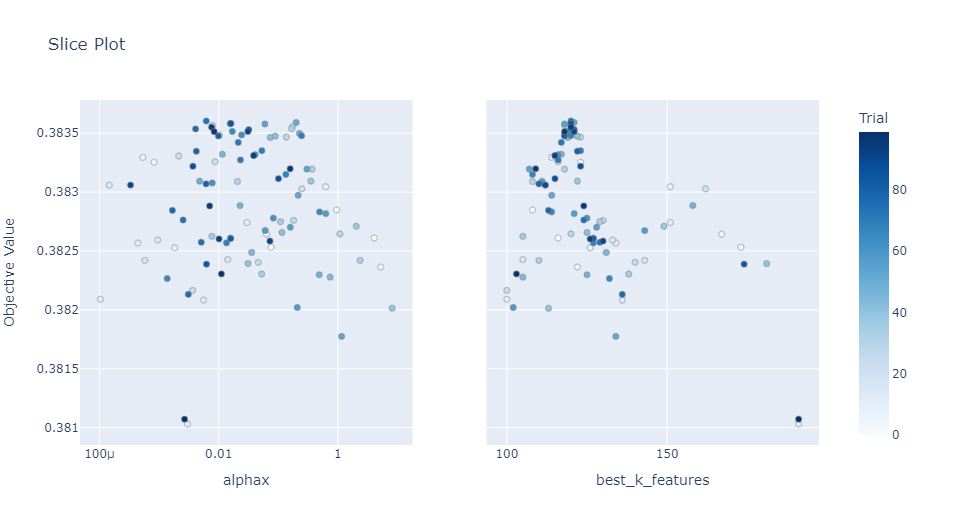

For cat model, first study is created to search among hyperparameters: max_depth, best_k features. Since it is very time consuming, I tried hard to keep it short. To save time, search of other parameters, max_depth, l2_reg, best_k_features are constructed with predetermined learning rate and regularization parameter. We observe that max_depth affects our score highest, ie it has stronger correlation. Below figure demonstrates the parameters relation to performance. We see that best features between 100-120 provides highest score. Choosing more elements after 120, score does not improve. The right hand side plot demonstrates that max_depth strongly correlates with score. As max_depth increases from 7 up to 13, it means that model complexity increases, the score is observed to decrease. This may due to generalization problem of the model, ie model fits train data harder but generalizes weaker due to fitting noise in the data.

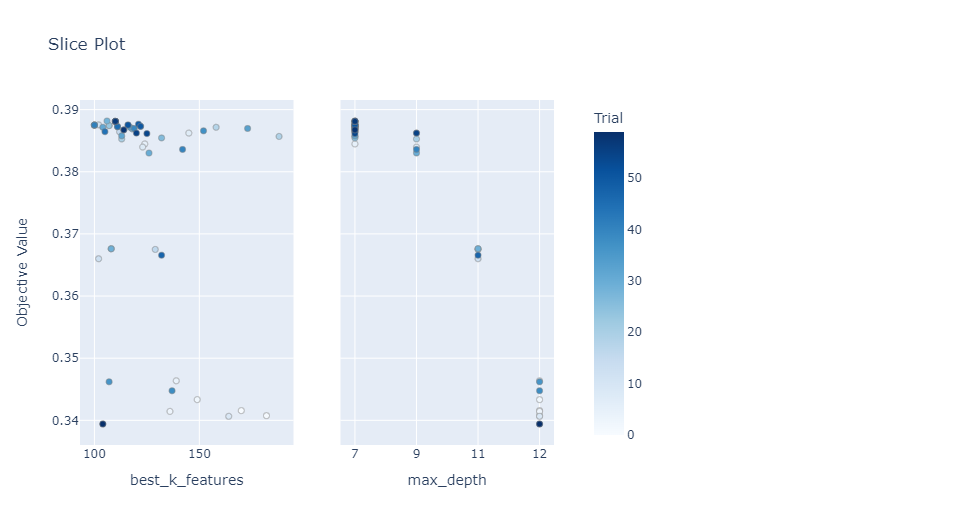

After the results of the first experiment, a second experiment is designed for fine tuning by further searching a reduced area. This experiments search max_depth from 6,7,8 and k between 80-120, reduced intervals selected by the result of 1st experiment. This experiment reveals our optimum points are max_width=7 and k=86. Below figure demonstrates this result. We clearly observe that max_width 7 > max_width 8 and optimal is around k=85
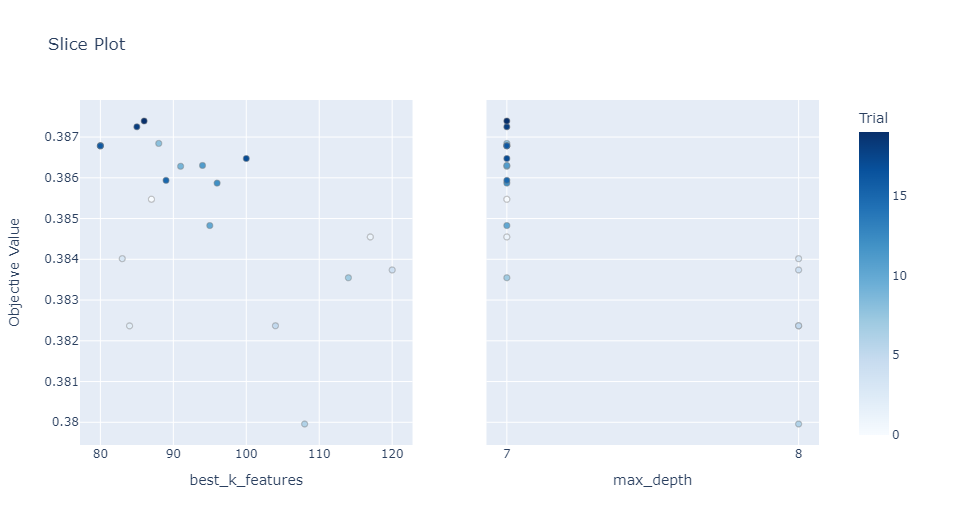 

A final, third experiment is applied for further tuning. For this experiment, we set max_depth = 7, k=86(best_k_features parameter) and the search is done among learning rate and l2_reg. In these experiments, it is also observed that optimization is strongly correlated with learning rate parameter. As we decrease learning rate, optimization converges slowly and we yield lower score. As we increase learning rate too much, then optimization convergence tends to decrease after first iterations, because it means we are going too much step size compared to convexity of the function, ie compared to Lipschitz constant L. We need to be careful about choosing learning rate properly. Below figure demonstrates the virtue of learning rate. We observe that score and optimized function is a concave function of learning rate. We observe that highest score occurs around learning_rate = 3e-2.
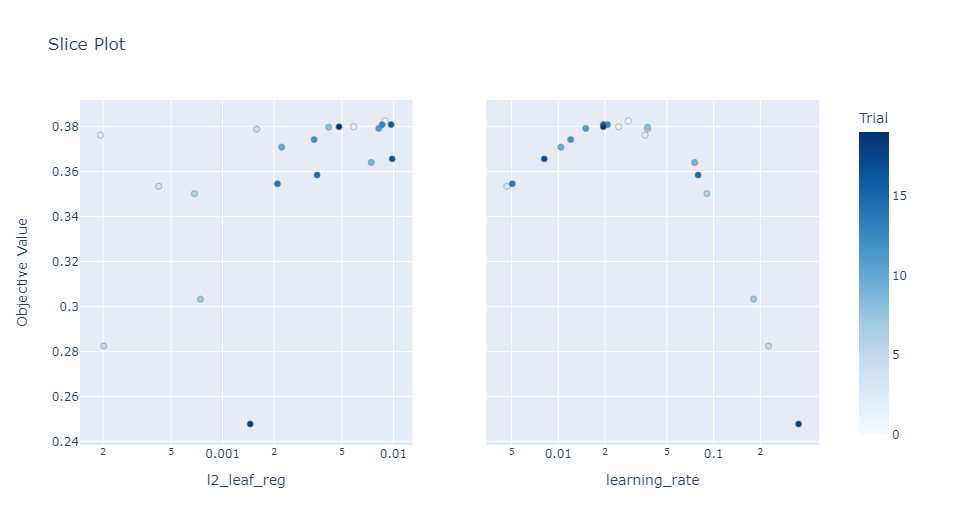

Optuna sometimes chooses same parameter set so we need to do enough number of trials in order to ensure scanning parameter space throughly. Proper hyperparameter optimization requires adequate number of trials and time. For best practice, we actually do a study including all parameters. But it is very time consuming now for the purpose.

In [418]:
### Load Best Pickle Params from File Just Run This Section 

In [173]:
import pickle

In [174]:
#Load Best CAT Parameters
best_cat_params = pickle.load(open('best_cat_params', 'rb'))
best_cat_learning_rate = best_cat_params['best_cat_learning_rate'] #3e-2
best_l2_leaf_reg = best_cat_params['best_l2_leaf_reg'] #1e-2
best_cat_best_k_features = best_cat_params['best_cat_best_k_features']#86
best_max_depth = best_cat_params['best_max_depth']#7

In [175]:
#Load Best Ridge Parameters
best_ridge_params = pickle.load(open('best_ridge_params', 'rb'))

In [176]:
best_alpha = best_ridge_params['best_alpha']
best_best_k_features_ridge = best_ridge_params['best_best_k_features_ridge']

### Train Best Cat Model

In [177]:
#Train Models with Best Parameters
# CREATE CAT CLASSIFIER
#
#Best Cat Parameters
#best_cat_learning_rate = 3e-2
#best_l2_leaf_reg = 1e-2
#best_cat_best_k_features = 86
#best_max_depth = 7

max_iter  = 300
verbose   = 30

##Create Best Cat Model
best_cat_features = importance_lofo_cat_df["feature"][:best_cat_best_k_features].tolist()
df_X_scaled_best_cat = copy.deepcopy(df_X_scaled[best_cat_features])
X_scaled_best_cat = df_X_scaled_best_cat.to_numpy()
best_cat_model = CatBoostClassifier(iterations=max_iter, l2_leaf_reg = best_l2_leaf_reg,learning_rate=best_cat_learning_rate, depth=best_max_depth, loss_function=loss_function, verbose=verbose)

#Initialize Variables
train_accuracy_best_cat  = []
test_accuracy_best_cat   = []
train_detection_best_cat = []
test_detection_best_cat  = []
train_precision_best_cat = []
test_precision_best_cat  = []
train_true_negative_best_cat = []
test_true_negative_best_cat  = []
train_F1_best_cat = []
test_F1_best_cat  = []
train_false_positive_best_cat = []
test_false_positive_best_cat  = []

temp_index = 1
for train_index, test_index in skf5.split(X_scaled_best_cat, y):
    print("Fold:", temp_index)
    x_train_fold, x_test_fold = X_scaled_best_cat[train_index], X_scaled_best_cat[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    #Train Model
    best_cat_model.fit(x_train_fold, y_train_fold,sample_weight=calculate_sample_weights(y_train_fold,sample_coef))
    
    #Predictions
    y_train_predict = best_cat_model.predict(x_train_fold)
    train_accuracy,train_detection,train_true_negative,train_false_positive,train_precision,train_F1 = accuracy_score_without_plot(y_train_fold,y_train_predict)
    
    y_test_predict  = best_cat_model.predict(x_test_fold)
    test_accuracy,test_detection,test_true_negative,test_false_positive,test_precision,test_F1 = accuracy_score_without_plot(y_test_fold,y_test_predict)

    train_accuracy_best_cat.append(train_accuracy)
    test_accuracy_best_cat.append(test_accuracy)
    train_detection_best_cat.append(train_detection)
    test_detection_best_cat.append(test_detection)
    train_precision_best_cat.append(train_precision)
    test_precision_best_cat.append(test_precision)
    train_true_negative_best_cat.append(train_true_negative)
    test_true_negative_best_cat.append(test_true_negative)
    train_F1_best_cat.append(train_F1)
    test_F1_best_cat.append(test_F1)
    train_false_positive_best_cat.append(train_false_positive)
    test_false_positive_best_cat.append(test_false_positive)
    
    temp_index = temp_index + 1
    
mean_test_accuracy_best_cat = np.mean(test_accuracy_best_cat)
mean_test_detection_best_cat = np.mean(test_detection_best_cat)
mean_test_precision_best_cat = np.mean(test_precision_best_cat)
mean_test_true_negative_best_cat = np.mean(test_true_negative_best_cat)
mean_test_F1_best_cat = np.mean(test_F1_best_cat)
mean_test_false_positive_best_cat = np.mean(test_F1_best_cat)

best_cat_metrics = [mean_test_accuracy_best_cat,mean_test_detection_best_cat,mean_test_true_negative_best_cat,mean_test_false_positive_best_cat,mean_test_precision_best_cat,mean_test_F1_best_cat]

Fold: 1
0:	learn: 0.6885708	total: 61.5ms	remaining: 18.4s
30:	learn: 0.6217512	total: 2.22s	remaining: 19.3s
60:	learn: 0.6009798	total: 4.07s	remaining: 15.9s
90:	learn: 0.5901983	total: 5.9s	remaining: 13.6s
120:	learn: 0.5830437	total: 7.7s	remaining: 11.4s
150:	learn: 0.5776517	total: 9.54s	remaining: 9.41s
180:	learn: 0.5729864	total: 11.3s	remaining: 7.45s
210:	learn: 0.5689879	total: 13.2s	remaining: 5.55s
240:	learn: 0.5653993	total: 14.9s	remaining: 3.65s
270:	learn: 0.5620157	total: 16.6s	remaining: 1.78s
299:	learn: 0.5589322	total: 19.4s	remaining: 0us
Fold: 2
0:	learn: 0.6889693	total: 60.7ms	remaining: 18.2s
30:	learn: 0.6239246	total: 1.94s	remaining: 16.9s
60:	learn: 0.6033337	total: 3.74s	remaining: 14.6s
90:	learn: 0.5926282	total: 6.7s	remaining: 15.4s
120:	learn: 0.5851574	total: 10s	remaining: 14.8s
150:	learn: 0.5794866	total: 13.1s	remaining: 13s
180:	learn: 0.5751313	total: 16.1s	remaining: 10.6s
210:	learn: 0.5711476	total: 19.1s	remaining: 8.07s
240:	learn: 0

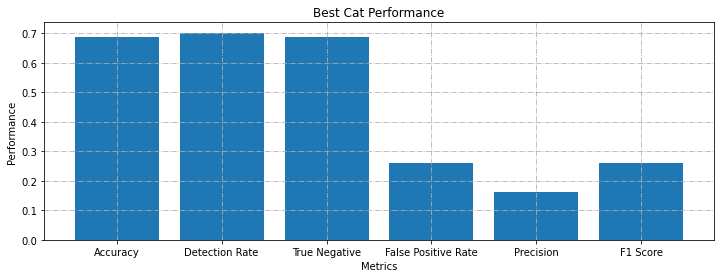

In [178]:
plot(best_cat_metrics,"Best Cat Performance")

### Train Best Ridge Model

In [179]:
#TRAIN RIDGE MODEL WITH BEST PARAMETERS
#
#Create Ridge Model
#Best Ridge Parameters, load again in case just to run this cell
#best_alpha = study2_ridge.best_params['alphax']
#best_best_k_features_ridge = study1_ridge.best_params['best_k_features']

##Create Best Ridge Model
best_ridge_features = importance_df_ridge["feature"][:best_best_k_features_ridge].tolist() 
df_X_scaled_best_ridge = copy.deepcopy(df_X_scaled[best_ridge_features])
X_scaled_best_ridge = df_X_scaled_best_ridge.to_numpy()
best_ridge_model = linear_model.Ridge(alpha = best_alpha)

##Initialize Variables
train_accuracy_best_ridge  = []
test_accuracy_best_ridge   = []
train_detection_best_ridge = []
test_detection_best_ridge  = []
train_precision_best_ridge = []
test_precision_best_ridge  = []
train_true_negative_best_ridge = []
test_true_negative_best_ridge  = []
train_F1_best_ridge = []
test_F1_best_ridge  = []
train_false_positive_best_ridge = []
test_false_positive_best_ridge  = []

temp_index = 1
for train_index, test_index in skf5.split(X_scaled_best_ridge, y):
    print("Fold:", temp_index)
    x_train_fold, x_test_fold = X_scaled_best_ridge[train_index], X_scaled_best_ridge[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    y_train_fold_coded, y_test_fold_coded = y_minus[train_index], y_minus[test_index]

    #Train Model
    best_ridge_model.fit(x_train_fold, y_train_fold_coded,sample_weight=calculate_sample_weights(y_train_fold,sample_coef))
    
    #Predictions
    y_train_predict_ridge = best_ridge_model.predict(x_train_fold)>0
    train_accuracy,train_detection,train_true_negative,train_false_positive,train_precision,train_F1 = accuracy_score_without_plot(y_train_fold,y_train_predict_ridge)
    
    y_test_predict_ridge  = best_ridge_model.predict(x_test_fold)>0
    test_accuracy,test_detection,test_true_negative,test_false_positive,test_precision,test_F1 = accuracy_score_without_plot(y_test_fold,y_test_predict_ridge)

    train_accuracy_best_ridge.append(train_accuracy)
    test_accuracy_best_ridge.append(test_accuracy)
    train_detection_best_ridge.append(train_detection)
    test_detection_best_ridge.append(test_detection)
    train_precision_best_ridge.append(train_precision)
    test_precision_best_ridge.append(test_precision)
    train_true_negative_best_ridge.append(train_true_negative)
    test_true_negative_best_ridge.append(test_true_negative)
    train_F1_best_ridge.append(train_F1)
    test_F1_best_ridge.append(test_F1)
    train_false_positive_best_ridge.append(train_false_positive)
    test_false_positive_best_ridge.append(test_false_positive)
    
    temp_index = temp_index + 1
    
mean_test_accuracy_best_ridge = np.mean(test_accuracy_best_ridge)
mean_test_detection_best_ridge = np.mean(test_detection_best_ridge)
mean_test_precision_best_ridge = np.mean(test_precision_best_ridge)
mean_test_true_negative_best_ridge = np.mean(test_true_negative_best_ridge)
mean_test_F1_best_ridge = np.mean(test_F1_best_ridge)
mean_test_false_positive_best_ridge = np.mean(test_F1_best_ridge)

best_ridge_metrics = [mean_test_accuracy_best_ridge,mean_test_detection_best_ridge,mean_test_true_negative_best_ridge,mean_test_false_positive_best_ridge,mean_test_precision_best_ridge,mean_test_F1_best_ridge]

Fold: 1
Fold: 2
Fold: 3
Fold: 4
Fold: 5


In [180]:
print((y_test_fold==1).sum())
print((y_test_fold==0).sum())

4491
52491


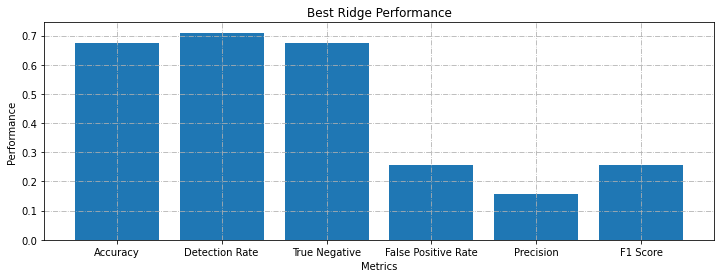

In [181]:
plot(best_ridge_metrics,"Best Ridge Performance")

In [182]:
def plot_together(metric1,metric2,label):
    ### COMPARISON OF Performance Metrics of Model, Train/Test Results
    fig = plt.figure(figsize = (12, 4))

    metric_names = ['Accuracy','Detection Rate','True Negative','False Positive Rate','Precision','F1 Score'] 

    X_axis = np.arange(len(metric_names)) 

    plt.bar(X_axis - 0.2, metric1, 0.4, label = 'Cat Boost') 
    plt.bar(X_axis + 0.2, metric2, 0.4, label = 'Ridge') 
    plt.grid(linestyle = "-.")
    plt.xticks(X_axis, metric_names) 
    plt.xlabel("Metric Names") 
    plt.ylabel("Performance") 
    plt.title(label) 
    plt.legend() 
    plt.show() 

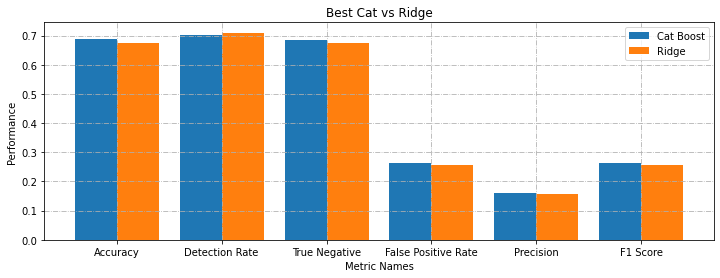

In [183]:
plot_together(best_cat_metrics,best_ridge_metrics,'Best Cat vs Ridge')

### Our common problem is low precision. We have a weak trade-off between detection rate and precision. But at this point I could not have increased precision significantly. For performance evaluation we use a metric to force high detection rate(recall) and low false positive rate. Instead of this metric, we could have used F1 score. To increase precision, we can use additional datasets and extra features. Due to time constratint, I could have only used and preprocessed some datasets, not processed and calculated aggregated features in bureau_balance, pos_cash and installments datasets. These datasets could have add valueable features by aggregation. These valueable features may increase precision and performance overall.

In [184]:
import pickle

In [185]:
pickle.dump(best_cat_model, open('best_cat_model', 'wb'))
pickle.dump(best_ridge_model, open('best_ridge_model', 'wb'))

# 7. Explanation of Model Variables Using Shap Values

In [186]:
import shap

shap.initjs()

In [187]:
import pickle
best_cat_model = pickle.load(open('best_cat_model', 'rb'))
best_ridge_model = pickle.load(open('best_ridge_model', 'rb'))

## 7.1 Best Cat Model Shap Values

In [188]:
#First Fit All Data
best_cat_model.fit(X_scaled_best_cat, y,sample_weight=calculate_sample_weights(y,sample_coef))

0:	learn: 0.6889342	total: 92.7ms	remaining: 27.7s
30:	learn: 0.6234275	total: 2.39s	remaining: 20.8s
60:	learn: 0.6031473	total: 4.64s	remaining: 18.2s
90:	learn: 0.5925338	total: 6.78s	remaining: 15.6s
120:	learn: 0.5856971	total: 8.94s	remaining: 13.2s
150:	learn: 0.5808488	total: 11s	remaining: 10.9s
180:	learn: 0.5765519	total: 13.1s	remaining: 8.63s
210:	learn: 0.5729542	total: 17.8s	remaining: 7.51s
240:	learn: 0.5698202	total: 21.8s	remaining: 5.34s
270:	learn: 0.5670011	total: 25.9s	remaining: 2.77s
299:	learn: 0.5643041	total: 29.4s	remaining: 0us


In [189]:
explainer = shap.TreeExplainer(best_cat_model)
shap_values_cat = explainer(df_X_scaled_best_cat)

# visualize the first prediction's explanation
shap.plots.force(shap_values_cat[0, ...])

In [190]:
best_cat_model.predict(X_scaled_best_cat)[1]

0

1


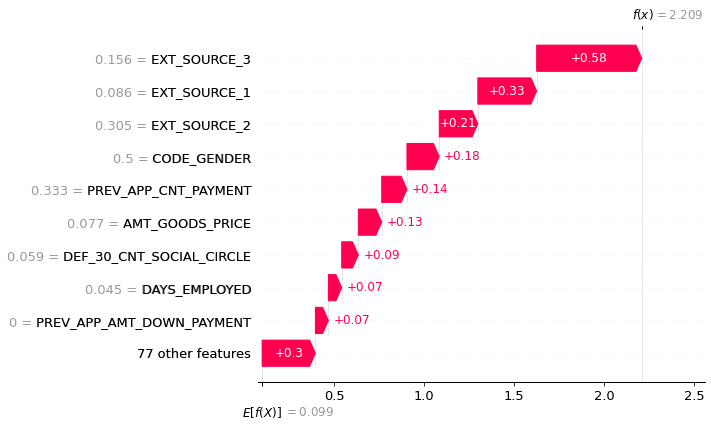

In [192]:
# summarize the effects of all the features
print(y[0])
shap.plots.waterfall(shap_values_cat[0])

In this example, first observation of the dataset is from class "1" and correctly classified as "1". We see that our algorithms objective function > 0 and most contributions are sorted in the above plot by shap values. For this observation, highest contribution is coming from the feature 'EXT_SOURCE_3' and 'EXT_SOURCE_2','EXT_SOURCE_1','CODE_GENDER','PREV_APP_CNT_PAYMENT', 'AMT_GOODS_PRICE',..respectively. Next we can look at second observation to observe the situation for an example of '0' class.

0


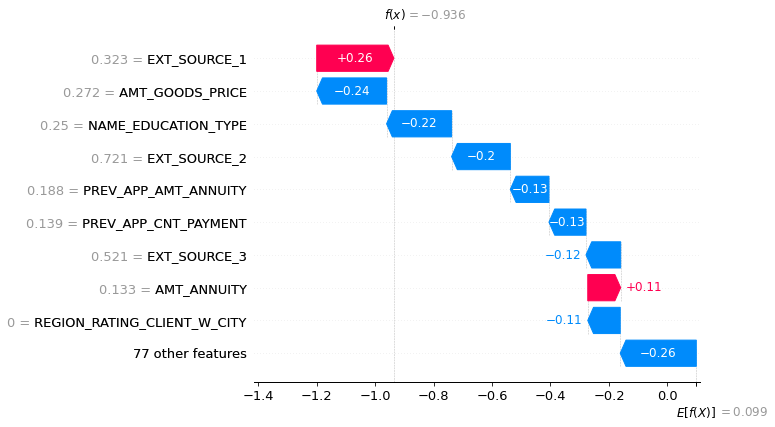

In [193]:
print(y[1])
shap.plots.waterfall(shap_values_cat[1])

For this observation from class '0', 'AMT_GOODS_PRICE', 'NAME_EDUCATION_TYPE', 'EXT_SOURCE_2', .... contributes highest and positive respectively and helps algorithm to predict true. However, 'EXT_SOURCE_1' contributes negatively, in other words prevents algorithm to make true decision together with 'AMT_ANNUITY'. We also observe that 77 other remaining features contributes positively and helps algorithm to decide true. To observe the overall effect of the features, we need to use another plots.

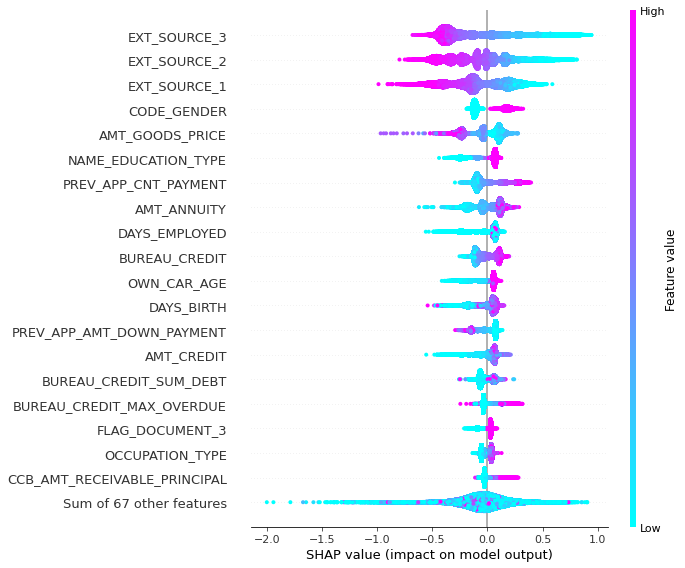

In [194]:
shap.plots.beeswarm(shap_values_cat, color=plt.get_cmap("cool"), max_display=20)

In this figure, we observe that overall feature importances are sorted and it is very similar to LOFO Importances. We see that 'EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1' variables contributes most and as their values increase, model output decreases, ie decides towards class '0'. The meaning of their increase due to no detection means they represent reliability. We also find that 'AMT_GOODS_PRICE' feature has positive impact on 'class 0' decision, adds negative to score function. Among those, we observe that the weight of  'EXT_SOURCE_3' is highest(most left hand side). Furthermore, highest values of 'AMT_ANNUITY' and 'PREV_APP_CNT_PAYMENT' contributes more than others to detection(class 1) decision. It is also interesting that genders differ significantly so that one contributes class 1, other contributes class 0. This behavior can also be seen in 'OCCUPATION_TYPE','BUREAU_CREDIT' etc.

## 7.2 Best Ridge Model Shap Values

In [195]:
best_ridge_model.fit(X_scaled_best_ridge, y, sample_weight=calculate_sample_weights(y,sample_coef))

Ridge(alpha=0.08916630441230305)

In [196]:
explainer = shap.LinearExplainer(best_ridge_model,df_X_scaled_best_ridge)
shap_values_ridge = explainer(df_X_scaled_best_ridge)

# visualize the first prediction's explanation
shap.plots.force(shap_values_ridge[0, ...])

Observing shap values yield similar effects for 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'. They contributes to 'class 0', no detection decision. Different from Cat shap values, we observe that 'FLAG_EMP_PHONE' feature contributes highest and is very valueable, which leads to 'class 0' decision. Besides, 'DAYS_EMPLOYED' feature is also contributes at highest and very valueable, which adds to decide 'class 1'. For true positive rate and precision, we observe that 'DAYS_EMPLOYED' feature can be very valueable. 

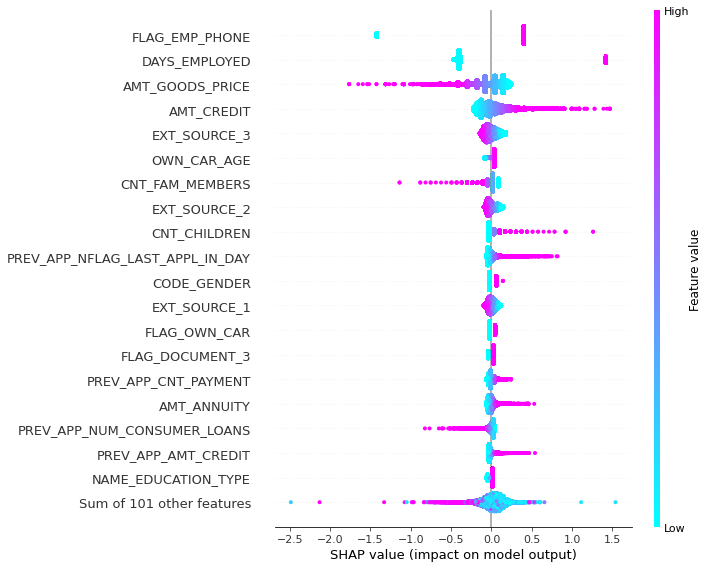

In [197]:
shap.plots.beeswarm(shap_values_ridge, color=plt.get_cmap("cool"), max_display=20)

Additionally, we see that 'AMT_CREDIT', 'CNT_FAMILY_MEMBERS', 'CNT_CHILDREN' features have higher importance as observed in Cat shap values.

## 8. Best CAT Model Test Prediction

In [2]:
import pickle

In [3]:
best_cat_model = pickle.load(open('best_cat_model', 'rb'))
#Load Best CAT Parameters
best_cat_params = pickle.load(open('best_cat_params', 'rb'))
best_cat_learning_rate = best_cat_params['best_cat_learning_rate'] #3e-2
best_l2_leaf_reg = best_cat_params['best_l2_leaf_reg'] #1e-2
best_cat_best_k_features = best_cat_params['best_cat_best_k_features']#86
best_max_depth = best_cat_params['best_max_depth']#7

In [5]:
## Import Test Data
import os
import pandas as pd
main_data_path = r"C:\Users\erkay\B2Metric_Case\home-credit-default-risk"
test_dataset_path = os.path.join(main_data_path,"application_test.csv")
df_test = pd.read_csv(test_dataset_path)

In [23]:
df_test_joined_bureau = df_test.join(df_bureau_unique_aggregated.set_index('SK_ID_CURR'), on='SK_ID_CURR')
df_test_joined_bureau_credit_card = df_test_joined_bureau.join(df_credit_card_unique_aggregated.set_index('SK_ID_CURR'), on='SK_ID_CURR')
df_test_joined_bureau_credit_card_prev_app = df_test_joined_bureau_credit_card.join(df_prev_app_aggregated.set_index('SK_ID_CURR'), on='SK_ID_CURR')

In [24]:
print(df_joined_bureau_credit_card_prev_app.shape)
df_test_joined_bureau_credit_card_prev_app.shape

(307511, 196)


(48744, 195)

In [26]:
df_test_joined_bureau_credit_card_prev_app

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0          100001         Cash loans           F            N               Y   
1          100005         Cash loans           M            N               Y   
2          100013         Cash loans           M            Y               Y   
3          100028         Cash loans           F            N               Y   
4          100038         Cash loans           M            Y               N   
...           ...                ...         ...          ...             ...   
48739      456221         Cash loans           F            N               Y   
48740      456222         Cash loans           F            N               N   
48741      456223         Cash loans           F            Y               Y   
48742      456224         Cash loans           M            N               N   
48743      456250         Cash loans           F            Y               N   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 0          135000.0    568800.0      20560.5   
1                 0           99000.0    222768.0      17370.0   
2                 0          202500.0    663264.0      69777.0   
3                 2          315000.0   1575000.0      49018.5   
4                 1          180000.0    625500.0      32067.0   
...             ...               ...         ...          ...   
48739             0          121500.0    412560.0      17473.5   
48740             2          157500.0    622413.0      31909.5   
48741             1          202500.0    315000.0      33205.5   
48742             0          225000.0    450000.0      25128.0   
48743             0          135000.0    312768.0      24709.5   

       AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0             450000.0   Unaccompanied               Working   
1             180000.0   Unaccompanied               Working   
2             630000.0             NaN               Working   
3            1575000.0   Unaccompanied               Working   
4             625500.0   Unaccompanied               Working   
...                ...             ...                   ...   
48739         270000.0   Unaccompanied               Working   
48740         495000.0   Unaccompanied  Commercial associate   
48741         315000.0   Unaccompanied  Commercial associate   
48742         450000.0          Family  Commercial associate   
48743         270000.0   Unaccompanied               Working   

                 NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0                   Higher education            Married  House / apartment   
1      Secondary / secondary special            Married  House / apartment   
2                   Higher education            Married  House / apartment   
3      Secondary / secondary special            Married  House / apartment   
4      Secondary / secondary special            Married  House / apartment   
...                              ...                ...                ...   
48739  Secondary / secondary special              Widow  House / apartment   
48740  Secondary / secondary special            Married  House / apartment   
48741  Secondary / secondary special            Married  House / apartment   
48742               Higher education            Married  House / apartment   
48743  Secondary / secondary special            Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                        0.018850      -19241          -2329   
1                        0.035792      -18064          -4469   
2                        0.019101      -20038          -4458   
3                        0.026392      -13976          -1866   
4                        0.010032      -13040          -2191   
...                           ...         ...            ...   
48739                    0.002042      -19970          -5169   
48740                  

In [27]:
import copy
df_test_X = copy.deepcopy(df_test_joined_bureau_credit_card_prev_app)

### Preprocess Test

In [28]:
#Change Categorical Values into Integers/Boolean
for column in df_test_X.columns:
    temp = pd.api.types.infer_dtype(df_test_X[column])
    if temp == "string":
        df_test_X[column] = df_test_X[column].astype('category')
        df_test_X[column] = df_test_X[column].cat.codes

In [30]:
df_test_X["OWN_CAR_AGE"] = df_test_X["OWN_CAR_AGE"].fillna(100)

In [31]:
## FILL APARTMENT INFORMATION COLUMNS WITH MEAN OF COLUMNS
apartment_columns = df_test_X.columns[43:85]
for column in apartment_columns: 
    mean_ext = df_test_X.loc[:, column].mean()
    df_test_X[column] = df_test_X[column].fillna(mean_ext)
df_test_X

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0          100001                   0            0             0   
1          100005                   0            1             0   
2          100013                   0            1             1   
3          100028                   0            0             0   
4          100038                   0            1             1   
...           ...                 ...          ...           ...   
48739      456221                   0            0             0   
48740      456222                   0            0             0   
48741      456223                   0            0             1   
48742      456224                   0            1             0   
48743      456250                   0            0             1   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    1             0          135000.0    568800.0   
1                    1             0           99000.0    222768.0   
2                    1             0          202500.0    663264.0   
3                    1             2          315000.0   1575000.0   
4                    0             1          180000.0    625500.0   
...                ...           ...               ...         ...   
48739                1             0          121500.0    412560.0   
48740                0             2          157500.0    622413.0   
48741                1             1          202500.0    315000.0   
48742                0             0          225000.0    450000.0   
48743                0             0          135000.0    312768.0   

       AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
0          20560.5         450000.0                6                 6   
1          17370.0         180000.0                6                 6   
2          69777.0         630000.0               -1                 6   
3          49018.5        1575000.0                6                 6   
4          32067.0         625500.0                6                 6   
...            ...              ...              ...               ...   
48739      17473.5         270000.0                6                 6   
48740      31909.5         495000.0                6                 1   
48741      33205.5         315000.0                6                 1   
48742      25128.0         450000.0                1                 1   
48743      24709.5         270000.0                6                 6   

       NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0                        1                   1                  1   
1                        4                   1                  1   
2                        1                   1                  1   
3                        4                   1                  1   
4                        4                   1                  1   
...                    ...                 ...                ...   
48739                    4                   4                  1   
48740                    4                   1                  1   
48741                    4                   1                  1   
48742                    1                   1                  1   
48743                    4                   1                  1   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                        0.018850      -19241          -2329   
1                        0.035792      -18064          -4469   
2                        0.019101      -20038          -4458   
3                        0.026392      -13976          -1866   
4                        0.010032      -13040          -2191   
...                           ...         ...            ...   
48739                    0.002042      -19970          -5169   
48740                    0.035792      -11186          -1149   
48741                    0.026392      -15922          

In [32]:
ext_columns = ["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]
tempx = df_test_X.loc[:, ext_columns].mean(axis=1)
df_test_ext = copy.deepcopy(df_test_X[ext_columns])
for i in range(df_test_ext.shape[0]):
    if i%10000==0:
        print(i)
    if math.isnan(tempx[i]):
        df_test_ext.loc[i] = 0.5# mean of external sources
    else:
        df_test_ext.loc[i] = df_test_ext.loc[i].fillna(tempx[i])

0
10000
20000
30000
40000


In [34]:
df_test_X[ext_columns] = df_test_ext
df_test_X

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0          100001                   0            0             0   
1          100005                   0            1             0   
2          100013                   0            1             1   
3          100028                   0            0             0   
4          100038                   0            1             1   
...           ...                 ...          ...           ...   
48739      456221                   0            0             0   
48740      456222                   0            0             0   
48741      456223                   0            0             1   
48742      456224                   0            1             0   
48743      456250                   0            0             1   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    1             0          135000.0    568800.0   
1                    1             0           99000.0    222768.0   
2                    1             0          202500.0    663264.0   
3                    1             2          315000.0   1575000.0   
4                    0             1          180000.0    625500.0   
...                ...           ...               ...         ...   
48739                1             0          121500.0    412560.0   
48740                0             2          157500.0    622413.0   
48741                1             1          202500.0    315000.0   
48742                0             0          225000.0    450000.0   
48743                0             0          135000.0    312768.0   

       AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
0          20560.5         450000.0                6                 6   
1          17370.0         180000.0                6                 6   
2          69777.0         630000.0               -1                 6   
3          49018.5        1575000.0                6                 6   
4          32067.0         625500.0                6                 6   
...            ...              ...              ...               ...   
48739      17473.5         270000.0                6                 6   
48740      31909.5         495000.0                6                 1   
48741      33205.5         315000.0                6                 1   
48742      25128.0         450000.0                1                 1   
48743      24709.5         270000.0                6                 6   

       NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0                        1                   1                  1   
1                        4                   1                  1   
2                        1                   1                  1   
3                        4                   1                  1   
4                        4                   1                  1   
...                    ...                 ...                ...   
48739                    4                   4                  1   
48740                    4                   1                  1   
48741                    4                   1                  1   
48742                    1                   1                  1   
48743                    4                   1                  1   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                        0.018850      -19241          -2329   
1                        0.035792      -18064          -4469   
2                        0.019101      -20038          -4458   
3                        0.026392      -13976          -1866   
4                        0.010032      -13040          -2191   
...                           ...         ...            ...   
48739                    0.002042      -19970          -5169   
48740                    0.035792      -11186          -1149   
48741                    0.026392      -15922          

In [47]:
## Set Flaf Columns Nans To O
df_test_X[df_test_X.columns[95:121]] = df_test_X[df_test_X.columns[95:121]].fillna(0)

In [48]:
# "MAKE AMT ANNUITY", "AMT GOODS PRICE" COLUMNS AS MEAN OF COLUMNS
for column in ["AMT_ANNUITY","AMT_GOODS_PRICE"]:
    mean_ext = df_test_X.loc[:, column].mean()
    df_test_X[column] = df_test_X[column].fillna(mean_ext)

In [49]:
#MAKE "COUNT FAM MEMBERS" 1
df_test_X["CNT_FAM_MEMBERS"] = df_test_X["CNT_FAM_MEMBERS"].fillna(1)

In [50]:
df_test_X["TOTALAREA_MODE"] = df_test_X["TOTALAREA_MODE"].fillna(df_test_X["TOTALAREA_MODE"].mean())
df_test_X["OBS_30_CNT_SOCIAL_CIRCLE"] = df_test_X["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(df_test_X["OBS_30_CNT_SOCIAL_CIRCLE"].mean())
df_test_X["DEF_30_CNT_SOCIAL_CIRCLE"] = df_test_X["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(df_test_X["DEF_30_CNT_SOCIAL_CIRCLE"].mean())
df_test_X["OBS_60_CNT_SOCIAL_CIRCLE"] = df_test_X["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(df_test_X["OBS_60_CNT_SOCIAL_CIRCLE"].mean())
df_test_X["DEF_60_CNT_SOCIAL_CIRCLE"] = df_test_X["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(df_test_X["DEF_60_CNT_SOCIAL_CIRCLE"].mean())
df_test_X["DAYS_LAST_PHONE_CHANGE"] = df_test_X["DAYS_LAST_PHONE_CHANGE"].fillna(df_test_X["DAYS_LAST_PHONE_CHANGE"].mean())

In [51]:
## MAKE BUREAU COLUMNS
bureau_zero_columns = range(121,137)
df_test_X[df_test_X.columns[bureau_zero_columns]] = df_test_X[df_test_X.columns[bureau_zero_columns]].fillna(0)

In [53]:
df_test_X.columns[bureau_zero_columns]

Index(['BUREAU_CREDIT_ACTIVE', 'BUREAU_CREDIT_CLOSED', 'BUREAU_IT_CURRENCY',
       'BUREAU_IT_TYPE', 'BUREAU_CREDIT', 'BUREAU_IT_DAY_OVERDUE',
       'BUREAU_CREDIT_ENDDATE', 'BUREAU_ENDDATE_FACT',
       'BUREAU_CREDIT_MAX_OVERDUE', 'BUREAU_CREDIT_PROLONG',
       'BUREAU_CREDIT_SUM', 'BUREAU_CREDIT_SUM_DEBT',
       'BUREAU_CREDIT_SUM_LIMIT', 'BUREAU_CREDIT_SUM_OVERDUE',
       'BUREAU_CREDIT_UPDATE', 'BUREAU_ANNUITY'],
      dtype='object')

In [54]:
# MAKE CREDIT CARD COLUMNS O
ccb_zero_columns = range(137,158)
df_test_X[df_test_X.columns[ccb_zero_columns]] = df_test_X[df_test_X.columns[ccb_zero_columns]].fillna(0)

In [55]:
# DROP COLUMNS THAT HAVE TOO MANY NANS
df_test_X = df_test_X.drop(columns=['PREV_APP_RATE_INTEREST_PRIMARY', 'PREV_APP_RATE_INTEREST_PRIVILEGED'])

In [56]:
prev_app_zero_columns = list(range(158,166))+list(range(167,171))+list(range(185,193))
df_test_X[df_test_X.columns[prev_app_zero_columns]] = df_test_X[df_test_X.columns[prev_app_zero_columns]].fillna(0)

In [58]:
df_test_X["PREV_APP_NAME_CONTRACT_STATUS"] = df_test_X["PREV_APP_NAME_CONTRACT_STATUS"].fillna(df_test_X["PREV_APP_NAME_CONTRACT_STATUS"].mean())
df_test_X["PREV_APP_DAYS_DECISION"] = df_test_X["PREV_APP_DAYS_DECISION"].fillna(df_test_X["PREV_APP_DAYS_DECISION"].mean())

In [59]:
df_test_X["PREV_APP_SELLERPLACE_AREA"] = df_test_X["PREV_APP_SELLERPLACE_AREA"].fillna(-1)

In [60]:
df_test_X["PREV_APP_CNT_PAYMENT"] = df_test_X["PREV_APP_CNT_PAYMENT"].fillna(df_test_X["PREV_APP_CNT_PAYMENT"].mean())

### Normalization

In [67]:
# Import Required Modules.
from sklearn import preprocessing

In [68]:
# Feature Scaling for input features.
scaler   = preprocessing.MinMaxScaler()
test_X_scaled = scaler.fit_transform(df_test_X.to_numpy())
df_test_X_scaled = pd.DataFrame(test_X_scaled, columns=df_test_X.columns)

In [70]:
df_test_X_scaled = df_test_X_scaled.drop(columns = "SK_ID_CURR")
df_test_X_scaled

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                     0.0          0.0           0.0              1.0   
1                     0.0          1.0           0.0              1.0   
2                     0.0          1.0           1.0              1.0   
3                     0.0          0.0           0.0              1.0   
4                     0.0          1.0           1.0              0.0   
...                   ...          ...           ...              ...   
48739                 0.0          0.0           0.0              1.0   
48740                 0.0          0.0           0.0              0.0   
48741                 0.0          0.0           1.0              1.0   
48742                 0.0          1.0           0.0              0.0   
48743                 0.0          0.0           1.0              0.0   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0              0.00          0.024654    0.238037     0.102453   
1              0.00          0.016440    0.080785     0.084558   
2              0.00          0.040054    0.280965     0.378515   
3              0.10          0.065721    0.695297     0.262078   
4              0.05          0.034920    0.263804     0.166995   
...             ...               ...         ...          ...   
48739          0.00          0.021574    0.167035     0.085138   
48740          0.10          0.029787    0.262401     0.166111   
48741          0.05          0.040054    0.122699     0.173381   
48742          0.00          0.045187    0.184049     0.128073   
48743          0.00          0.024654    0.121685     0.125726   

       AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  \
0             0.184049         1.000000          1.000000   
1             0.061350         1.000000          1.000000   
2             0.265849         0.000000          1.000000   
3             0.695297         1.000000          1.000000   
4             0.263804         1.000000          1.000000   
...                ...              ...               ...   
48739         0.102249         1.000000          1.000000   
48740         0.204499         1.000000          0.166667   
48741         0.122699         1.000000          0.166667   
48742         0.184049         0.285714          0.166667   
48743         0.102249         1.000000          1.000000   

       NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0                     0.25                0.25                0.2   
1                     1.00                0.25                0.2   
2                     0.25                0.25                0.2   
3                     1.00                0.25                0.2   
4                     1.00                0.25                0.2   
...                    ...                 ...                ...   
48739                 1.00                1.00                0.2   
48740                 1.00                0.25                0.2   
48741                 1.00                0.25                0.2   
48742                 0.25                0.25                0.2   
48743                 1.00                0.25                0.2   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                        0.257380    0.333427       0.039545   
1                        0.491855    0.399339       0.033953   
2                        0.260854    0.288794       0.033982   
3                        0.361760    0.628269       0.040755   
4                        0.135340    0.680685       0.039905   
...                           ...         ...            ...   
48739                    0.024760    0.292602       0.032124   
48740                    0.491855    0.784510       0.042628   
48741                    0.361760    0.519292       0.037695   
48742                    0.257380    0.628717       0.038494   
48743                    0.088243    0.629053       0.043976   

      

### Load Best Cat Model Parameters

In [71]:
import pickle

In [72]:
best_cat_model = pickle.load(open('best_cat_model', 'rb'))
importance_lofo_cat_df = pd.read_csv("feature_importance_lofo_cat.csv")#read lofo of cat

In [73]:
#Load Best CAT Parameters
best_cat_params = pickle.load(open('best_cat_params', 'rb'))
best_cat_learning_rate = best_cat_params['best_cat_learning_rate'] #3e-2
best_l2_leaf_reg = best_cat_params['best_l2_leaf_reg'] #1e-2
best_cat_best_k_features = best_cat_params['best_cat_best_k_features']#86
best_max_depth = best_cat_params['best_max_depth']#7

In [74]:
best_cat_features = importance_lofo_cat_df["feature"][:best_cat_best_k_features].tolist()
best_cat_features

['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'CODE_GENDER',
 'EXT_SOURCE_1',
 'NAME_EDUCATION_TYPE',
 'AMT_GOODS_PRICE',
 'AMT_CREDIT',
 'DAYS_EMPLOYED',
 'NAME_CONTRACT_TYPE',
 'FLAG_EMAIL',
 'PREV_APP_AMT_DOWN_PAYMENT',
 'FLAG_DOCUMENT_3',
 'PREV_APP_CNT_PAYMENT',
 'OWN_CAR_AGE',
 'FLAG_OWN_REALTY',
 'REG_CITY_NOT_LIVE_CITY',
 'FLAG_DOCUMENT_15',
 'FLAG_PHONE',
 'DAYS_BIRTH',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'PREV_APP_NFLAG_INSURED_ON_APPROVAL',
 'BUREAU_ANNUITY',
 'FLOORSMAX_MODE',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_19',
 'FLAG_OWN_CAR',
 'AMT_ANNUITY',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_20',
 'CCB_AMT_DRAWINGS_ATM_CURRENT',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_10',
 'BUREAU_CREDIT_MAX_OVERDUE',
 'COMMONAREA_AVG',
 'PREV_APP_WEEKDAY_APPR_PROCESS_START',
 'FLAG_DOCUMENT_4',
 'CCB_AMT_RECIVABLE',
 'CCB_NAME_CONTRACT_STATUS',
 'BUREAU_CREDIT',
 'DAYS_LAST_PHONE_CHANGE',
 'PREV_APP_NAME_CASH_LOAN_

In [75]:
df_test_X_scaled_best_cat = copy.deepcopy(df_test_X_scaled[best_cat_features])
test_X_scaled_best_cat = df_test_X_scaled_best_cat.to_numpy()

In [88]:
test_predictions = best_cat_model.predict_proba(test_X_scaled_best_cat)

In [101]:
print(best_cat_model.classes_)
print(test_predictions[:,1])

[0 1]
[0.27861702 0.52545057 0.18708442 ... 0.24659822 0.40065934 0.70771293]


In [108]:
df_output = pd.DataFrame(copy.deepcopy(df_test_X["SK_ID_CURR"]))

In [109]:
df_output["TARGET"]=test_predictions[:,1]

In [116]:
df_output

SK_ID_CURR    TARGET
0          100001  0.278617
1          100005  0.525451
2          100013  0.187084
3          100028  0.291034
4          100038  0.688878
...           ...       ...
48739      456221  0.359030
48740      456222  0.375019
48741      456223  0.246598
48742      456224  0.400659
48743      456250  0.707713

[48744 rows x 2 columns]

In [117]:
df_output.to_csv('kaggle_test_predictions.csv', index=False)  